# Analysing the Attrition Rate of a Company

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -
1.	The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2.	A sizeable department has to be maintained, for the purposes of recruiting new talent
3.	More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

# Import libraries and dataset

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Correlation finding
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                            
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

from sklearn.metrics import classification_report
from sklearn import metrics

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

In [60]:
df = pd.read_csv("general_data.csv")

# Exploring Data Analysis

In [61]:
df.head()

EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
0                 6          2  Life Sciences              1  Female   
1                10          1  Life Sciences              1  Female   
2                17          4          Other              1    Male   
3                 2          5  Life Sciences              1    Male   
4                10          1        Medical              1    Male   

   JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0         1  Healthcare Representative       Married         131160   
1         1         Research Scientist        Single          41890   
2         4            Sales Executive       Married         193280   
3         3            Human Resources       Married          83210   
4         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                 1.0      Y                 11              8   
1                 0.0      Y                 23              8   
2                 1.0      Y                 15              8   
3                 3.0      Y                 11              8   
4                 4.0      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3

In [62]:
df.tail()

EmployeeID  Age Attrition BusinessTravel              Department  \
4405        4406   42        No  Travel_Rarely  Research & Development   
4406        4407   29        No  Travel_Rarely  Research & Development   
4407        4408   25        No  Travel_Rarely  Research & Development   
4408        4409   42        No  Travel_Rarely                   Sales   
4409        4410   40        No  Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
4405                 5          4        Medical              1  Female   
4406                 2          4        Medical              1    Male   
4407                25          2  Life Sciences              1    Male   
4408                18          2        Medical              1    Male   
4409                28          3        Medical              1    Male   

      JobLevel                JobRole MaritalStatus  MonthlyIncome  \
4405         1     Research Scientist        Single          60290   
4406         1  Laboratory Technician      Divorced          26790   
4407         2        Sales Executive       Married          37020   
4408         1  Laboratory Technician      Divorced          23980   
4409         2  Laboratory Technician      Divorced          54680   

      NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
4405                 3.0      Y                 17              8   
4406                 2.0      Y                 15              8   
4407                 0.0      Y                 20              8   
4408                 0.0      Y                 14              8   
4409                 0.0      Y                 12              8   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
4405                 1               10.0                      5   
4406                 0               10.0                      2   
4407                 0                5.0                      4   
4408                 1               10.0                      2   
4409                 0                NaN                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
4405               3                        0                     2   
4406               3                        0                     2   
4407               4                        1                     2   
4408               9                        7                     8   
4409              21                        3                     9   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
4405                      4.0              1.0              3.0   
4406                      4.0              4.0              3.0   
4407                      1.0              3.0              3.0   
4408                      4.0              1.0              3.0   
4409                      1.0              3.0              NaN   

      JobInvolvement  PerformanceRating  
4405               3                  3  
4406               2                  3  
4407               3                  4  
4408               2                  3  
4409               4                  3

In [63]:
print("Shape of the dataset:",df.shape,'\n')
print("Total number of rows (excluding column name):",df.shape[0],'\n')
print("Total number of column:",df.shape[1],'\n')
print("Columns name: ", df.columns)

Shape of the dataset: (4410, 29) 

Total number of rows (excluding column name): 4410 

Total number of column: 29 

Columns name:  Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


#### Our dataset has 4410 rows and 29 columns.

## Null values, Dtype handling, and checking zeros

In [64]:
print(df.info(),"\n\n")
print("Checking null values: \n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Some columns has null values. By using ffill method in fillna function, we have to be replace this null vlaues.
#### Columns name which has null values are: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, and WorkLifeBalance.
#### Also 'NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', and 'WorkLifeBalance' columns should have dtypes of int64 but it is float. We have to change it to int64. 

#### Firstly, we should handle null values then only we have to handle dtypes otherwise error will occur if we change dtype first.

## Feature Engineering
### Replacing Null values

In [65]:
df.fillna(method = 'ffill', inplace=True)
print(df.isnull().sum())

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

**All null values replaced using forward fill method of fillna function**

### Handling Dtype

In [67]:
df.NumCompaniesWorked = df.NumCompaniesWorked.astype("int64")
df.TotalWorkingYears = df.TotalWorkingYears.astype("int64")
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.astype("int64")
df.JobSatisfaction = df.JobSatisfaction.astype("int64")
df.WorkLifeBalance = df.WorkLifeBalance.astype("int64")

In [68]:
df.dtypes

EmployeeID                  int64
Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
WorkLifeBalance             int64
JobInvolvement              int64
PerformanceRating           int64
dtype: object

### Checking zeros

- We have to check that some columns like Age have zero values or not. If yes then we have to remove/replace it as age of a employee can not be zero. 

In [69]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

EmployeeID 0
Age 0
Attrition 0
BusinessTravel 0
Department 0
DistanceFromHome 0
Education 0
EducationField 0
EmployeeCount 0
Gender 0
JobLevel 0
JobRole 0
MaritalStatus 0
MonthlyIncome 0
NumCompaniesWorked 588
Over18 0
PercentSalaryHike 0
StandardHours 0
StockOptionLevel 1893
TotalWorkingYears 33
TrainingTimesLastYear 162
YearsAtCompany 132
YearsSinceLastPromotion 1743
YearsWithCurrManager 789
EnvironmentSatisfaction 0
JobSatisfaction 0
WorkLifeBalance 0
JobInvolvement 0
PerformanceRating 0


- There are 588 employees who are working for first time.
- 1893 employees are there with stock option level as zero.
- There are 33 employees who joined the company for first time this year only and there are 132 employees who joined this company, maybe for first time or maybe not, this year only.
- 162 employees has not trained last year.
- 1743 employees got promotion this year.
- 789 employees didn't complete yet 1 year with their current manager.
- **So there is no problem with zeros in this dataset.**

### Data Exploration

In [70]:
print(sorted(df.Age.unique()),"\n")
x = sorted(df.Age.unique())
print("Age group who are working in the company:", x[0], "-", x[-1])

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] 

Age group who are working in the company: 18 - 60


- Employees have age in the range of 18 to 60.
- As (60 - 18) + 1 = 43, which means there are employees with 43 different age, ranging between 18 to 60, working in the company.

### Exploring Categorical features

In [71]:
cat = ['Attrition','BusinessTravel','Department','Education','EducationField','Gender', 'NumCompaniesWorked', 'JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']

In [72]:
col=['Age','Attrition','BusinessTravel','Department','Education','EducationField','Gender', 'StandardHours', 'NumCompaniesWorked', 'JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','Over18','StockOptionLevel','TrainingTimesLastYear','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']
for x in col:
    print('{}: {}'.format(x.upper(),sorted(df[x].unique())), "\n")

AGE: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] 

ATTRITION: ['No', 'Yes'] 

BUSINESSTRAVEL: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'] 

DEPARTMENT: ['Human Resources', 'Research & Development', 'Sales'] 

EDUCATION: [1, 2, 3, 4, 5] 

EDUCATIONFIELD: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'] 

GENDER: ['Female', 'Male'] 

STANDARDHOURS: [8] 

NUMCOMPANIESWORKED: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

JOBLEVEL: [1, 2, 3, 4, 5] 

JOBROLE: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'] 

MARITALSTATUS: ['Divorced', 'Married', 'Single'] 

NUMCOMPANIESWORKED: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

OVER18: ['Y'] 

STOCKOPTIONLEVEL: [0, 1, 2, 3] 

TRAININGTIMESLASTYEAR: [

### Counts of each category

In [73]:
col1 = ['Age','Attrition','BusinessTravel','Department', 'EmployeeCount', 'StandardHours', 'NumCompaniesWorked', 'JobRole','EducationField','Education','Gender','JobLevel','MaritalStatus','Over18']
for x in col1:
    print('{}: \n{}'.format(x.upper(),df[x].value_counts()), "\n\n")

AGE: 
35    234
34    231
31    207
36    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
49     72
47     72
55     66
48     57
51     57
53     57
52     54
54     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: Age, dtype: int64 


ATTRITION: 
No     3699
Yes     711
Name: Attrition, dtype: int64 


BUSINESSTRAVEL: 
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64 


DEPARTMENT: 
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64 


EMPLOYEECOUNT: 
1    4410
Name: EmployeeCount, dtype: int64 


STANDARDHOURS: 
8    4410
Name: StandardHours, dtype: int64 


NUMCOMPANIESWORKED: 
1    1568
0     588
3     475
2     440
4     41

- There are 4410 employees with 18 or above age. It means that all employees are of age 18 or above.
- Among which 2019 are married and 1410 are single while 981 are divorced.
- 2646 employees are Male and 1764 employees are female.
- There are 711 employees who left company. While 3699 employees are still working for comany (didn't left the comapny yet).

## Visualization of  the Data

### Attrition Pie plot

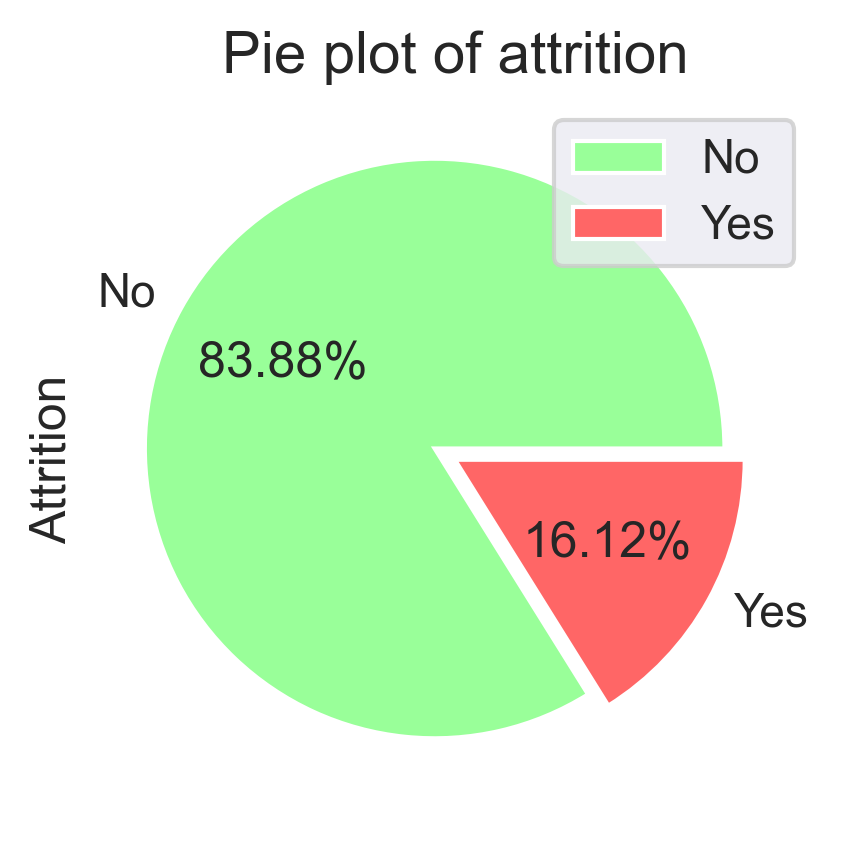

In [74]:
explode=(0.08,0)

df['Attrition'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of attrition", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

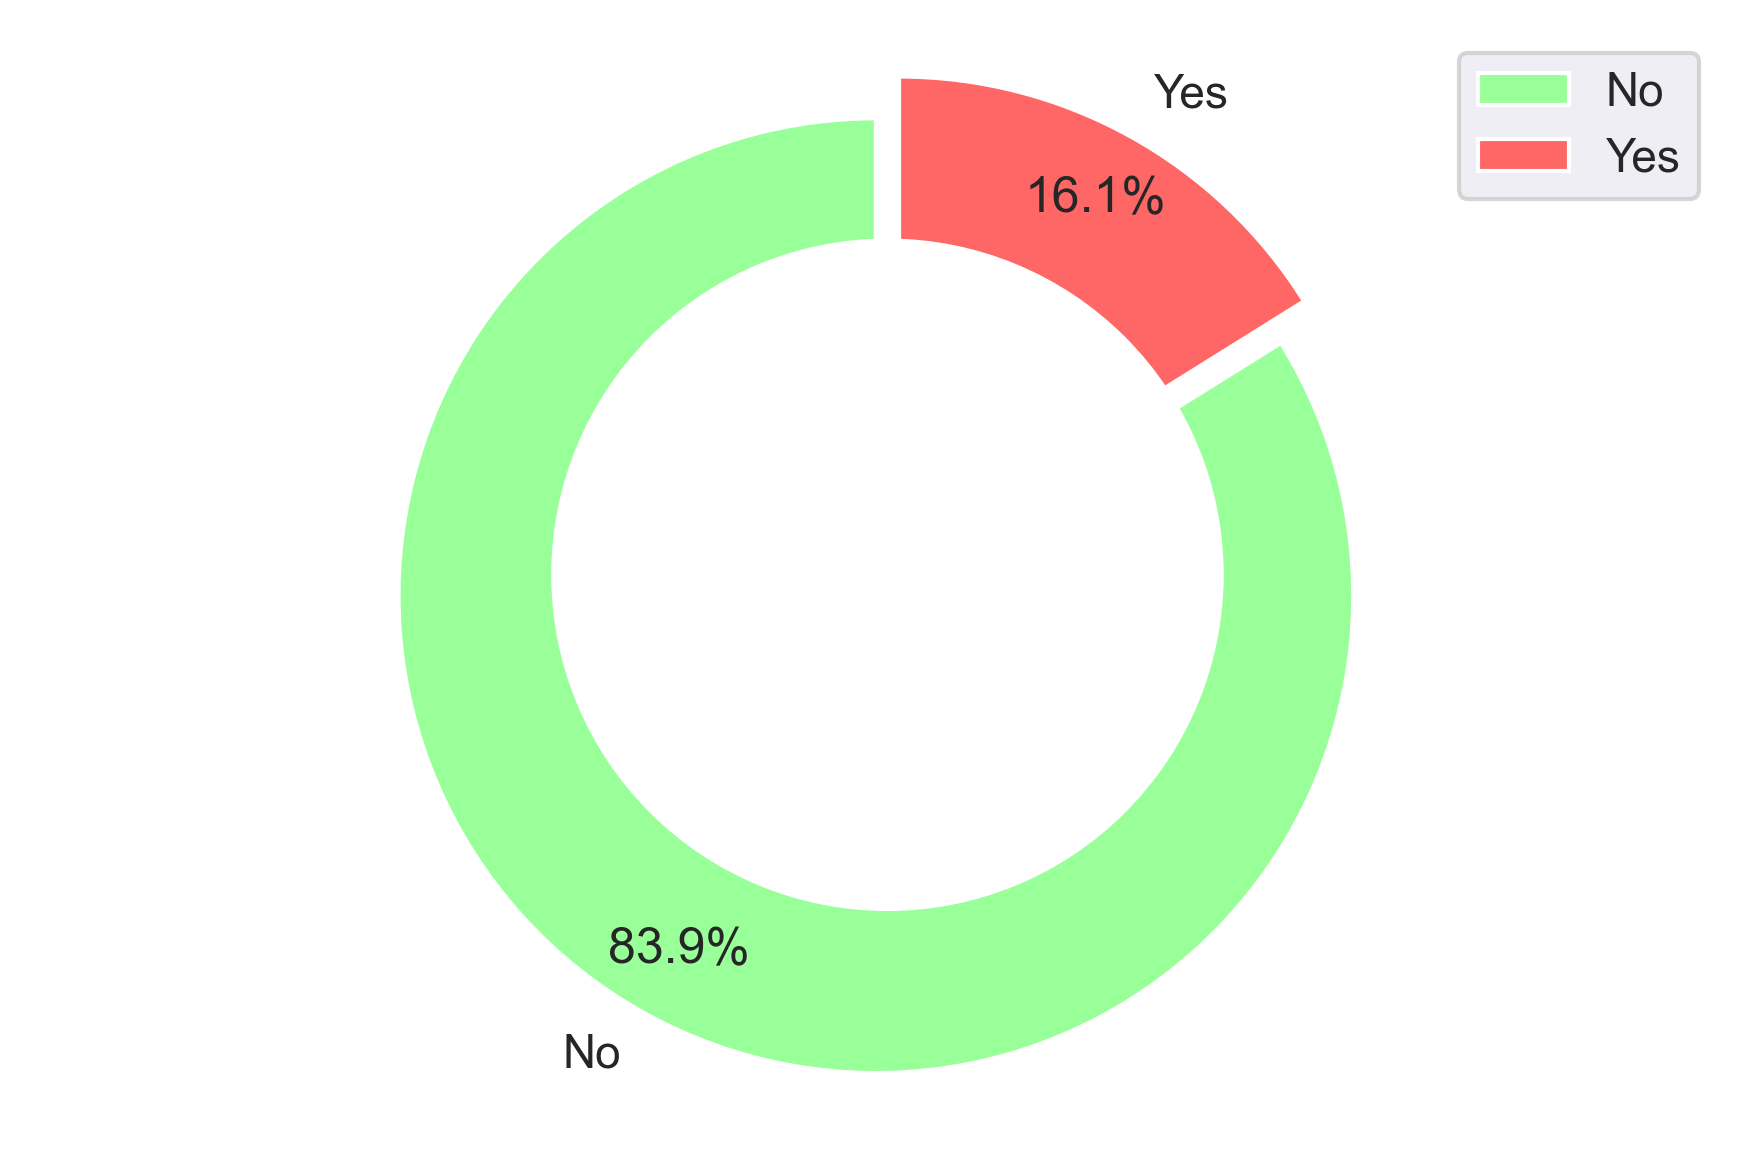

In [75]:
labels = df['Attrition'].unique()
sizes = df['Attrition'].value_counts()
colors=['#99ff99','#ff6666']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode=explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

- 16.1% of total employee has left the company while 83.9% of total employees are still in the company.

- 83.9% data are of attrition No while remaining are of attrition Yes. Hence we can say that the **data is IMBALANCED**

### Ratio of Attrition based on Gender

In [76]:
df1 = df.groupby(['Attrition','Gender']).agg({'Gender':'count'})
df1 = df1.rename({'Gender': 'Gender_count'}, axis=1)
df1.reset_index(inplace=True)

print(df1.head())

  Attrition  Gender  Gender_count
0        No  Female          1494
1        No    Male          2205
2       Yes  Female           270
3       Yes    Male           441


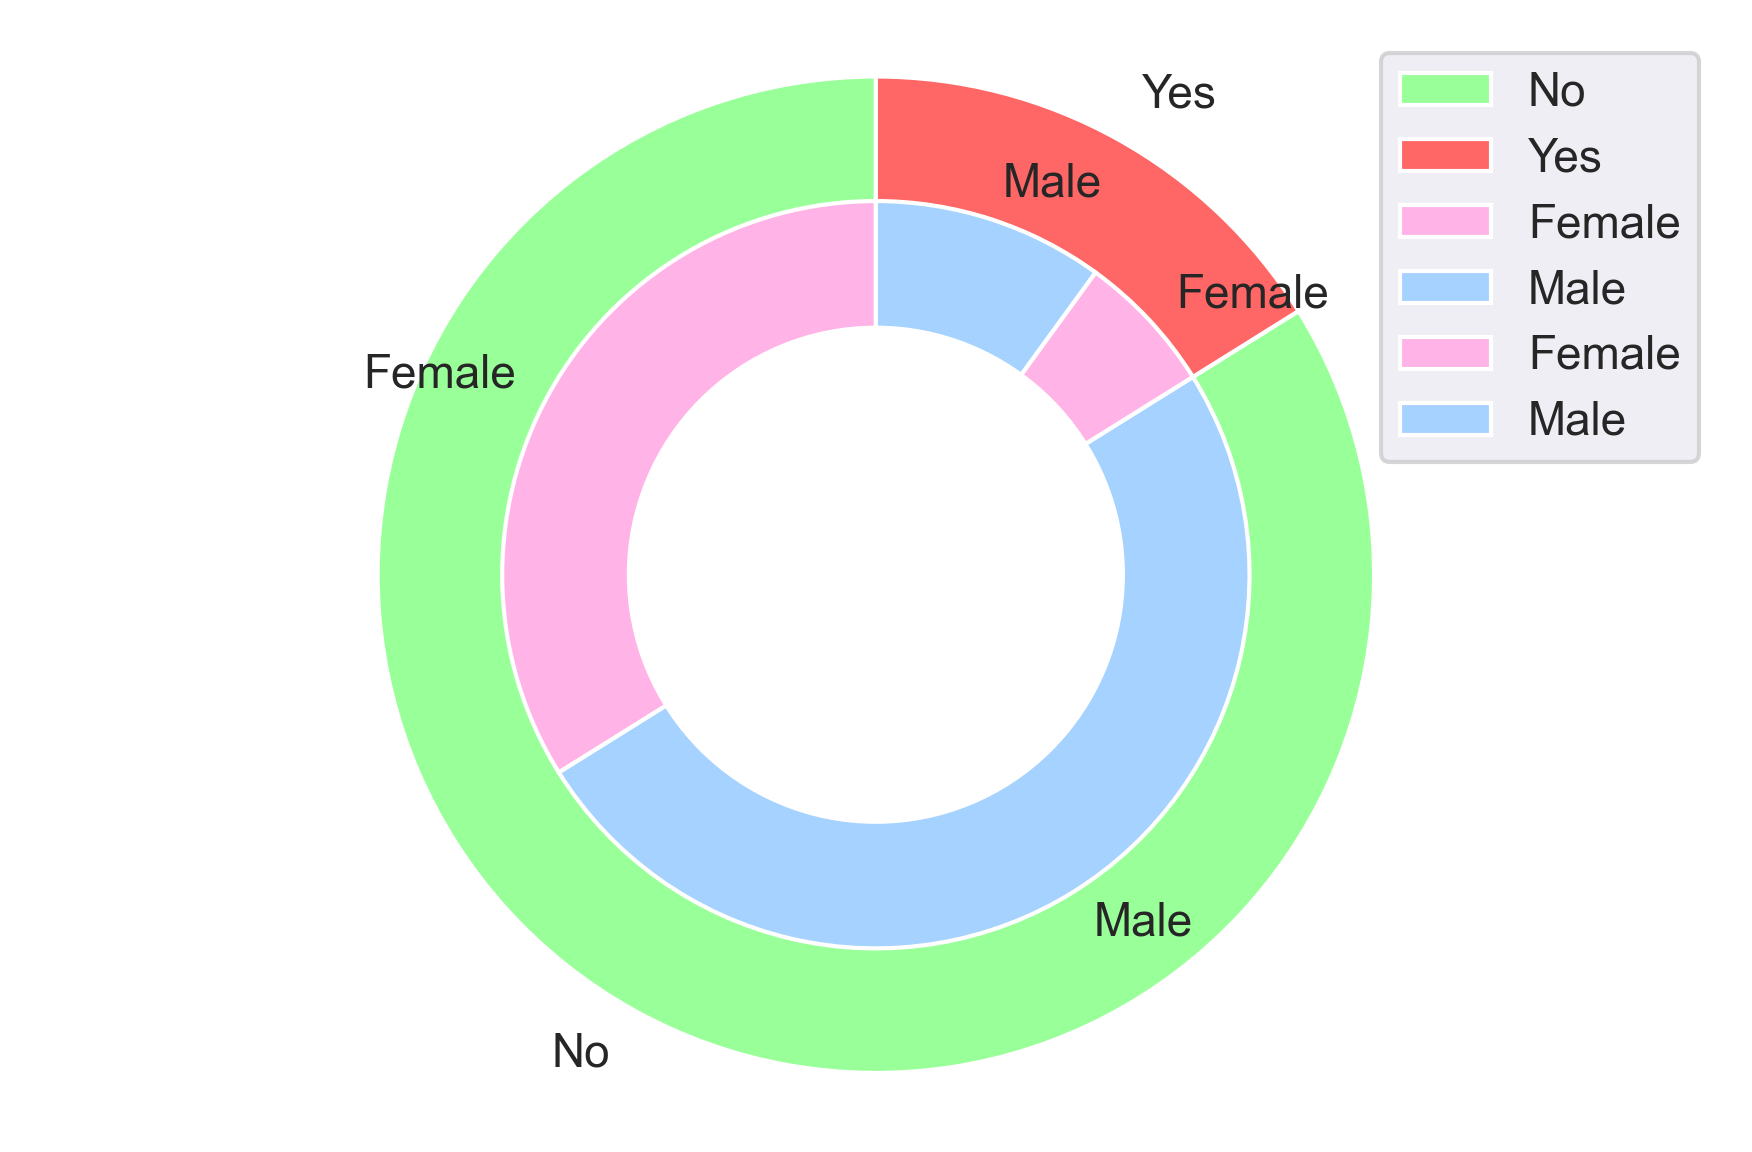

In [77]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.Gender
size2 = df1.Gender_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#ffb3e6','#a6d2ff','#ffb3e6','#a6d2ff']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Gender and Attrition')

<Figure size 3000x3000 with 0 Axes>

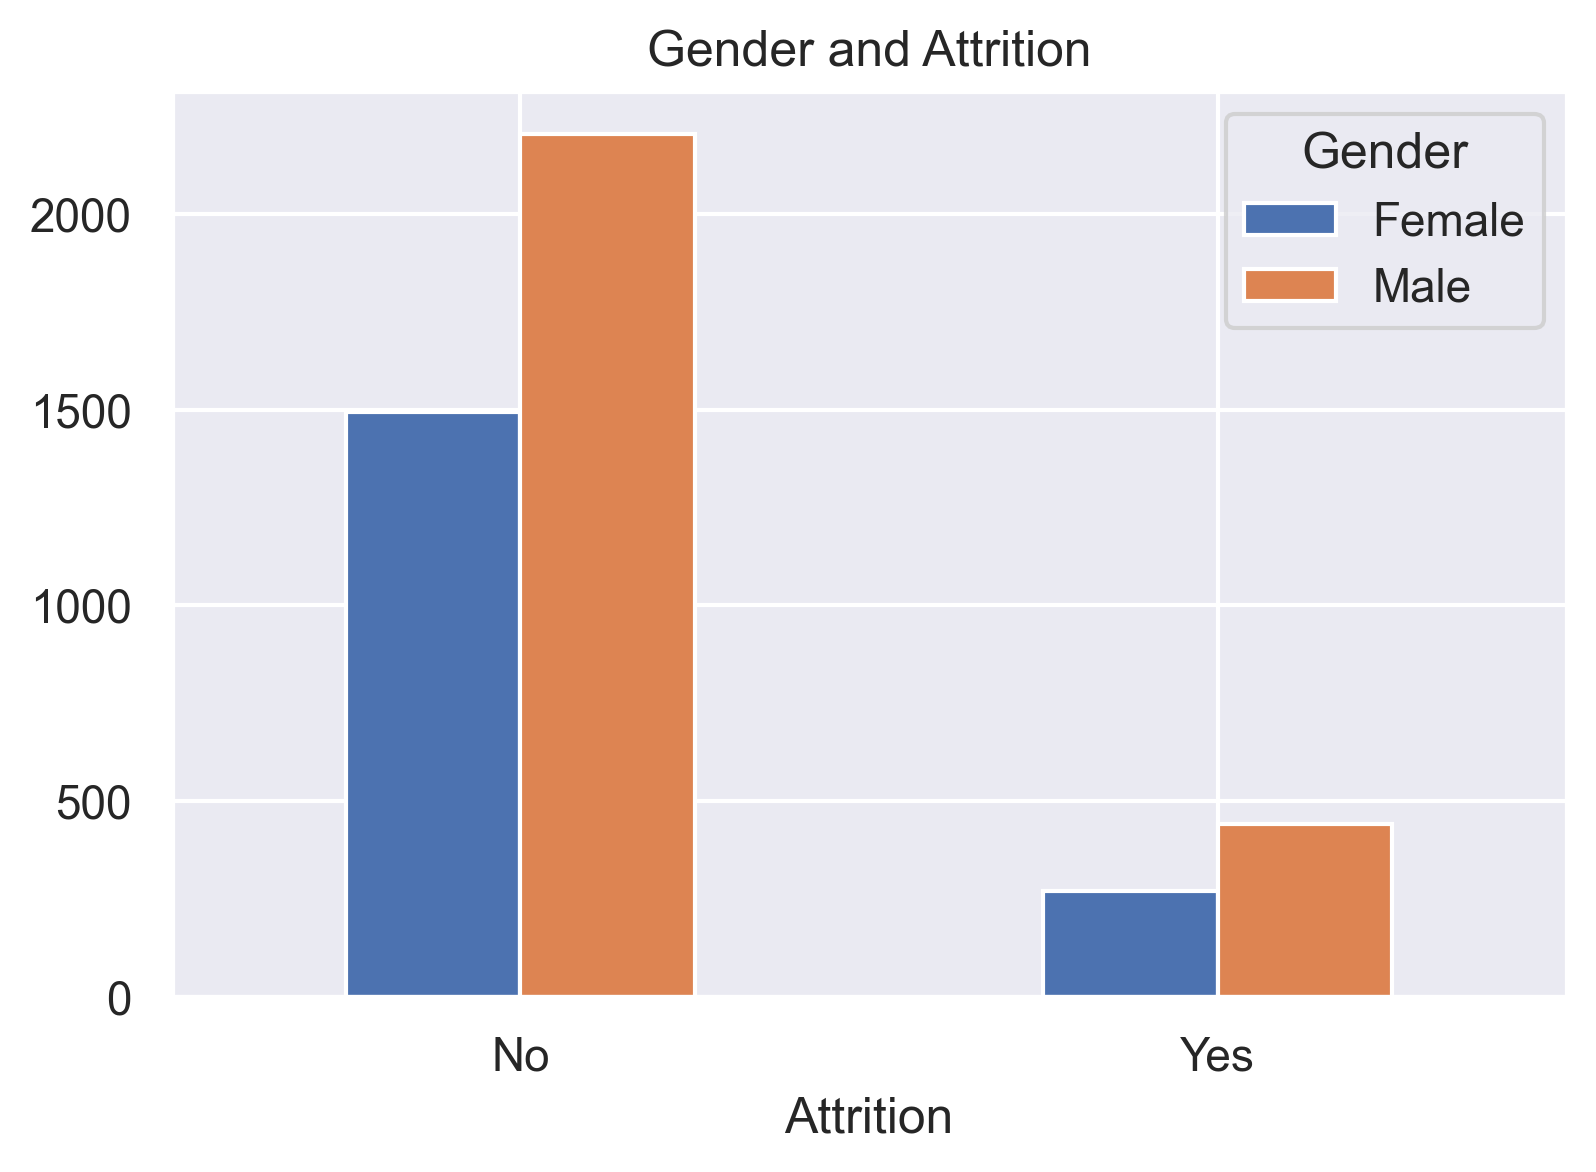

In [78]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['Gender'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Gender and Attrition")

- As compare to female employees, number of male employees who left the comapny is slightly higher.
- 441 Male employees had left the company while 270 Female employees had left the company.
- 2205 Male employees and 1494 Female employees are still working for the company, means they didn't left the company yet.

### Ratio of Attrition based on Job Satisfaction Level

In [79]:
df1 = df.groupby(['Attrition','JobSatisfaction']).agg({'JobSatisfaction':'count'})
df1 = df1.rename({'JobSatisfaction': 'JobSatisfaction_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

  Attrition  JobSatisfaction  JobSatisfaction_count
0        No                1                    664
1        No                2                    707
2        No                3                   1111
3        No                4                   1217
4       Yes                1                    197
5       Yes                2                    139
6       Yes                3                    219
7       Yes                4                    156


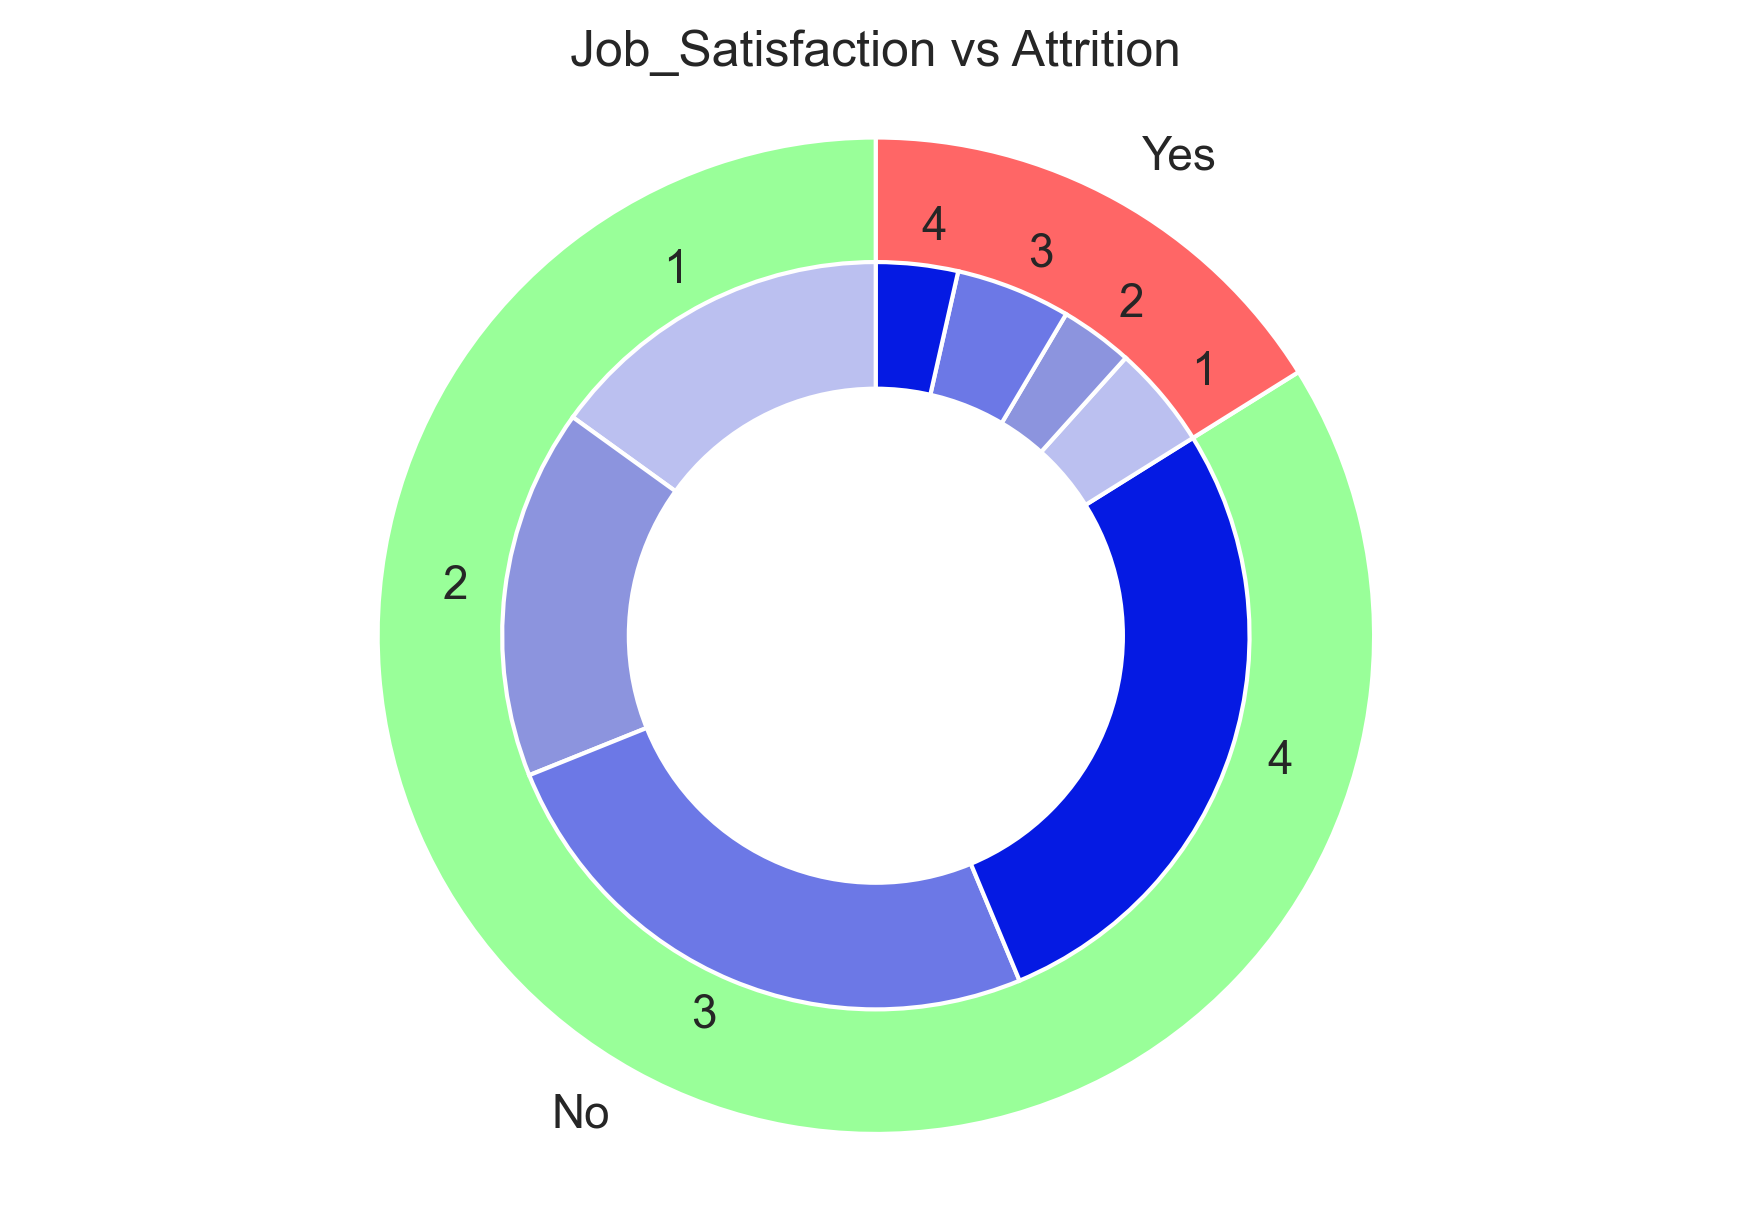

In [80]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.JobSatisfaction
size2 = df1.JobSatisfaction_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#bbc0f0','#8c94de','#6c78e6','#051ae3']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Job_Satisfaction vs Attrition")
plt.show()

Text(0.5, 1.0, 'Job_Satisfaction vs Attrition')

<Figure size 3000x3000 with 0 Axes>

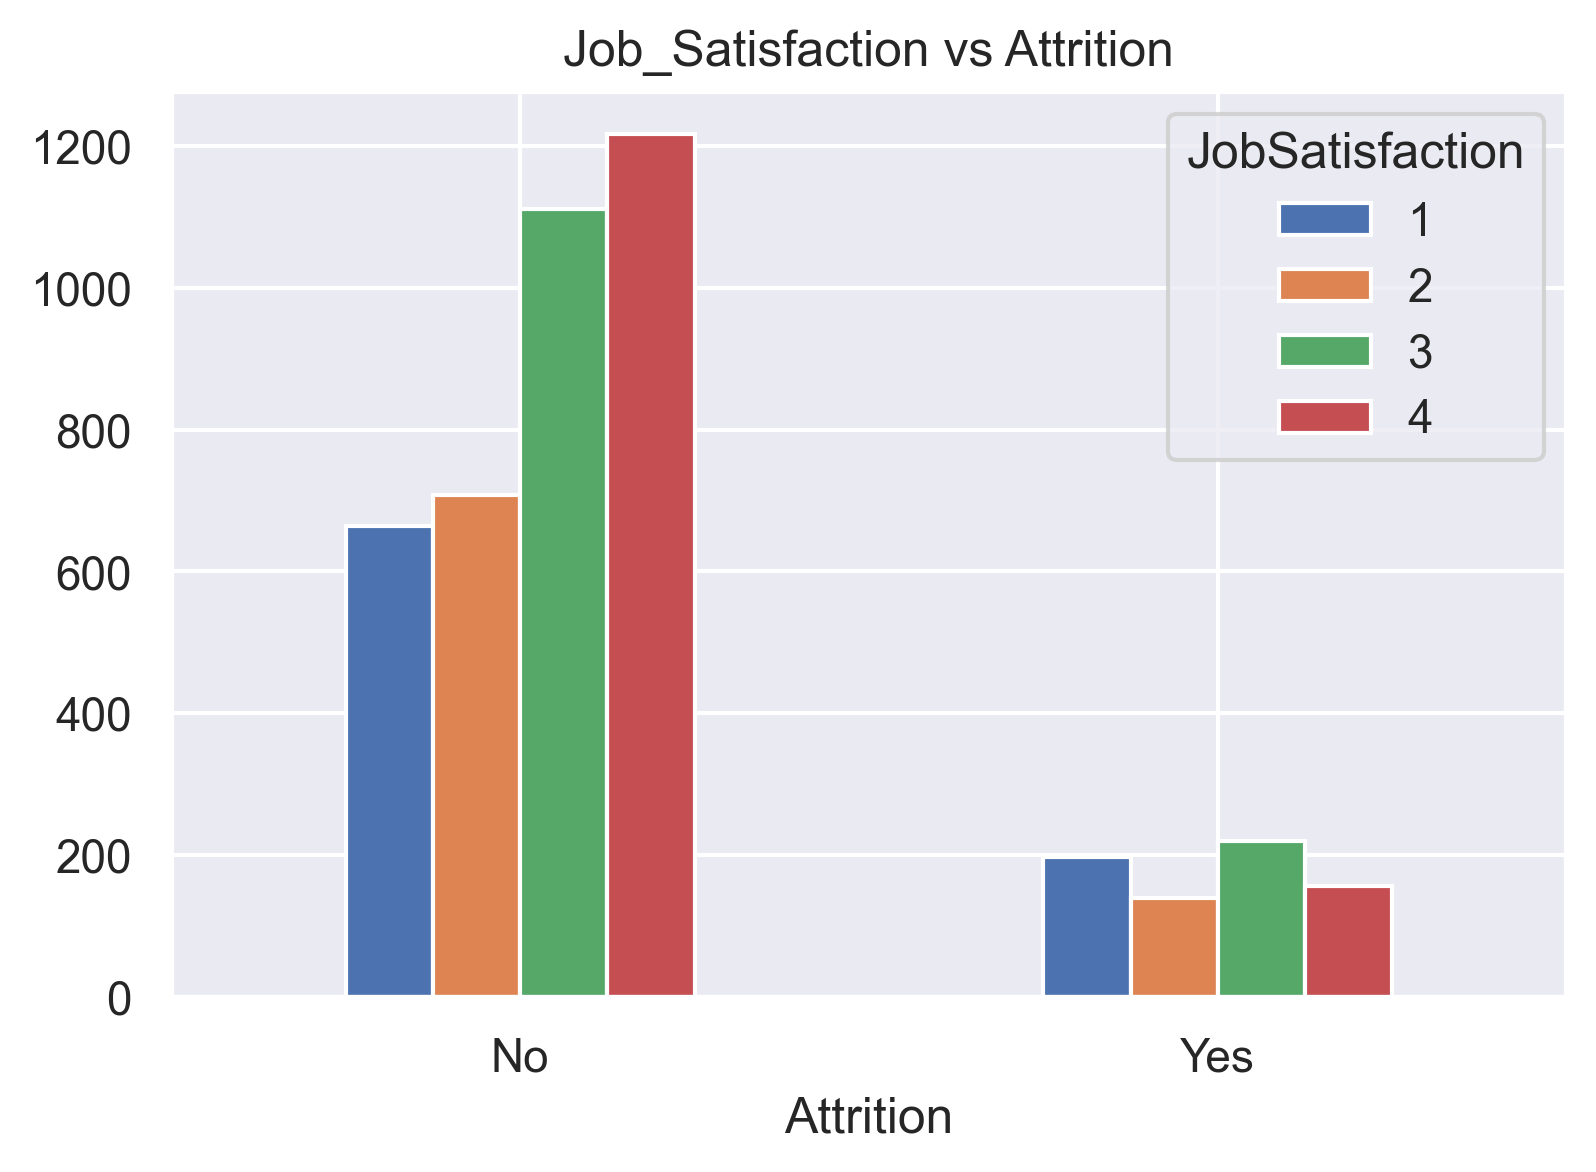

In [81]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['JobSatisfaction'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Job_Satisfaction vs Attrition")

- 664 employees with Job Satisfaction level 1, 707 employees with Job Satisfaction level 2, 1111 employees with Job Satisfaction level 3, and 1217 employees with Job Satisfaction level 4 has didn't left the company yet, which means they are still working for the company.
- While, 197 employees with Job Satisfaction level 1, 139 employees with Job Satisfaction level 2, 219 employees with Job Satisfaction level 3, and 156 employees with Job Satisfaction level 4 had left the company.
- It seems that there is no correlation between Job Satisfaction level and Attrition.

### Ratio of Attrition based on Work Life Balance

In [82]:
df1 = df.groupby(['Attrition','WorkLifeBalance']).agg({'WorkLifeBalance':'count'})
df1 = df1.rename({'WorkLifeBalance': 'WorkLifeBalance_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

  Attrition  WorkLifeBalance  WorkLifeBalance_count
0        No                1                    167
1        No                2                    855
2        No                3                   2303
3        No                4                    374
4       Yes                1                     75
5       Yes                2                    173
6       Yes                3                    382
7       Yes                4                     81


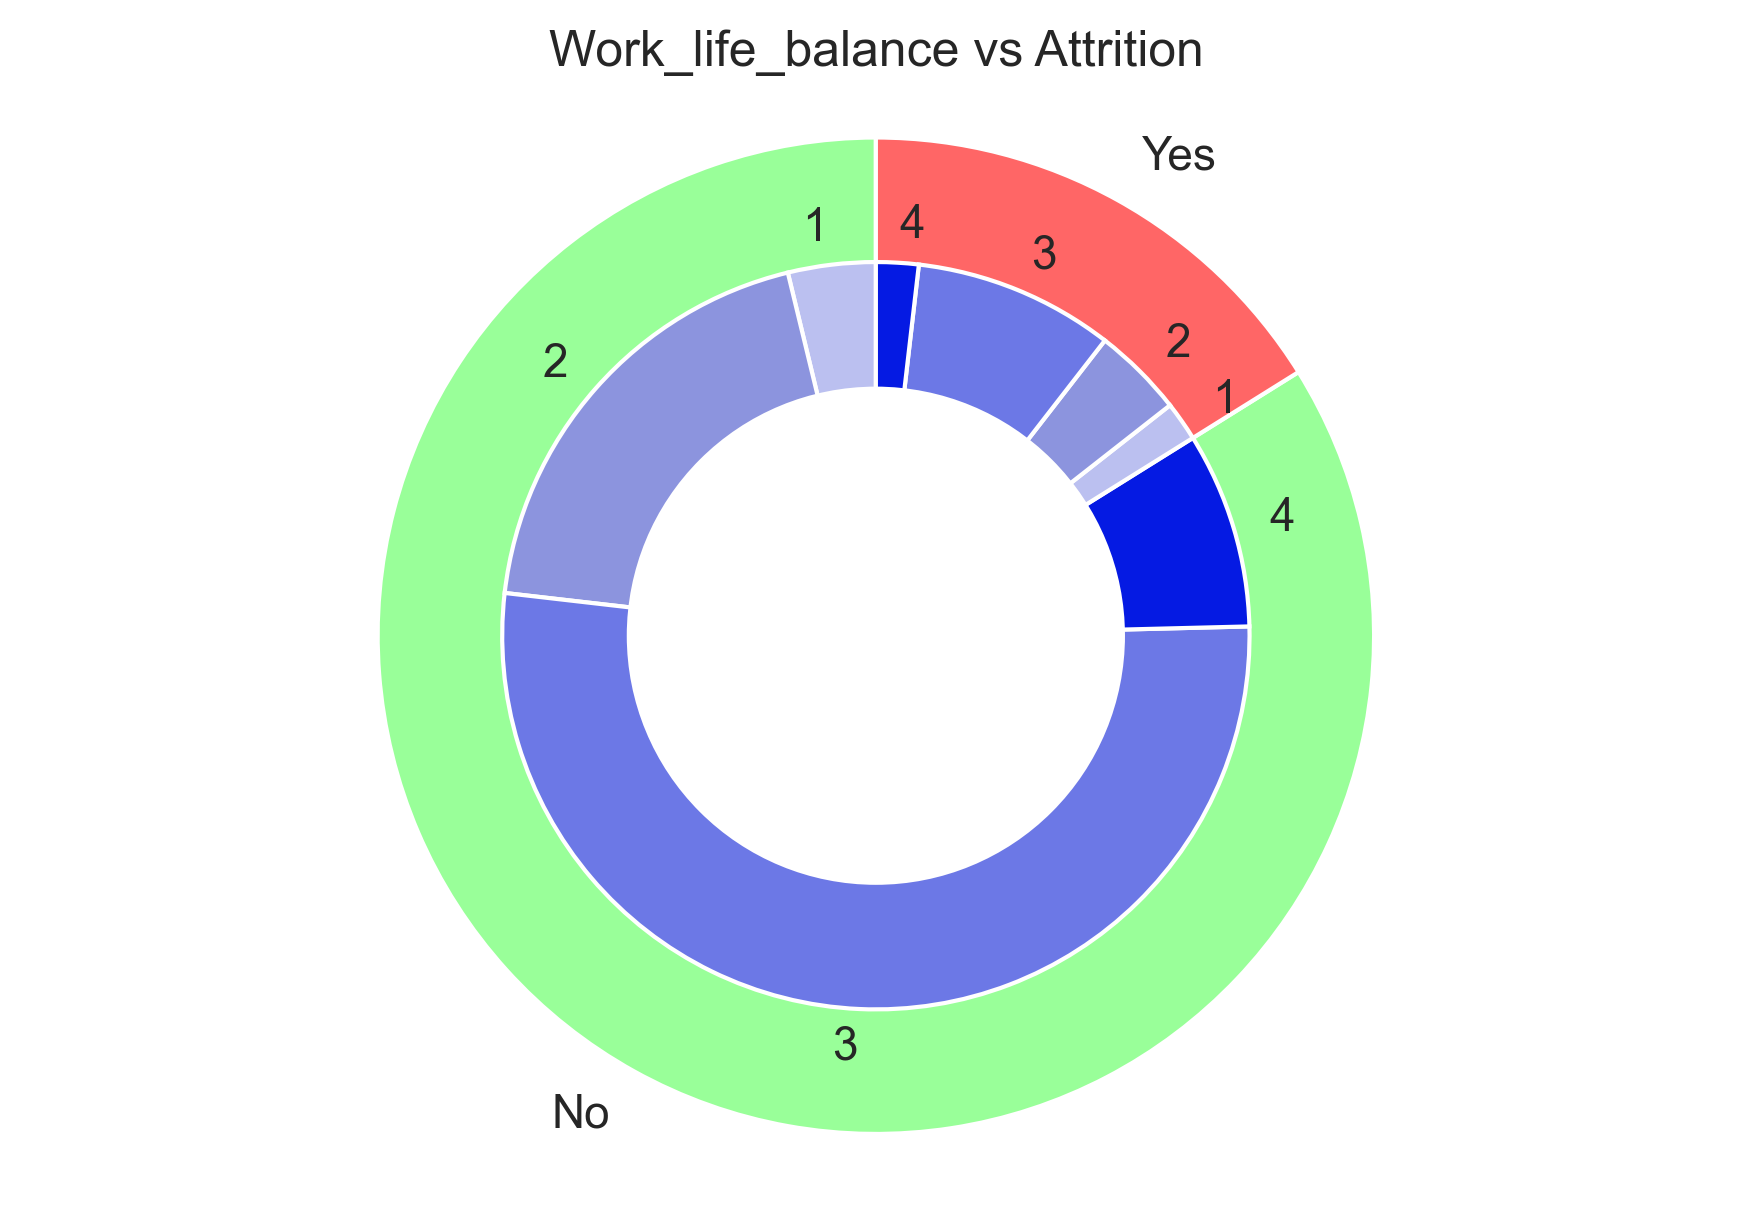

In [83]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.WorkLifeBalance
size2 = df1.WorkLifeBalance_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#bbc0f0','#8c94de','#6c78e6','#051ae3']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Work_life_balance vs Attrition")
plt.show()

Text(0.5, 1.0, 'Work_life_balance vs Attrition')

<Figure size 3000x3000 with 0 Axes>

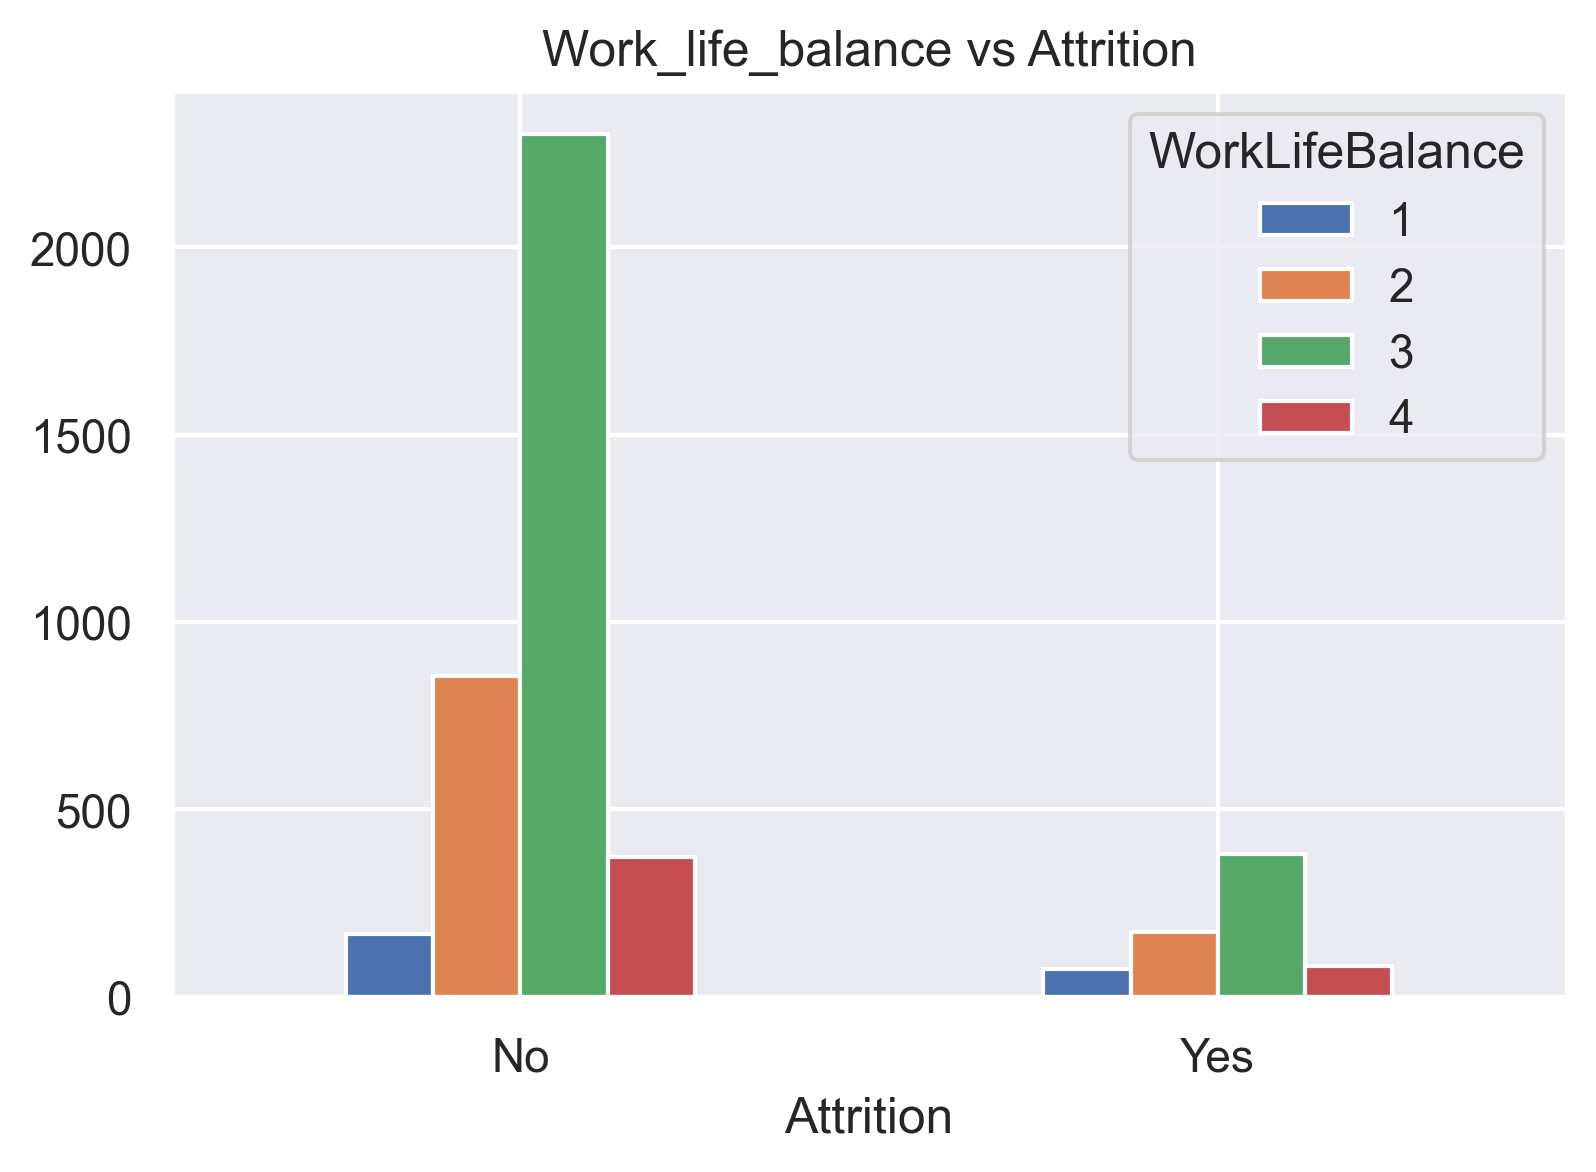

In [84]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['WorkLifeBalance'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Work_life_balance vs Attrition")

- 167 employees with Worklife balance level 1, 855 employees with Worklife balance level 2, 2303 employees with Worklife balance level 3, and 374 employees with Worklife balance level 4 has didn't left the company yet, which means they are still working for the company.
- While, 75 employees with Worklife balance level 1, 173 employees with Worklife balance level 2, 382 employees with Worklife balance level 3, and 81 employees with Worklife balance level 4 had left the company.
- It seems that there is no correlation between Worklife balance level and Attrition.

### Age group showing higher Attrition Rate

- Just checking Age and its count first

In [85]:
df1 = df.groupby(['Attrition','Age']).agg({'Age':'count'})
df1 = df1.rename({'Age': 'Age_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

   Attrition  Age  Age_count
0         No   18         12
1         No   19          9
2         No   20         15
3         No   21         21
4         No   22         33
..       ...  ...        ...
77       Yes   52          9
78       Yes   53          6
79       Yes   55          9
80       Yes   56          9
81       Yes   58         15

[82 rows x 3 columns]


Text(0, 0.5, 'Count')

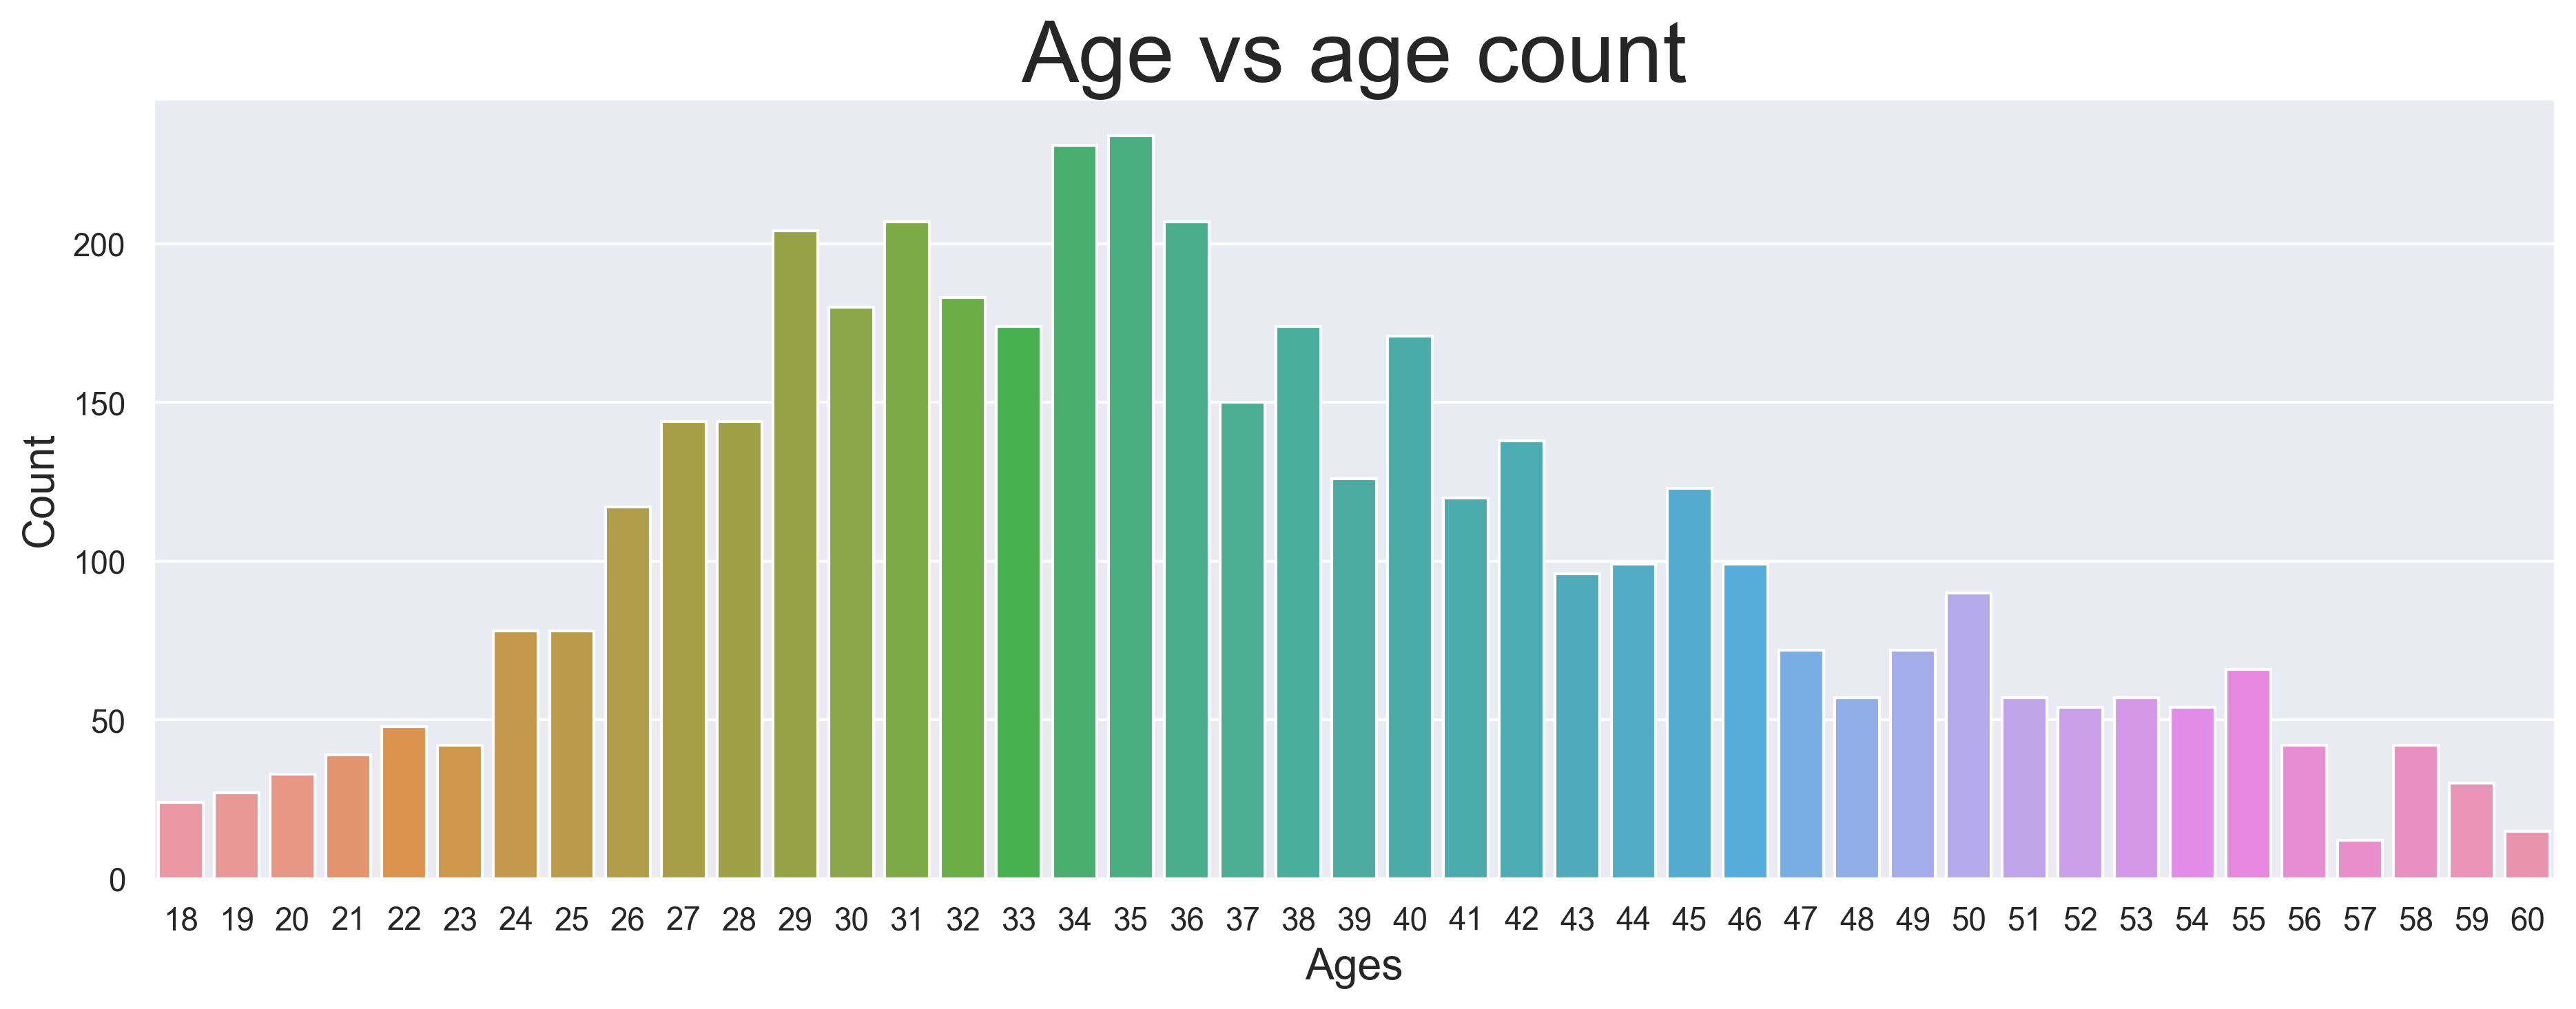

In [86]:
plt.figure(figsize=(15, 5))
x_age = sorted(df['Age'].value_counts().index)
sns.countplot(data=df, x='Age', order=x_age)

plt.title('Age vs age count', fontsize = 30)
plt.xlabel('Ages', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

## Plotting Attrition vs Age barplot and lineplot

<AxesSubplot:xlabel='Age', ylabel='count'>

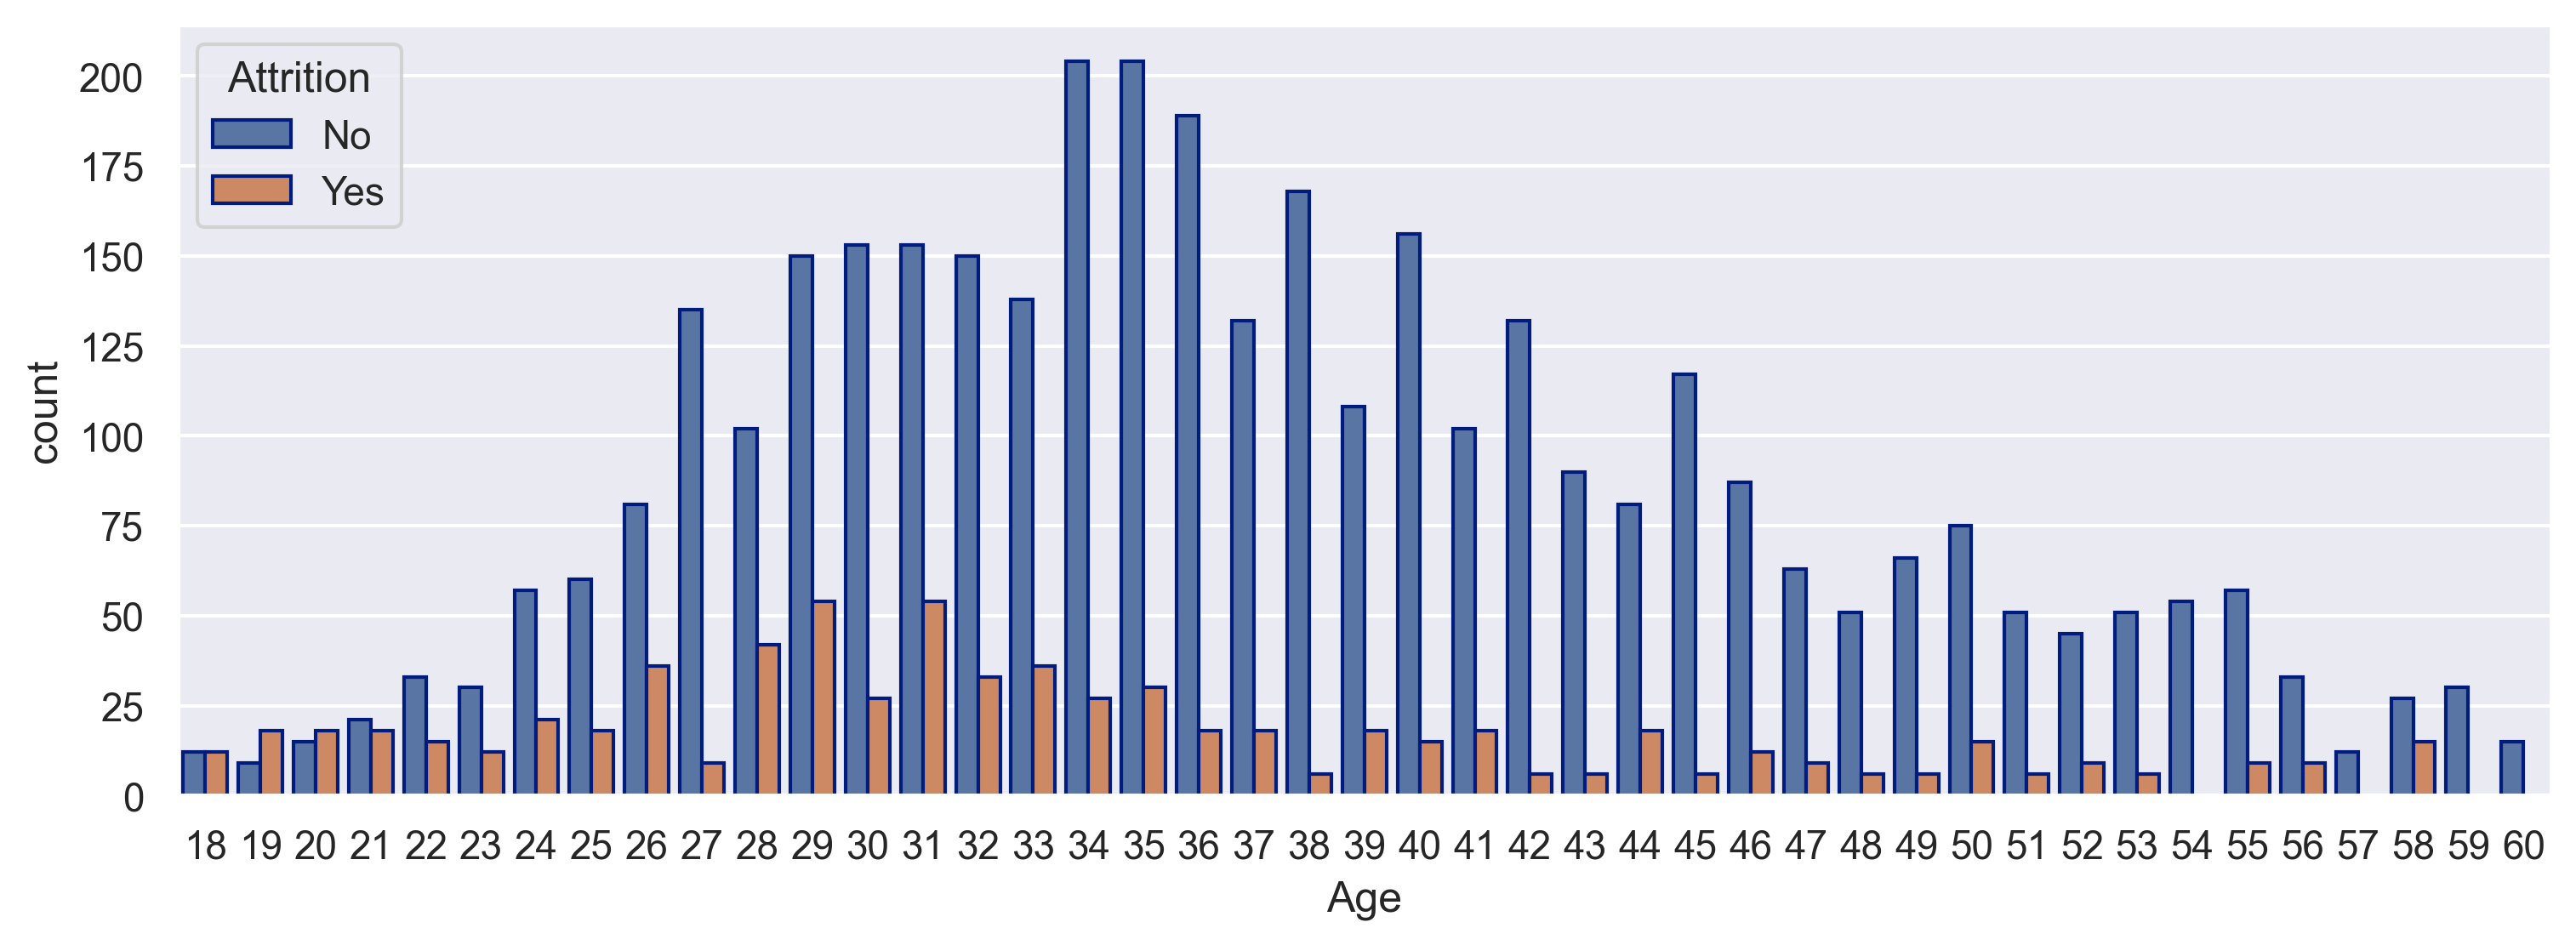

In [87]:
fig_dims=(12,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age', hue='Attrition', ax=ax, data=df, edgecolor=sns.color_palette("dark", n_colors=1))

In [88]:
df1 = df.groupby(['Attrition','Age']).agg({'Age':'count'})
df1 = df1.rename({'Age': 'Age_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

   Attrition  Age  Age_count
0         No   18         12
1         No   19          9
2         No   20         15
3         No   21         21
4         No   22         33
..       ...  ...        ...
77       Yes   52          9
78       Yes   53          6
79       Yes   55          9
80       Yes   56          9
81       Yes   58         15

[82 rows x 3 columns]


In [89]:
df1.Attrition.value_counts()

No     43
Yes    39
Name: Attrition, dtype: int64

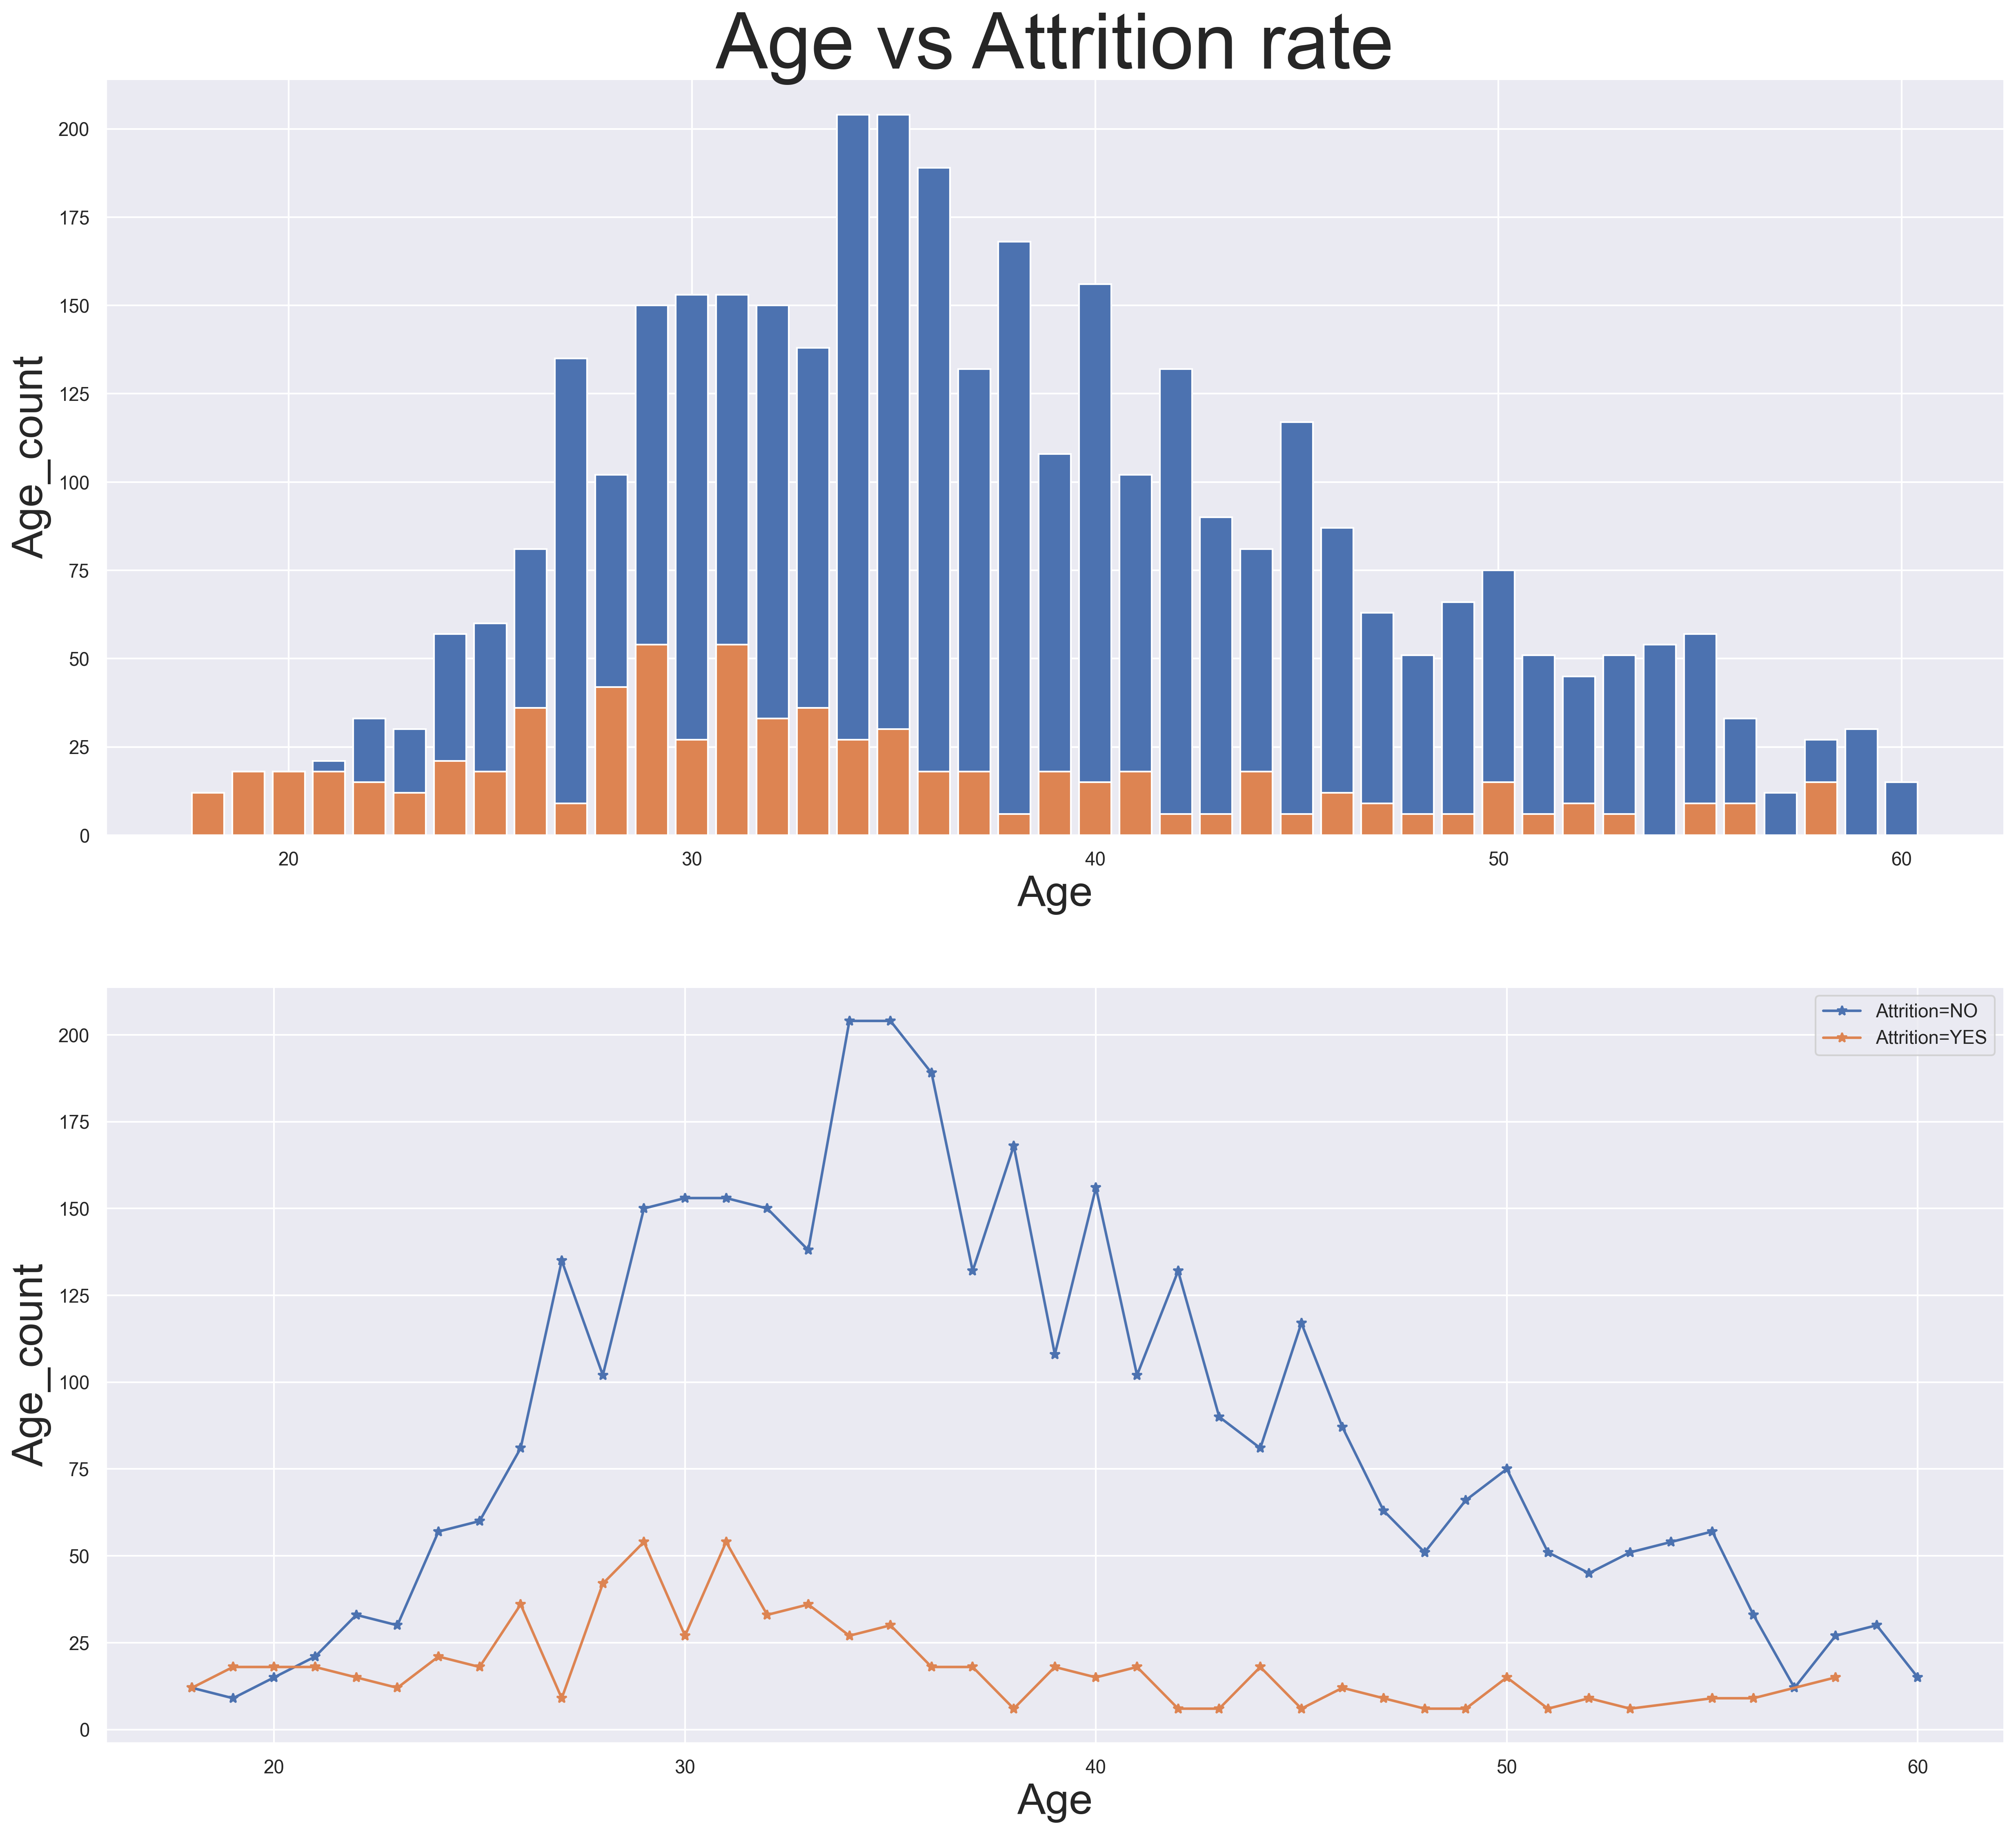

In [90]:
fig, ax =plt.subplots(2,1,figsize=(20,18))

ax[0].bar(df1['Age'].iloc[:43].unique(), df1["Age_count"].iloc[:43])
ax[0].bar(df1['Age'].iloc[43:].unique(), df1["Age_count"].iloc[43:])
ax[0].set_title("Age vs Attrition rate", fontsize=46)
ax[0].set_xlabel('Age', fontsize=25)
ax[0].set_ylabel('Age_count', fontsize=25)
plt.grid(True)

ax[1].plot(df1.Age.iloc[:43], df1.Age_count.iloc[:43], label='Attrition=NO', marker='*')
ax[1].plot(df1.Age.iloc[43:], df1.Age_count.iloc[43:], label='Attrition=YES', marker='*')
ax[1].set_xlabel('Age', fontsize=25)
ax[1].set_ylabel('Age_count', fontsize=25)
plt.legend()

- Employees with age 29 and 30 left more than others. While employees with age of 54, 57, 59, and 60 didn't left the company.
- It seems attrition is more in age group 24-37. While attrition is less in age group above 45.

## Label Encoding

#### Label encoding will convert all categorical column with object as dtype to int64 as dtype. Example: Yes or No to 1 or 0.

In [91]:
df.head()

EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
0                 6          2  Life Sciences              1  Female   
1                10          1  Life Sciences              1  Female   
2                17          4          Other              1    Male   
3                 2          5  Life Sciences              1    Male   
4                10          1        Medical              1    Male   

   JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0         1  Healthcare Representative       Married         131160   
1         1         Research Scientist        Single          41890   
2         4            Sales Executive       Married         193280   
3         3            Human Resources       Married          83210   
4         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                   1      Y                 11              8   
1                   0      Y                 23              8   
2                   1      Y                 15              8   
3                   3      Y                 11              8   
4                   4      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                  1                      6               1   
1                 1                  6                      3               5   
2                 3                  5                      2               5   
3                 3                 13                      5               8   
4                 2                  9                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                        3   
1                        1                     4                        3   
2                        0                     3                        2   
3                        7                     5                        4   
4                        0                     4                        4   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0                4                2               3                  3  
1                2                4               2                  4  
2                2                1               3                  3  
3                4                3               2                  3  
4                1                3               3                  3

In [92]:
col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

EmployeeID  Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0           0   33          0               2           2                 5   
1           1   13          1               1           1                 9   
2           2   14          0               1           1                16   
3           3   20          0               0           1                 1   
4           4   14          0               2           1                 9   

   Education  EducationField  EmployeeCount  Gender  JobLevel  JobRole  \
0          1               1              0       0         0        0   
1          0               1              0       0         0        6   
2          3               4              0       1         3        7   
3          4               1              0       1         2        1   
4          0               3              0       1         0        7   

   MaritalStatus  MonthlyIncome  NumCompaniesWorked  Over18  \
0              1           1166                   1       0   
1              2            505                   0       0   
2              1           1318                   1       0   
3              1            984                   3       0   
4              2            145                   4       0   

   PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  \
0                  0              0                 0                  1   
1                 12              0                 1                  6   
2                  4              0                 3                  5   
3                  0              0                 3                 13   
4                  1              0                 2                  9   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  EnvironmentSatisfaction  JobSatisfaction  \
0                     0                        2                3   
1                     4                        2                1   
2                     3                        1                1   
3                     5                        3                3   
4                     4                        3                0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  
0                1               2                  0  
1                3               1                  1  
2                0               2                  0  
3                2               1                  0  
4                2               2                  0

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   EmployeeID               4410 non-null   int64
 1   Age                      4410 non-null   int64
 2   Attrition                4410 non-null   int32
 3   BusinessTravel           4410 non-null   int32
 4   Department               4410 non-null   int32
 5   DistanceFromHome         4410 non-null   int64
 6   Education                4410 non-null   int64
 7   EducationField           4410 non-null   int32
 8   EmployeeCount            4410 non-null   int64
 9   Gender                   4410 non-null   int32
 10  JobLevel                 4410 non-null   int64
 11  JobRole                  4410 non-null   int32
 12  MaritalStatus            4410 non-null   int32
 13  MonthlyIncome            4410 non-null   int64
 14  NumCompaniesWorked       4410 non-null   int64
 15  Over

- We converted all object categorical to int categorical

## Feature Selection

### Checking constant feature

In [94]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))
print("Shape: ", df.shape)

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')
['EmployeeCount', 'Over18', 'StandardHours']
3
Shape:  (4410, 29)


### Correlation among numerical features

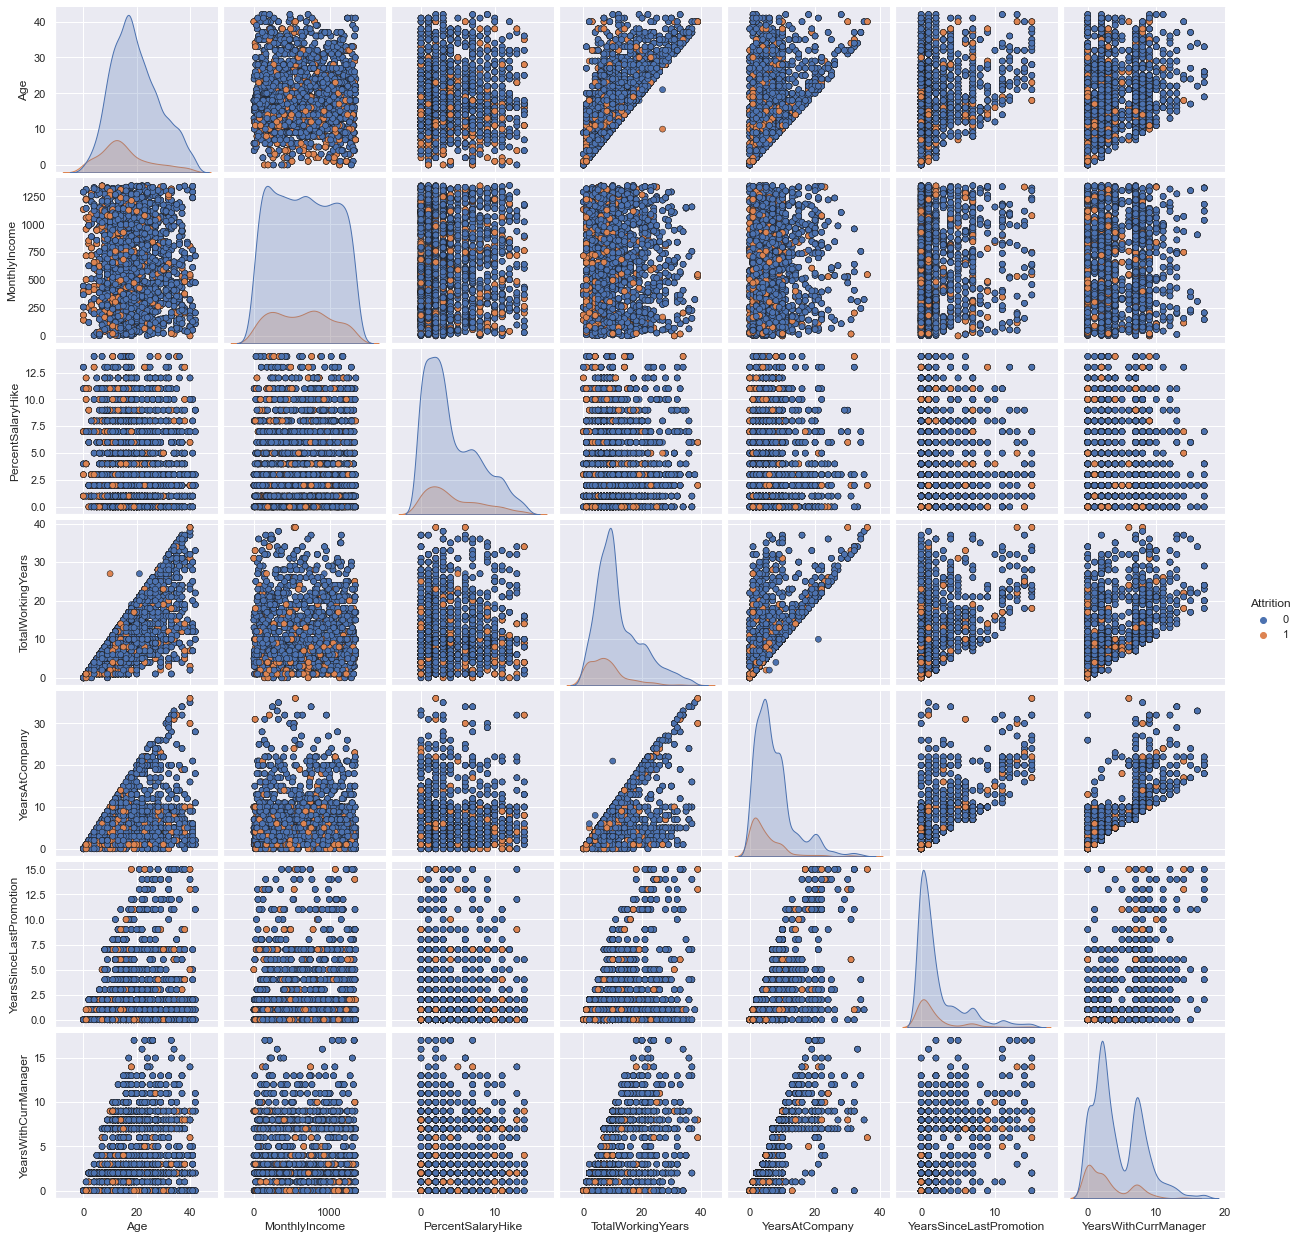

In [37]:
pp = sns.pairplot(df[["Age", "MonthlyIncome", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition"]], hue = "Attrition", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))
t = fig.suptitle('Analyzing Attrition rate of a Company', fontsize=30)

**Observations:**
- It's seems there is no correlation among numerical columns
- Lets verify using Spearman Correlation Hetamap

<AxesSubplot:title={'center':'Analyzing Attrition rate of a Company'}>

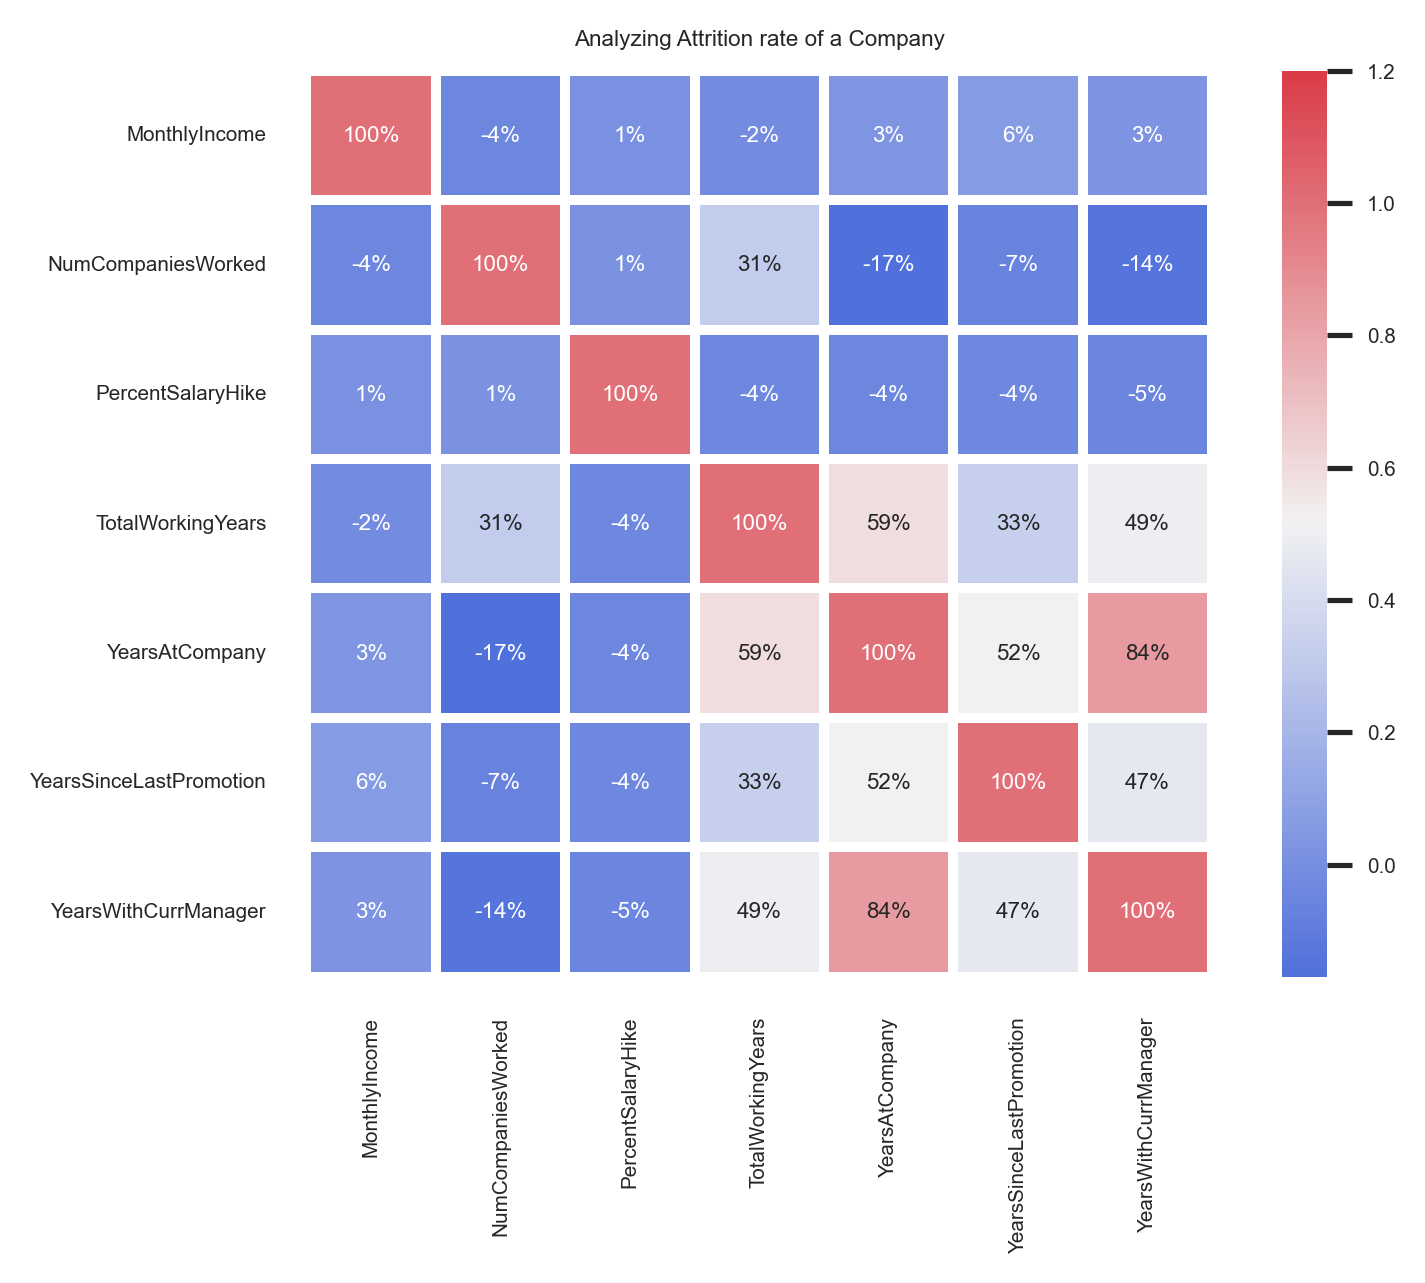

In [95]:
sns.set(font_scale=0.45)
plt.title('Analyzing Attrition rate of a Company')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df[["MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]].corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

In [96]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [97]:
corr_features = correlation(df, 0.85)
corr_features

set()

**Observations:**
- By using Spearman Correlation, we can observed that there is 84% correlation between Years with Current Manager feature and Years at Company feature
- But we are considering threshold of 85%. That means if any correlation is of or above 85% then we will drop that column. So there is no column with correlation greater than 85%.

### Relation among categorical features

In [98]:
f_p_values = chi2(df[cat],df["Attrition"])

p_values = pd.Series(f_p_values[1])
p_values.index = cat
p_values.sort_values(ascending=False)

BusinessTravel             9.979489e-01
StockOptionLevel           6.641673e-01
JobInvolvement             5.755947e-01
JobLevel                   4.635222e-01
Education                  4.575835e-01
Gender                     4.465058e-01
PerformanceRating          1.528042e-01
Department                 1.324858e-01
JobRole                    4.576320e-02
WorkLifeBalance            2.714724e-02
TrainingTimesLastYear      1.145092e-02
EducationField             6.360036e-04
NumCompaniesWorked         2.439473e-05
NumCompaniesWorked         2.439473e-05
EnvironmentSatisfaction    2.646865e-08
JobSatisfaction            9.436892e-09
MaritalStatus              6.424208e-14
Attrition                  0.000000e+00
dtype: float64

In [99]:
# Null Hypothesis: The null hypothesis states that there is no relationship between the two variables
cnt = 0
for i in p_values:
    if i > 0.05:
        print("There is no relationship", p_values.index[cnt], i)
    else:
        print("There is relationship", p_values.index[cnt], i)
    
    cnt += 1

There is relationship Attrition 0.0
There is no relationship BusinessTravel 0.9979489452875708
There is no relationship Department 0.13248581741535442
There is no relationship Education 0.45758354147957037
There is relationship EducationField 0.0006360036404903508
There is no relationship Gender 0.44650578050859024
There is relationship NumCompaniesWorked 2.4394731213485767e-05
There is no relationship JobLevel 0.4635222356771651
There is relationship JobRole 0.045763196137195525
There is relationship MaritalStatus 6.424208374700033e-14
There is relationship NumCompaniesWorked 2.4394731213485767e-05
There is no relationship StockOptionLevel 0.6641672778235013
There is relationship TrainingTimesLastYear 0.011450915298875403
There is relationship EnvironmentSatisfaction 2.6468648110956076e-08
There is relationship JobSatisfaction 9.436892108302151e-09
There is relationship WorkLifeBalance 0.027147239935596805
There is no relationship JobInvolvement 0.5755947220313419
There is no relation

**Observations:**
- We can clearly observed from Chi Square Test that there is no relation between features: BusinessTravel, Department, Gender, JobLevel, StockOptionLevel, JobInvolvement, and PerformanceRating with Attrition feature

**One more way to check relation among categorical features i.e. Spearman Correlation**

<AxesSubplot:title={'center':'Analyzing Attrition rate of a Company'}>

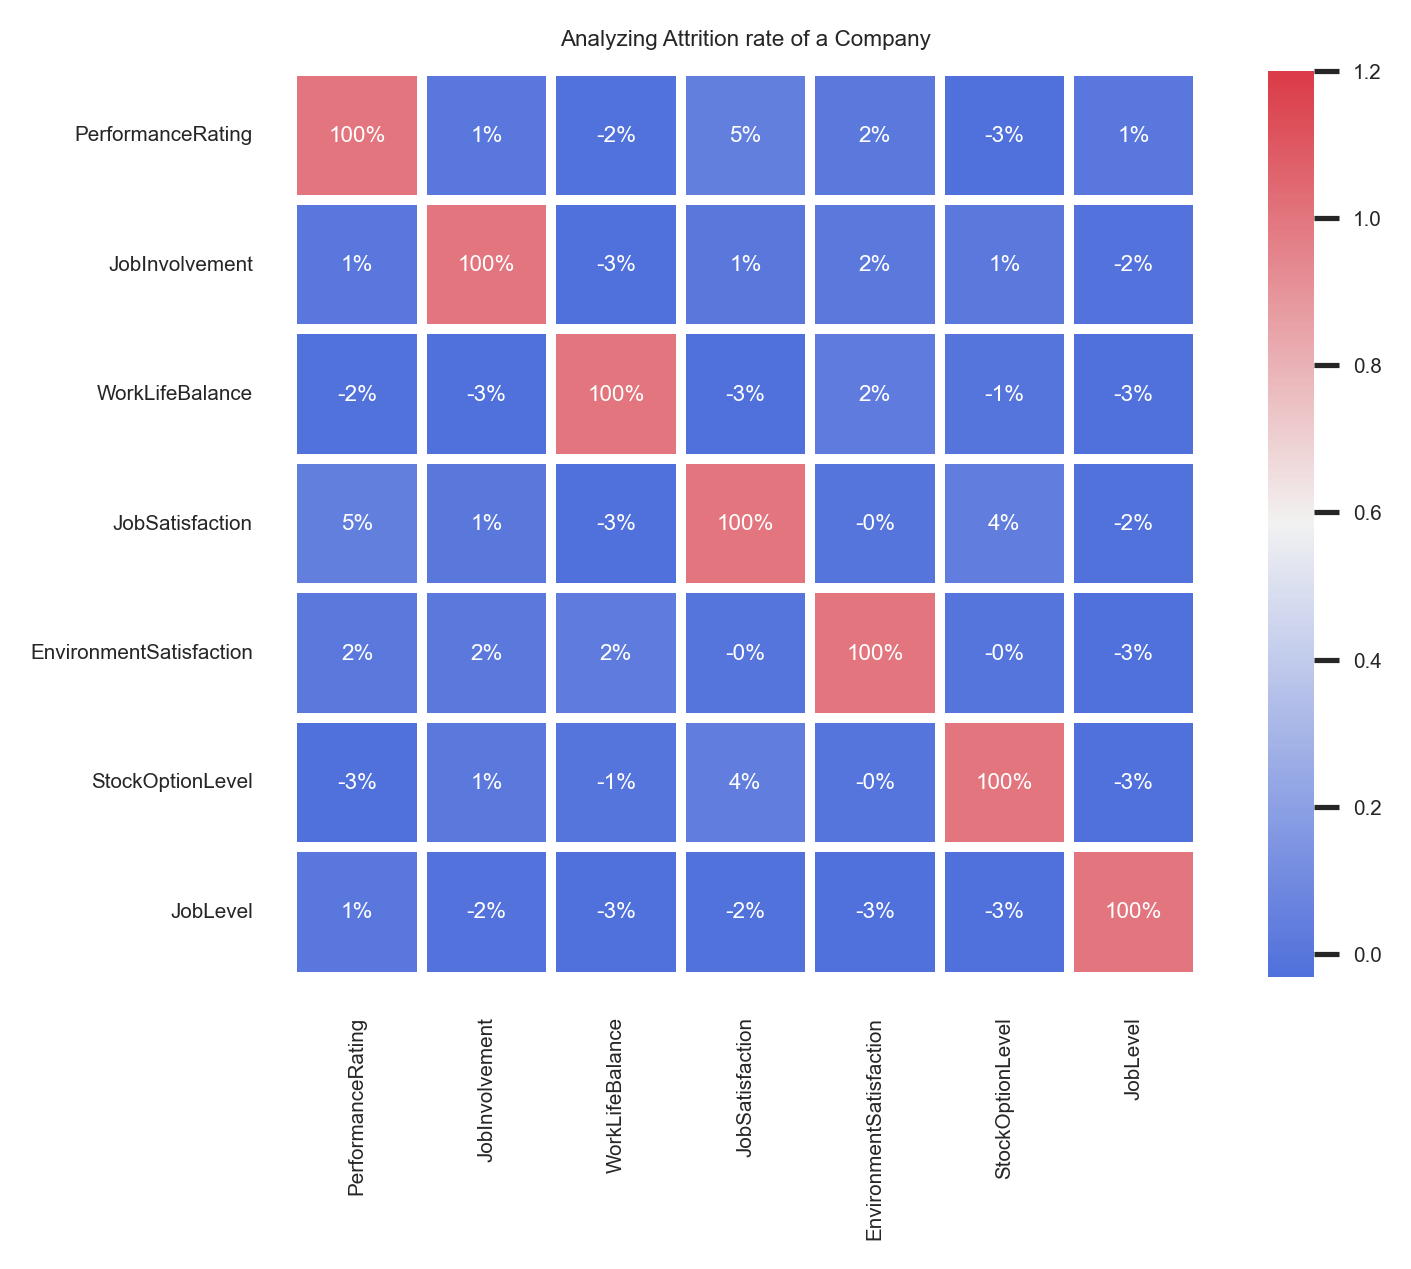

In [100]:
sns.set(font_scale=0.45)
plt.title('Analyzing Attrition rate of a Company')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df[["PerformanceRating", "JobInvolvement", "WorkLifeBalance", "JobSatisfaction", "EnvironmentSatisfaction", "StockOptionLevel", "JobLevel"]].corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, fmt = '.0%', linewidths=2)

### Relation among numerical and classification column

In [101]:
df_anova = df[["EmployeeID", "Age", "MonthlyIncome", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition"]]
grps = pd.unique(df_anova.Attrition.values)
grps

for i in range(len(df_anova.columns)-1):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.Attrition == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and Attrition".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and Attrition \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and Attrition \n".format(df_anova.columns[i]))

P_Value of EmployeeID and Attrition 0.753548740189224
There is no relation between EmployeeID and Attrition 

P_Value of Age and Attrition 1.9968016158845057e-26
There is relation between Age and Attrition 

P_Value of MonthlyIncome and Attrition 0.09813272891104091
There is no relation between MonthlyIncome and Attrition 

P_Value of PercentSalaryHike and Attrition 0.030743386433316814
There is relation between PercentSalaryHike and Attrition 

P_Value of TotalWorkingYears and Attrition 5.4031739562937124e-30
There is relation between TotalWorkingYears and Attrition 

P_Value of YearsAtCompany and Attrition 6.612239821517807e-20
There is relation between YearsAtCompany and Attrition 

P_Value of YearsSinceLastPromotion and Attrition 0.02833033618936241
There is relation between YearsSinceLastPromotion and Attrition 

P_Value of YearsWithCurrManager and Attrition 1.7339322652874626e-25
There is relation between YearsWithCurrManager and Attrition 



**Observations:**
- We can clearly observed from One Way ANOVA Test that there is no relation between MonthlyIncome and Attrition and also no relation between EmployeeID and Attrition

**From above all test and correlation, we have to drop EmployeeID, StandardHours, Over18, EmployeeCount, BusinessTravel, Department, Gender, JobLevel, StockOptionLevel, JobInvolvement, PerformanceRating, and MonthlyIncome**

If we think logically then:
- Columns like EmployeeCount can be drop as it has no information which will be helpful for us during analysis. 
- Also Over 18 column has no sense as all employees are over 18 only. We can drop this also. 
- Similarly, EmployeeID also have no use in our data analysis, so we can drop it also. 
- Column StandardHours have only one values for all employees i.e. 8. so we can drop this also.

- Lets verify MonthlyIncome and Attrition relation by plotting scatter plot

<AxesSubplot:xlabel='EmployeeID', ylabel='MonthlyIncome'>

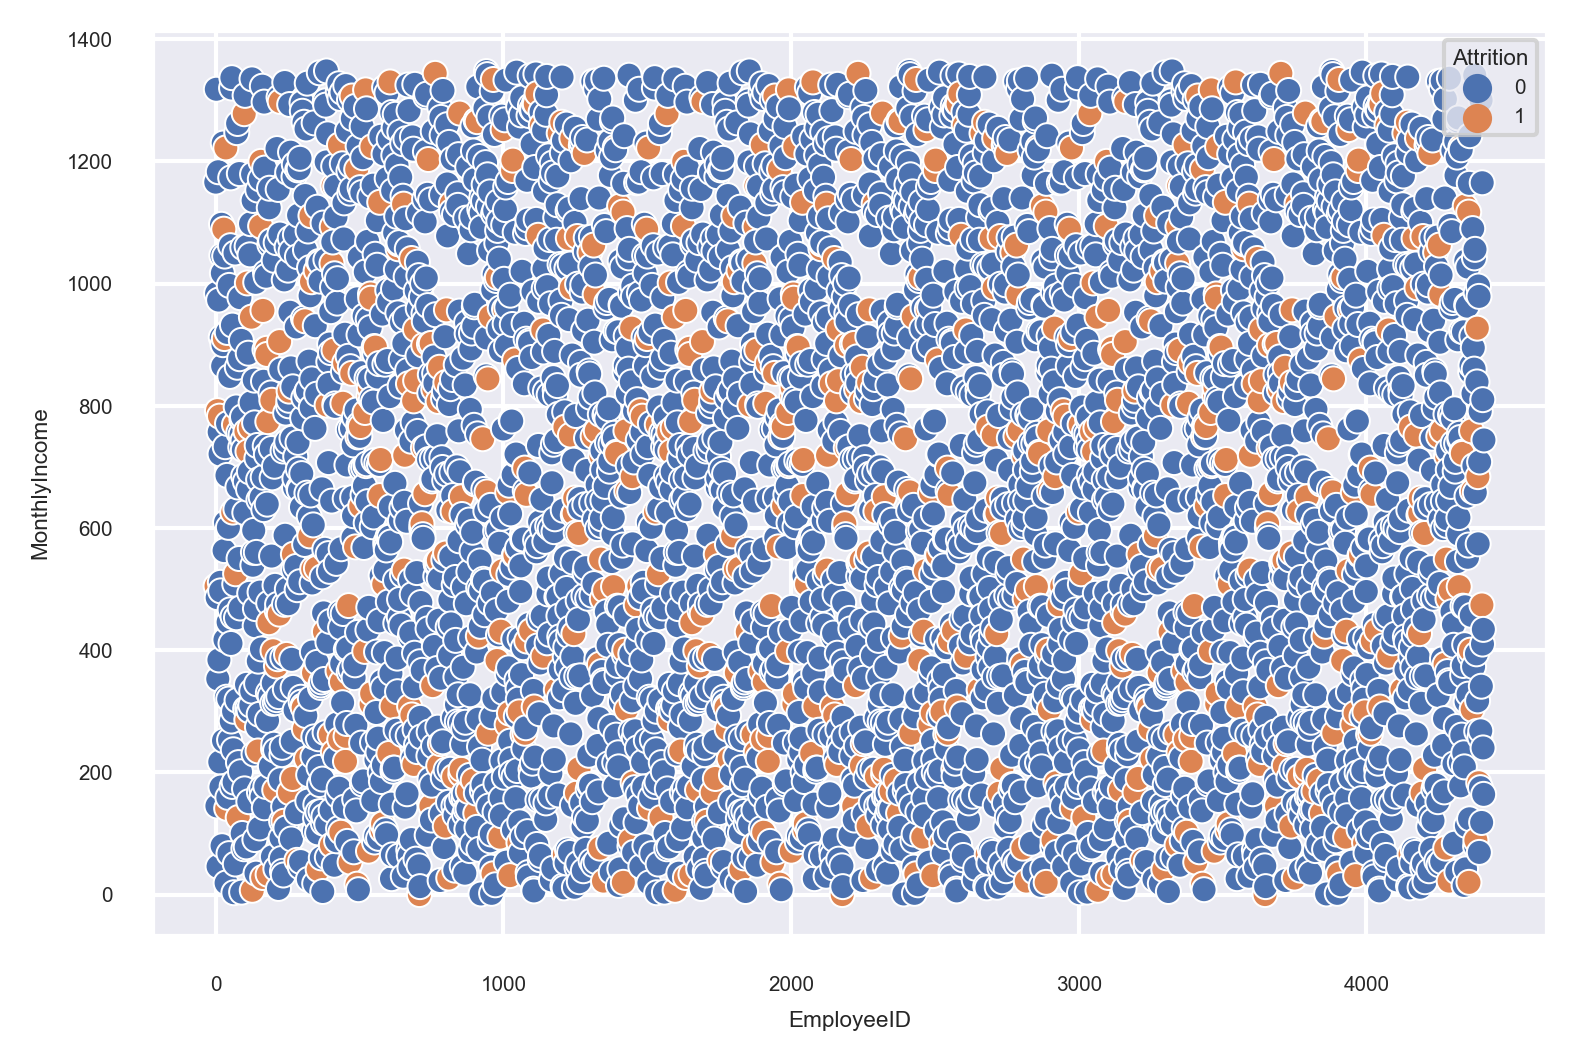

In [102]:
sns.scatterplot(x="EmployeeID", y="MonthlyIncome", hue="Attrition", data=df)

- Seems our ANOVA test analysis is true and there is no relation between Monthly Income and Attrition

In [103]:
df.drop(['Over18', 'EmployeeCount', 'EmployeeID', 'StandardHours', "BusinessTravel", "Department", "Gender", "JobLevel", "StockOptionLevel", "JobInvolvement", "PerformanceRating", "MonthlyIncome"], axis=1, inplace=True)
print(df.columns)
print(len(df.columns))

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EducationField',
       'JobRole', 'MaritalStatus', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')
17


## Target Feature Seperation

In [104]:
x = df.drop("Attrition", axis=1)
y = df.Attrition

In [105]:
print(len(y[y==0]), len(y[y==1]))

3699 711


# Handling Imbalanced data

In [106]:
os =  RandomOverSampler(sampling_strategy=1)

x_res, y_res = os.fit_resample(x, y)

print(len(y_res[y_res==0]), len(y_res[y_res==1]))
print(len(x_res))

3699 3699
7398


# Scaling the data

In [107]:
scaler = StandardScaler()
features = scaler.fit_transform(x_res)
features

array([[ 1.60644074, -0.39617645, -0.87865896, ...,  0.32686275,
         1.24263554, -0.94701079],
       [-0.48862124,  0.10376613, -1.86310829, ...,  0.32686275,
        -0.54850284,  1.71584966],
       [-0.38386814,  0.97866565,  1.09023972, ..., -0.55728007,
        -0.54850284, -2.27844102],
       ...,
       [-1.85041153, -1.02110468,  1.09023972, ...,  0.32686275,
         0.34706635,  0.38441943],
       [-0.59337434, -0.02121951,  0.10579038, ..., -0.55728007,
        -1.44407202,  1.71584966],
       [-0.59337434, -1.02110468,  0.10579038, ..., -0.55728007,
        -1.44407202,  0.38441943]])

# Splitting the data into train and test data

In [108]:
x_train, x_test, y_train, y_test = train_test_split(features, y_res, test_size=0.3, random_state=1) 
x_train

array([[-0.48862124,  0.60370871, -0.87865896, ...,  0.32686275,
         0.34706635,  1.71584966],
       [ 0.13989735,  0.85368   ,  0.10579038, ...,  1.21100557,
         1.24263554,  0.38441943],
       [-0.17436194, -0.77113339, -0.87865896, ...,  1.21100557,
         1.24263554, -0.94701079],
       ...,
       [ 1.08267524,  0.10376613,  0.10579038, ...,  1.21100557,
        -0.54850284,  1.71584966],
       [ 0.87316905,  2.4784934 ,  1.09023972, ..., -1.44142289,
         0.34706635,  1.71584966],
       [ 1.71119384, -0.27119081, -1.86310829, ...,  0.32686275,
        -0.54850284, -0.94701079]])

In [109]:
y_train

2617    0
1734    0
700     0
5576    1
2989    0
       ..
905     0
5192    1
3980    1
235     0
5157    1
Name: Attrition, Length: 5178, dtype: int32

In [110]:
x_test

array([[-0.48862124,  0.10376613,  0.10579038, ...,  0.32686275,
         0.34706635, -0.94701079],
       [ 1.92070004,  1.10365129,  1.09023972, ...,  1.21100557,
        -1.44407202,  0.38441943],
       [-1.32664603, -0.39617645,  0.10579038, ...,  1.21100557,
         0.34706635,  0.38441943],
       ...,
       [-0.06960884,  0.97866565,  1.09023972, ...,  1.21100557,
         1.24263554,  1.71584966],
       [-0.59337434,  0.10376613,  0.10579038, ...,  0.32686275,
         1.24263554, -0.94701079],
       [-1.01238674, -0.89611903, -0.87865896, ..., -1.44142289,
         1.24263554,  0.38441943]])

In [111]:
y_test

573     1
3257    0
5234    1
783     0
4086    0
       ..
7350    1
934     0
5257    1
3928    1
1783    0
Name: Attrition, Length: 2220, dtype: int32

# Making a Model

## Logistic Regression

In [228]:
def lr_grid_search(X, y):
    model = LogisticRegression()
    
    # Create a dictionary of all values we want to test
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    
    # define grid search
    param_grid = dict(solver=solvers, penalty=penalty, C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_search.fit(X, y)
    
    return grid_result.best_params_

In [229]:
lr_grid_search(features, y_res)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [112]:
lr =LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

lr_tacc = lr.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1087
           1       0.67      0.69      0.68      1133

    accuracy                           0.67      2220
   macro avg       0.67      0.67      0.67      2220
weighted avg       0.67      0.67      0.67      2220

Accuracy: 0.668018018018018
Precision: 0.668081494057725
Recall: 0.6946160635481023
0.6900347624565469
0.668018018018018


- Accuracy = Proportion of correct prediction over total prediction
- When an employee left, how often does my classifier predict that correctly? This measurement is called “recall”
- Recall = Out of actual positive(True positive + False negative), how many are True positive
- Precision Out of predicted positive (true positive + False positive), how many are True positive

## Confusion matrix of Logistic regression model

<AxesSubplot:>

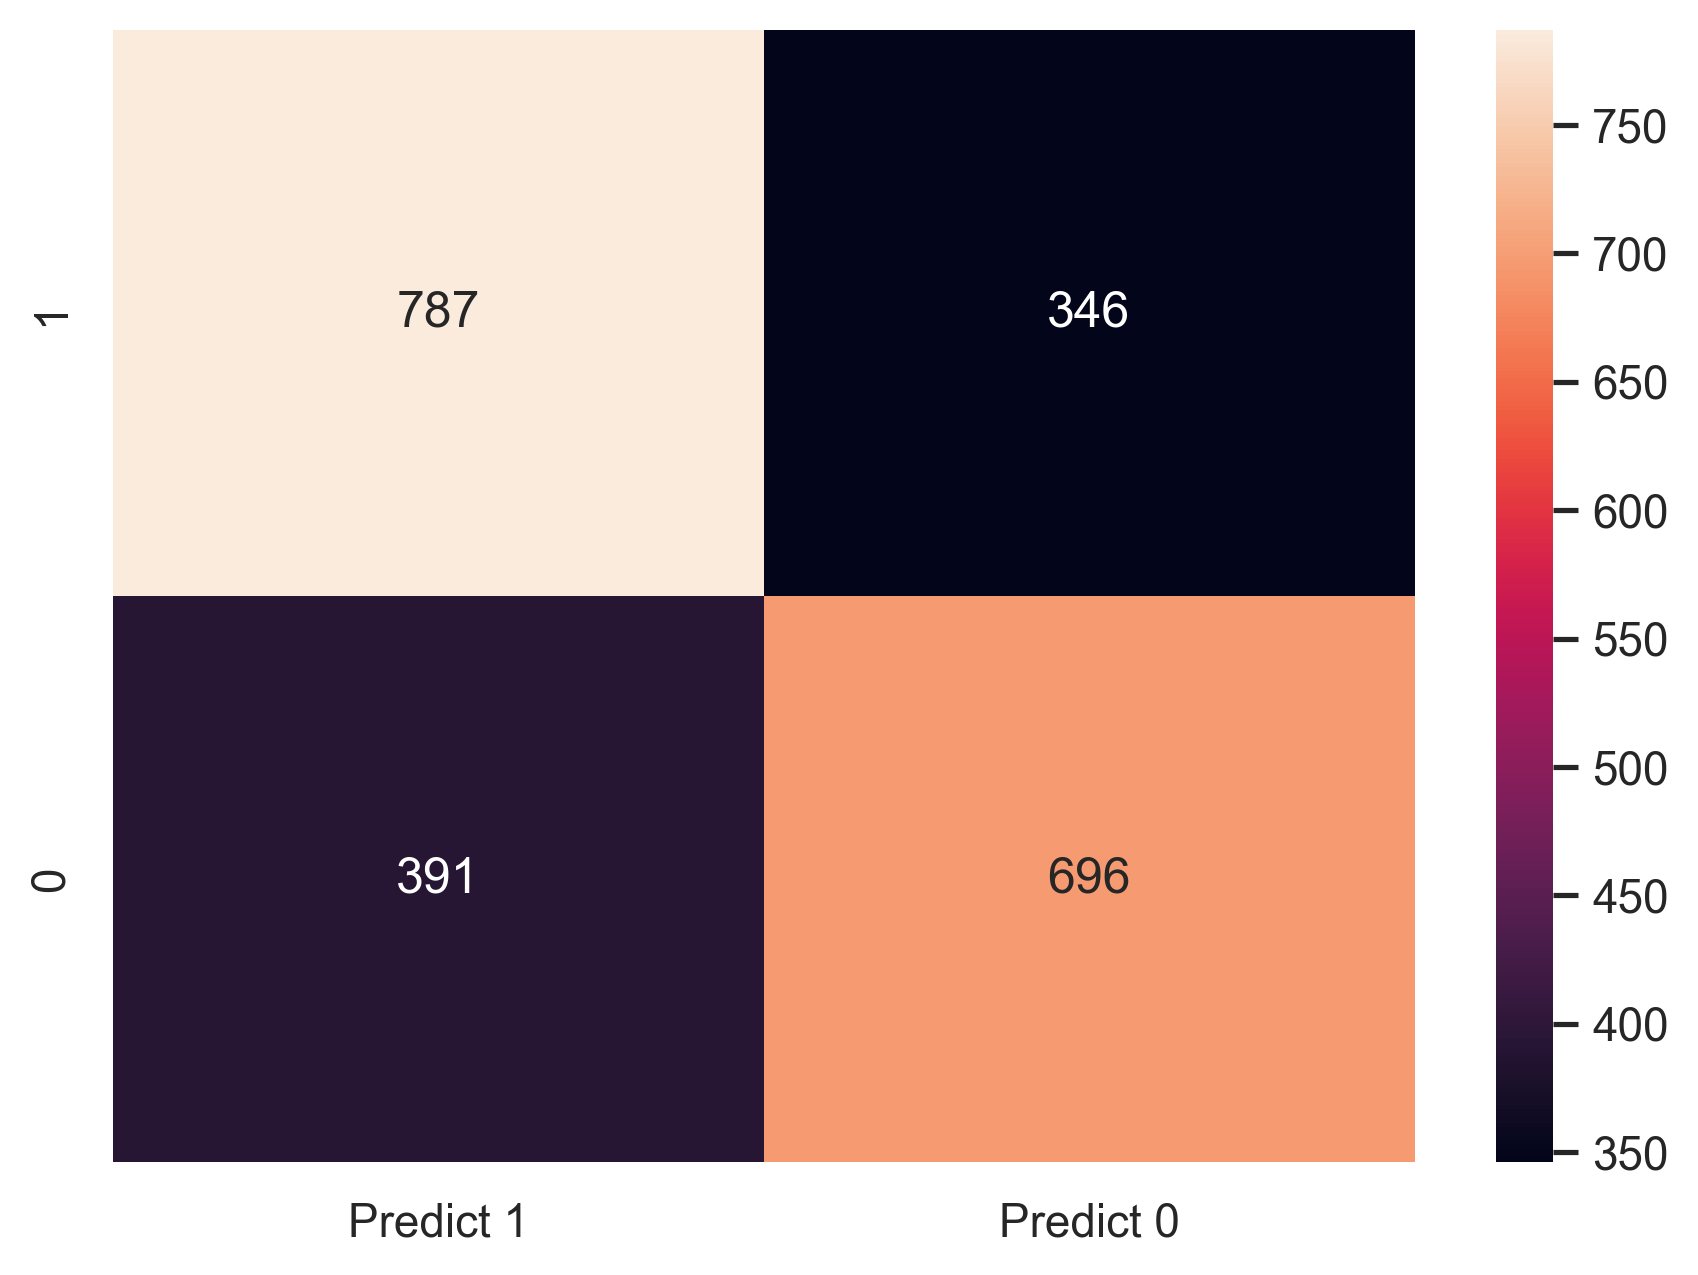

In [117]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Logistic regression model

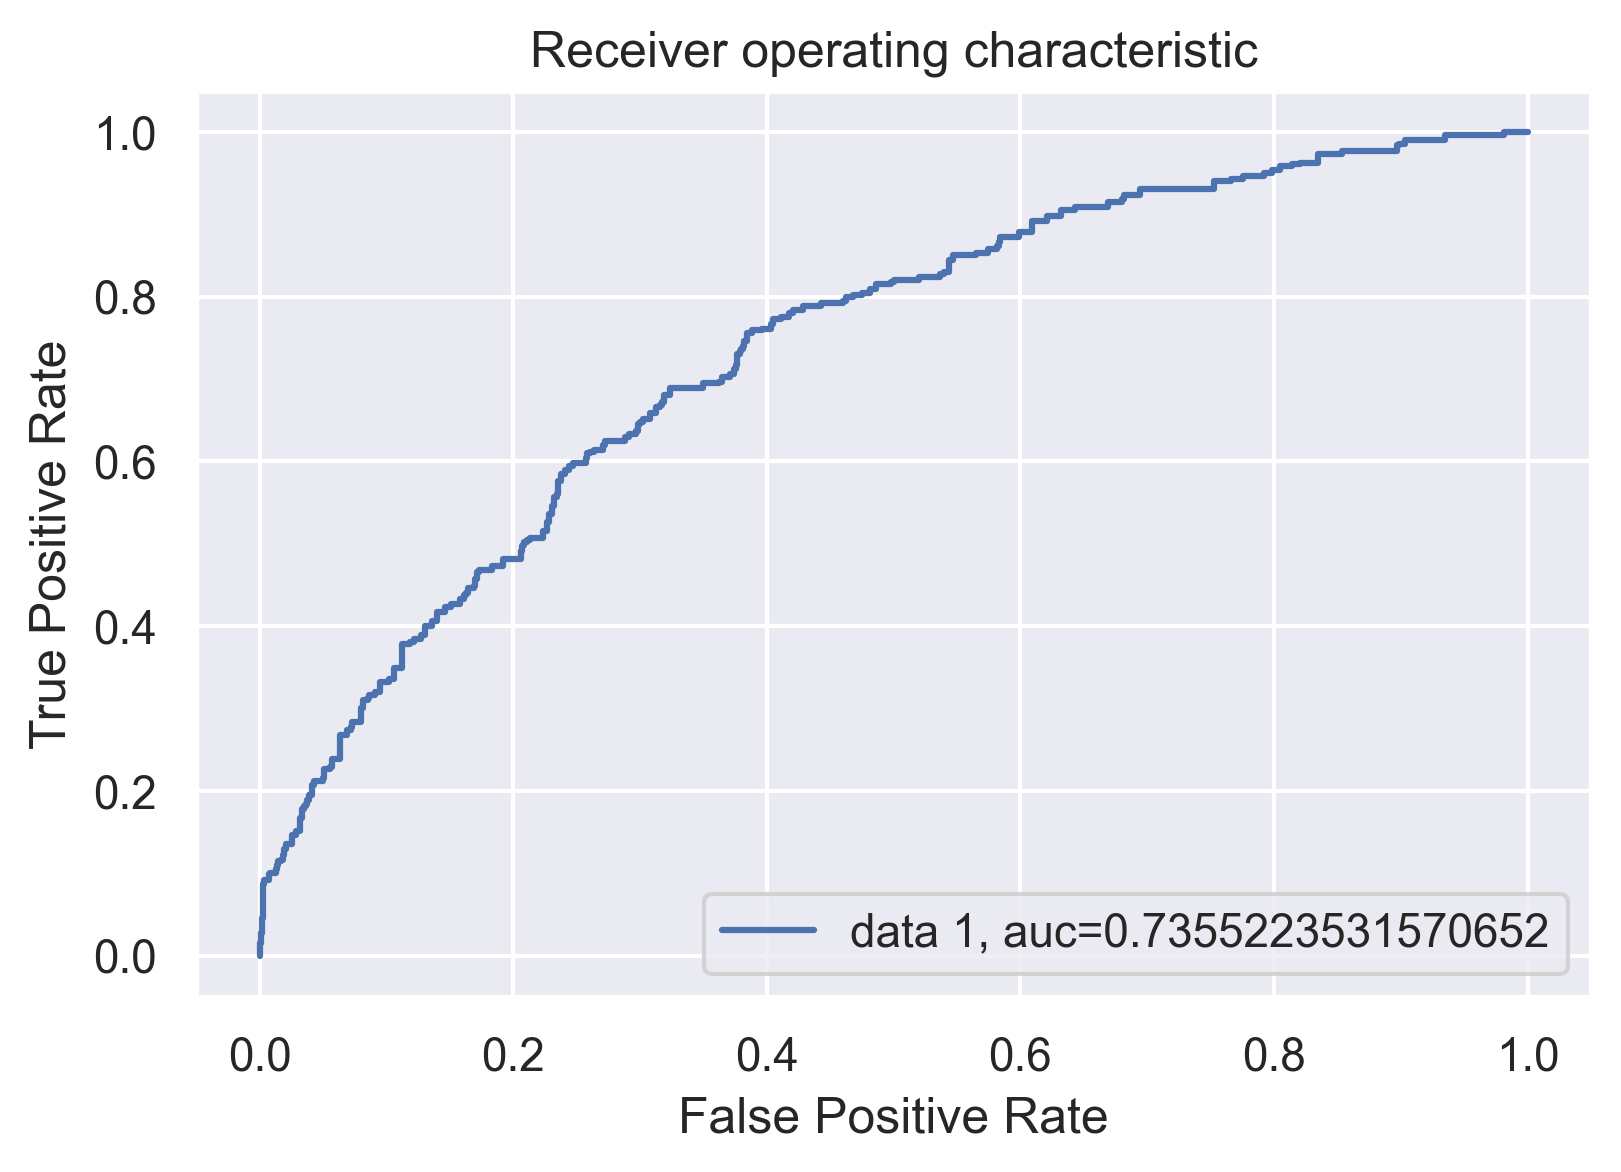

In [118]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [115]:
lr_auc = auc

# Decision Tree Classifier

In [ ]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [ ]:
dtree_grid_search(features, y_res)

In [119]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=14)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

print(classification_report(y_test, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1087
           1       0.94      1.00      0.97      1133

    accuracy                           0.97      2220
   macro avg       0.97      0.97      0.97      2220
weighted avg       0.97      0.97      0.97      2220

Accuracy: 0.9671171171171171
Precision: 0.939469320066335
Recall: 1.0


In [120]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.9903437620702974
0.9671171171171171


In [121]:
dt_tacc = dt.score(x_test,y_test)

## Confusion matrix of DecisionTree model

<AxesSubplot:>

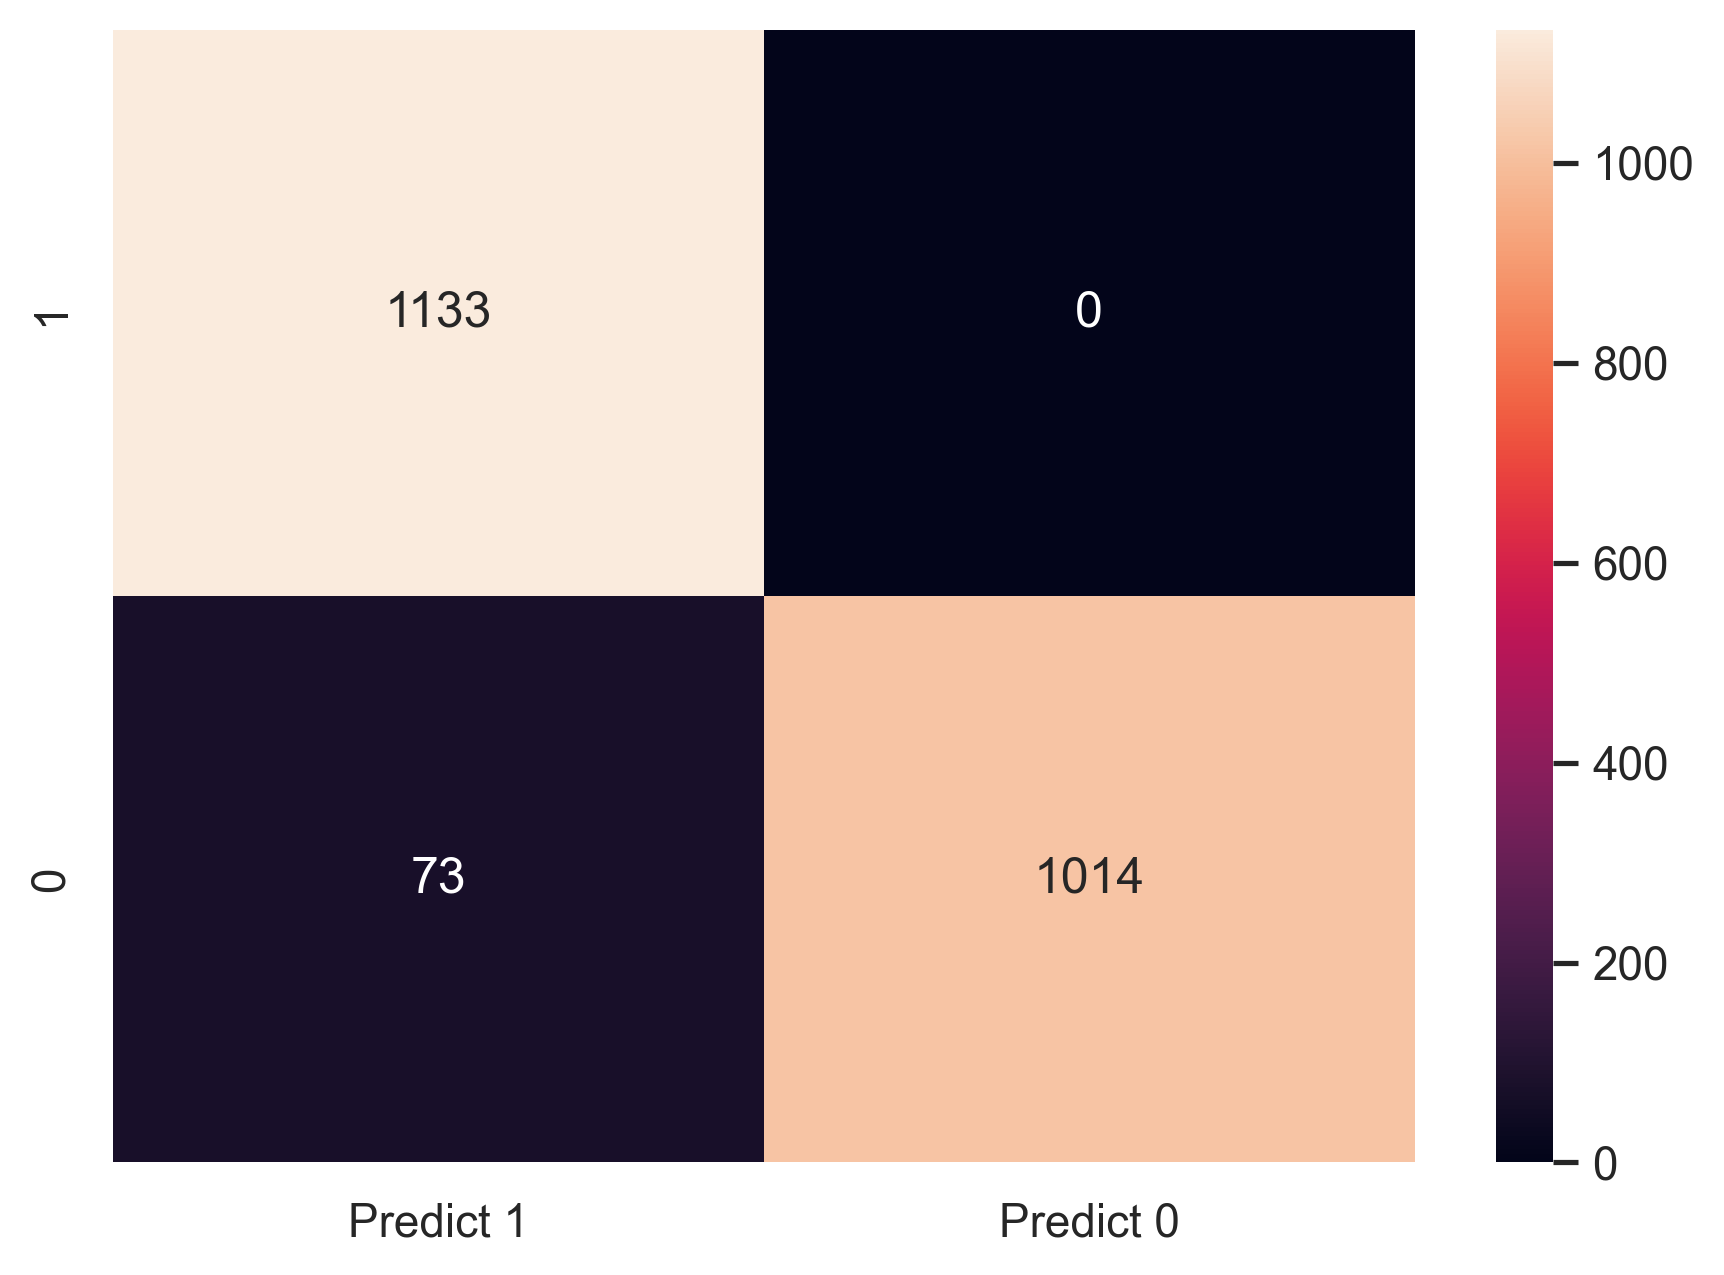

In [122]:
cm = metrics.confusion_matrix(y_test, y_pred1, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of DecisionTree model

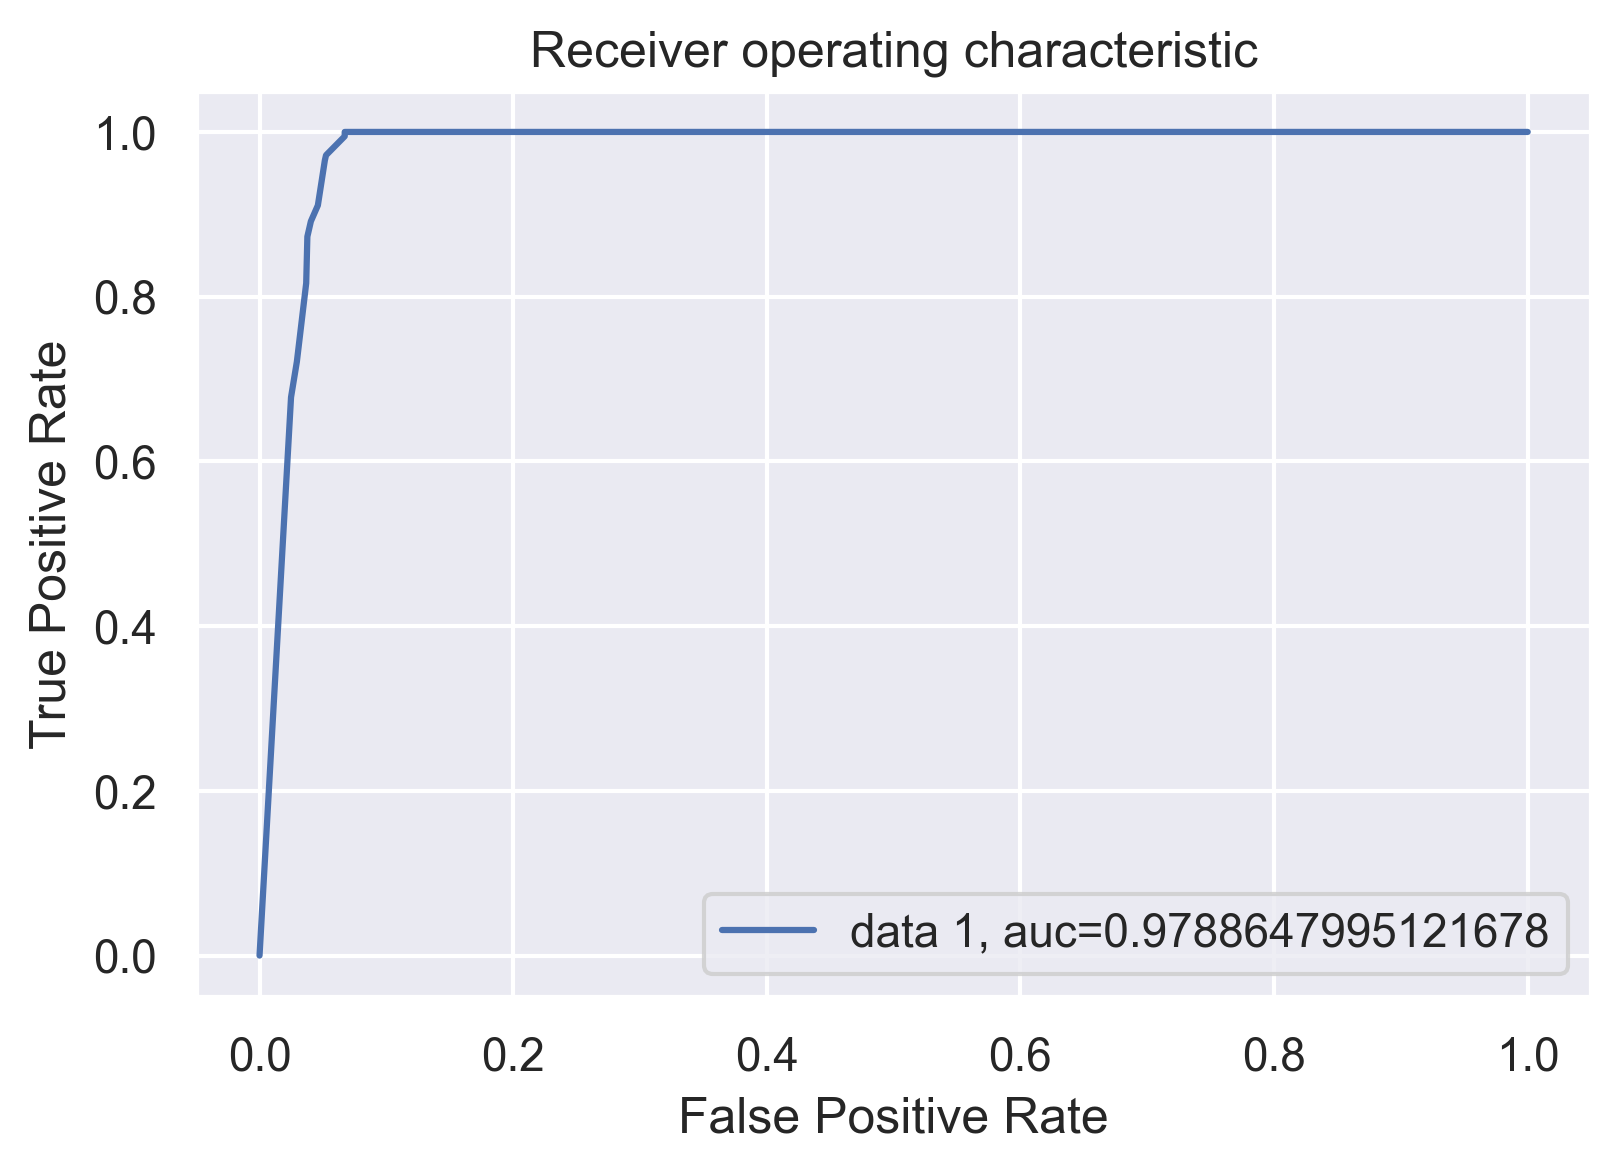

In [123]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [124]:
dt_auc = auc

# Ensemble learning - AdaBoosting

In [241]:
def ada_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'n_estimators':[10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # AdaBoost model
    ada = AdaBoostClassifier()
    
    # Use gridsearch to test all values
    ada_gscv = GridSearchCV(ada, param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
    #fit model to data
    grid_result = ada_gscv.fit(X, y)
    
    return grid_result.best_score_, ada_gscv.best_params_

In [242]:
ada_grid_search(features, y_res)

(0.7688557705201818, {'learning_rate': 1.0, 'n_estimators': 500})

In [125]:
abcl = AdaBoostClassifier(n_estimators=500, learning_rate=1.0)
abcl = abcl.fit(x_train, y_train)
y_pred4 = abcl.predict(x_test)

In [126]:
print(classification_report(y_test, y_pred4))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

print("\n")
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1087
           1       0.76      0.76      0.76      1133

    accuracy                           0.76      2220
   macro avg       0.76      0.76      0.76      2220
weighted avg       0.76      0.76      0.76      2220

Accuracy: 0.7572072072072072
Precision: 0.7628318584070797
Recall: 0.7608120035304501


0.7753959057551179
0.7572072072072072


In [127]:
ada_tacc = abcl.score(x_test,y_test)

## Confusion Matrix AdaBoosting model

<AxesSubplot:>

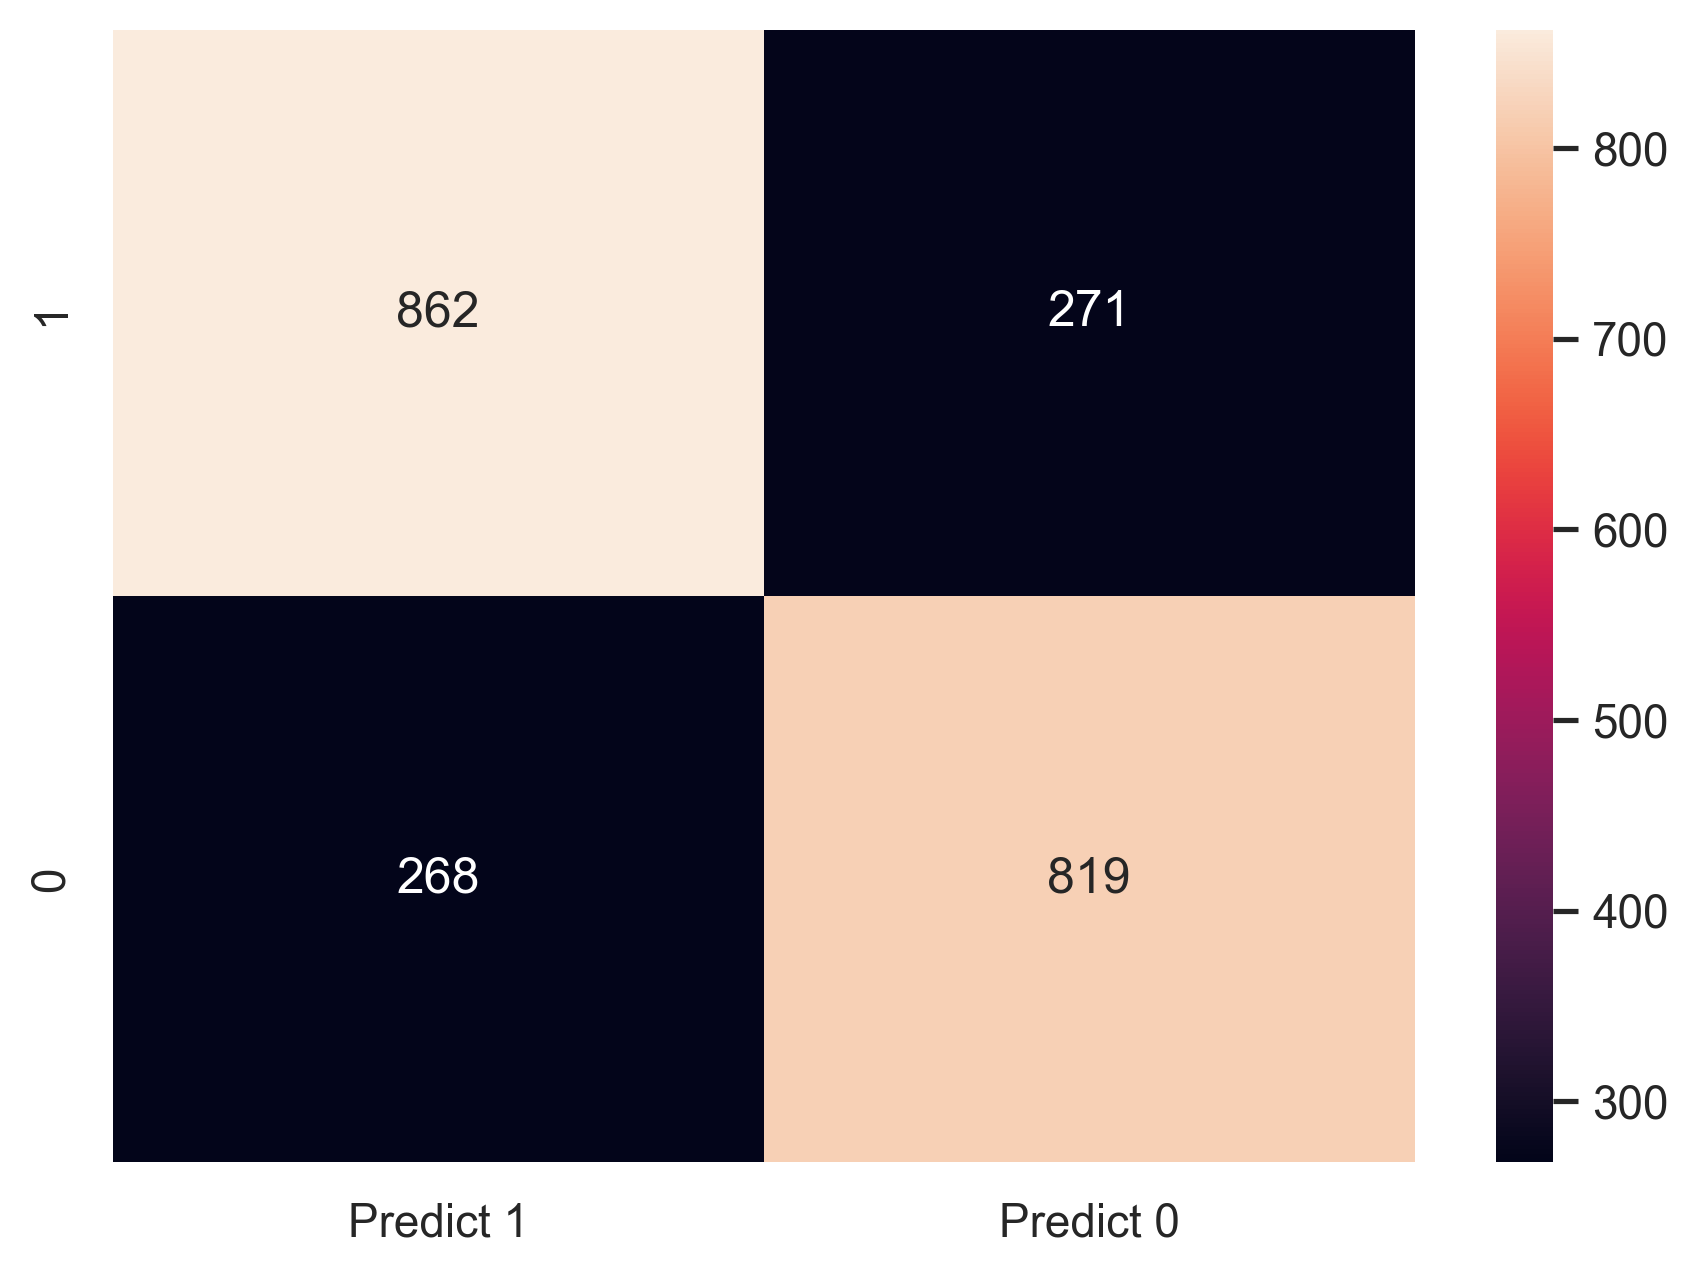

In [128]:
cm = metrics.confusion_matrix(y_test, y_pred4, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Adaboosting model

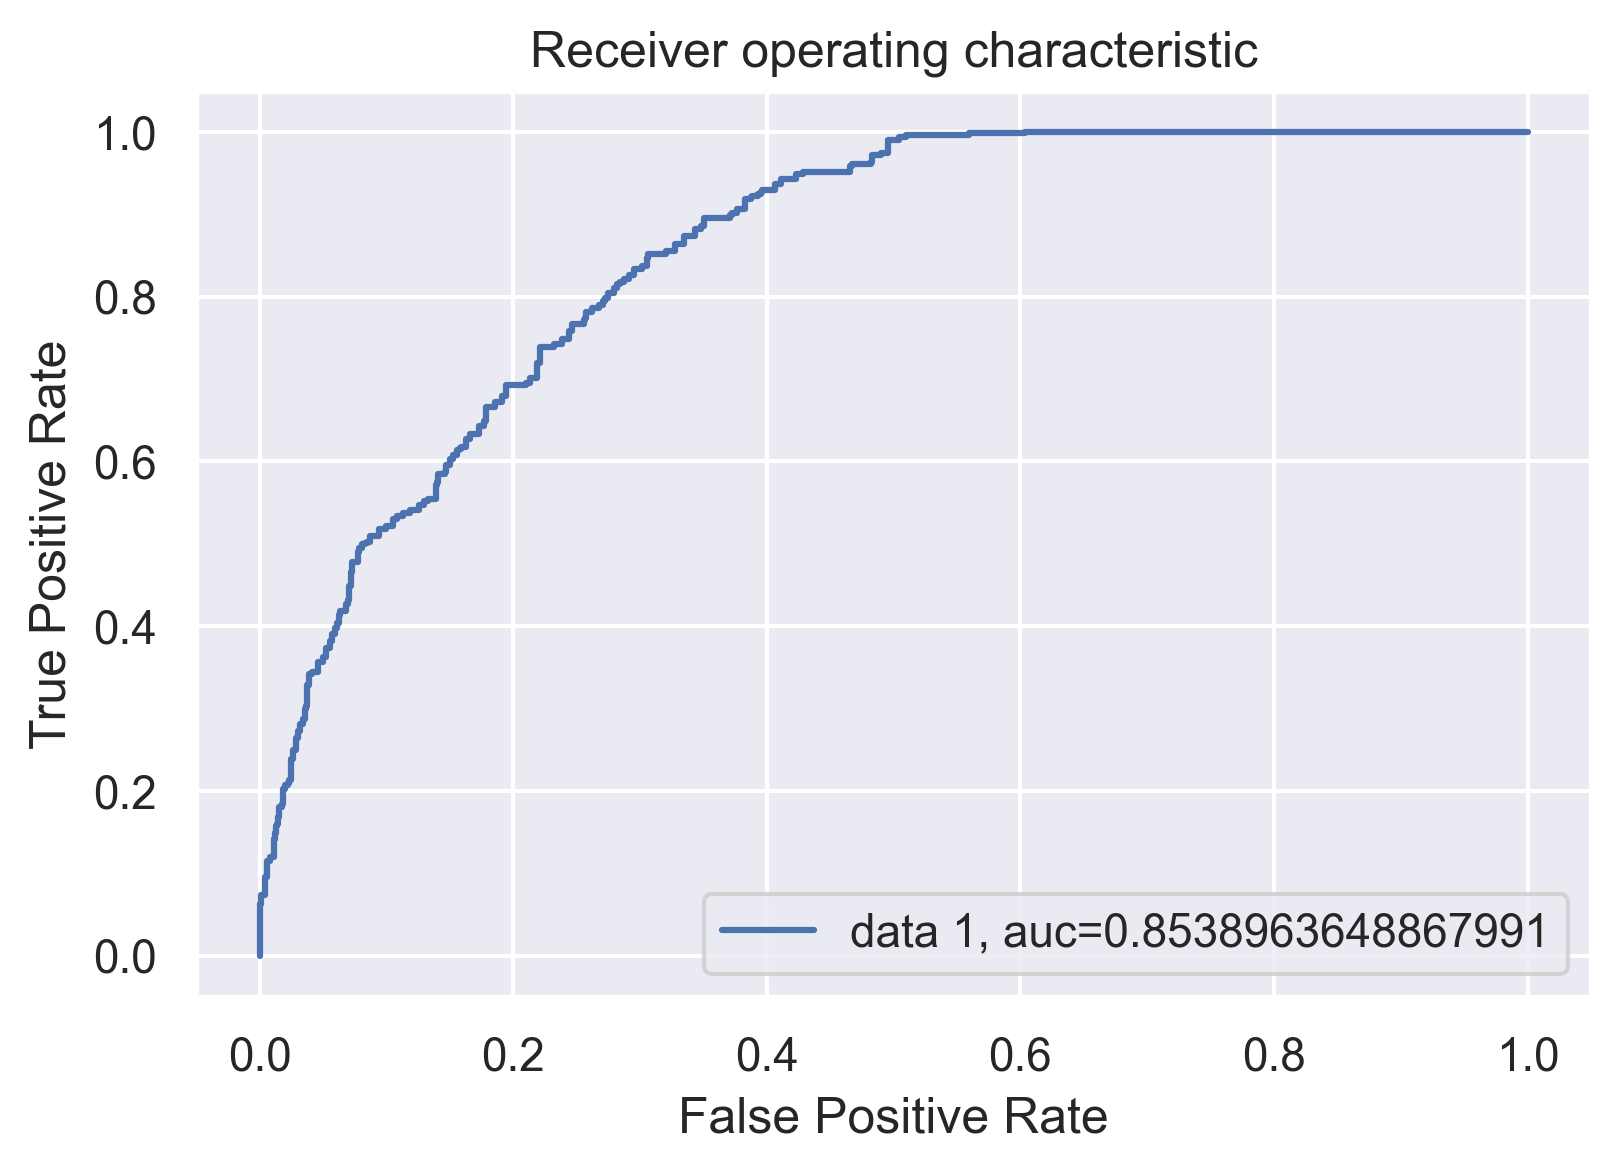

In [154]:
y_pred_proba = abcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [155]:
ada_auc = auc

# Random forest classifier

In [286]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [287]:
rf_grid_search(x_train, y_train)

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [130]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=8, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_test, y_pred2))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1087
           1       0.95      0.92      0.94      1133

    accuracy                           0.94      2220
   macro avg       0.94      0.94      0.94      2220
weighted avg       0.94      0.94      0.94      2220

Accuracy: 0.9351351351351351
Precision: 0.95077484047402
Recall: 0.9205648720211828


In [131]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

0.9472769409038239
0.9351351351351351


In [132]:
rf_tacc = rf.score(x_test,y_test)

## Confusion matrix of Random forest classifier model

<AxesSubplot:>

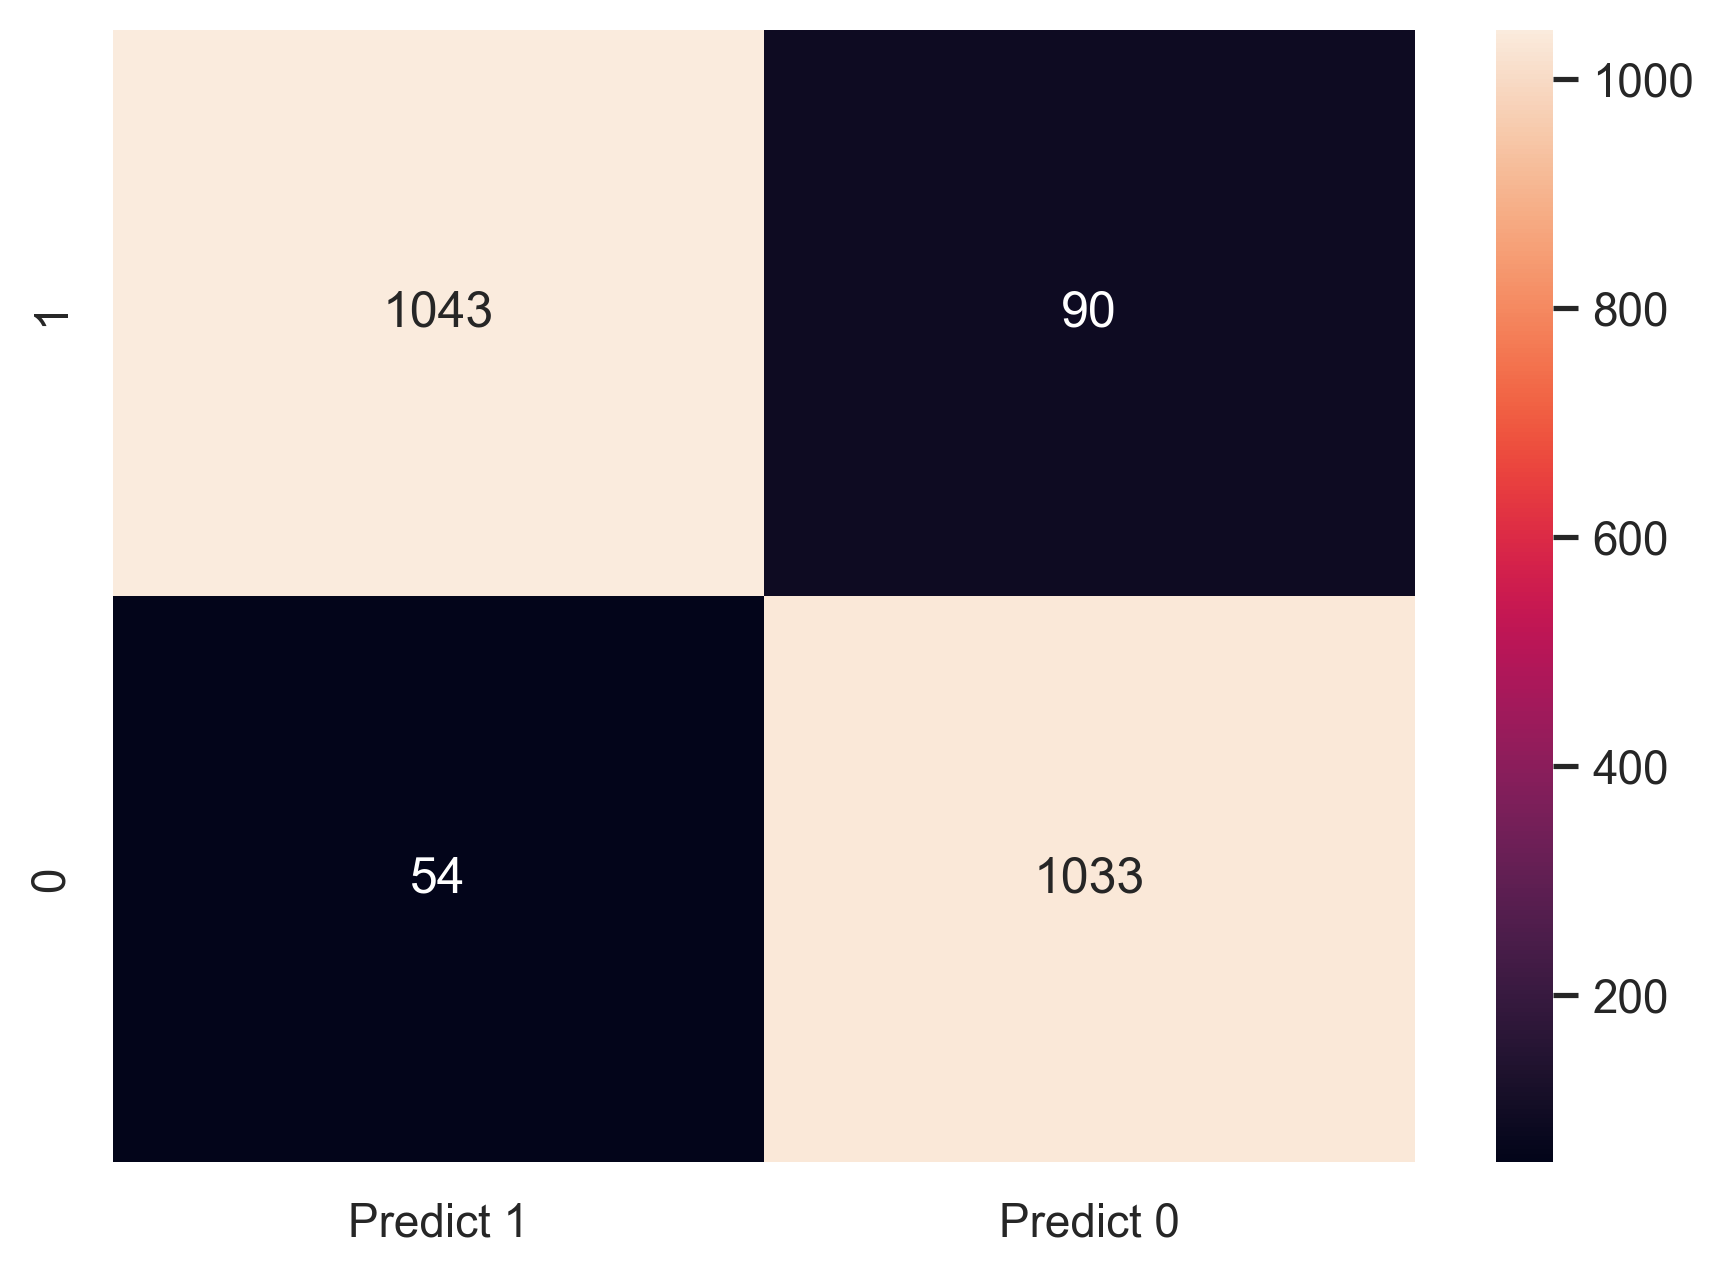

In [133]:
cm = metrics.confusion_matrix(y_test, y_pred2, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Random forest classifier model

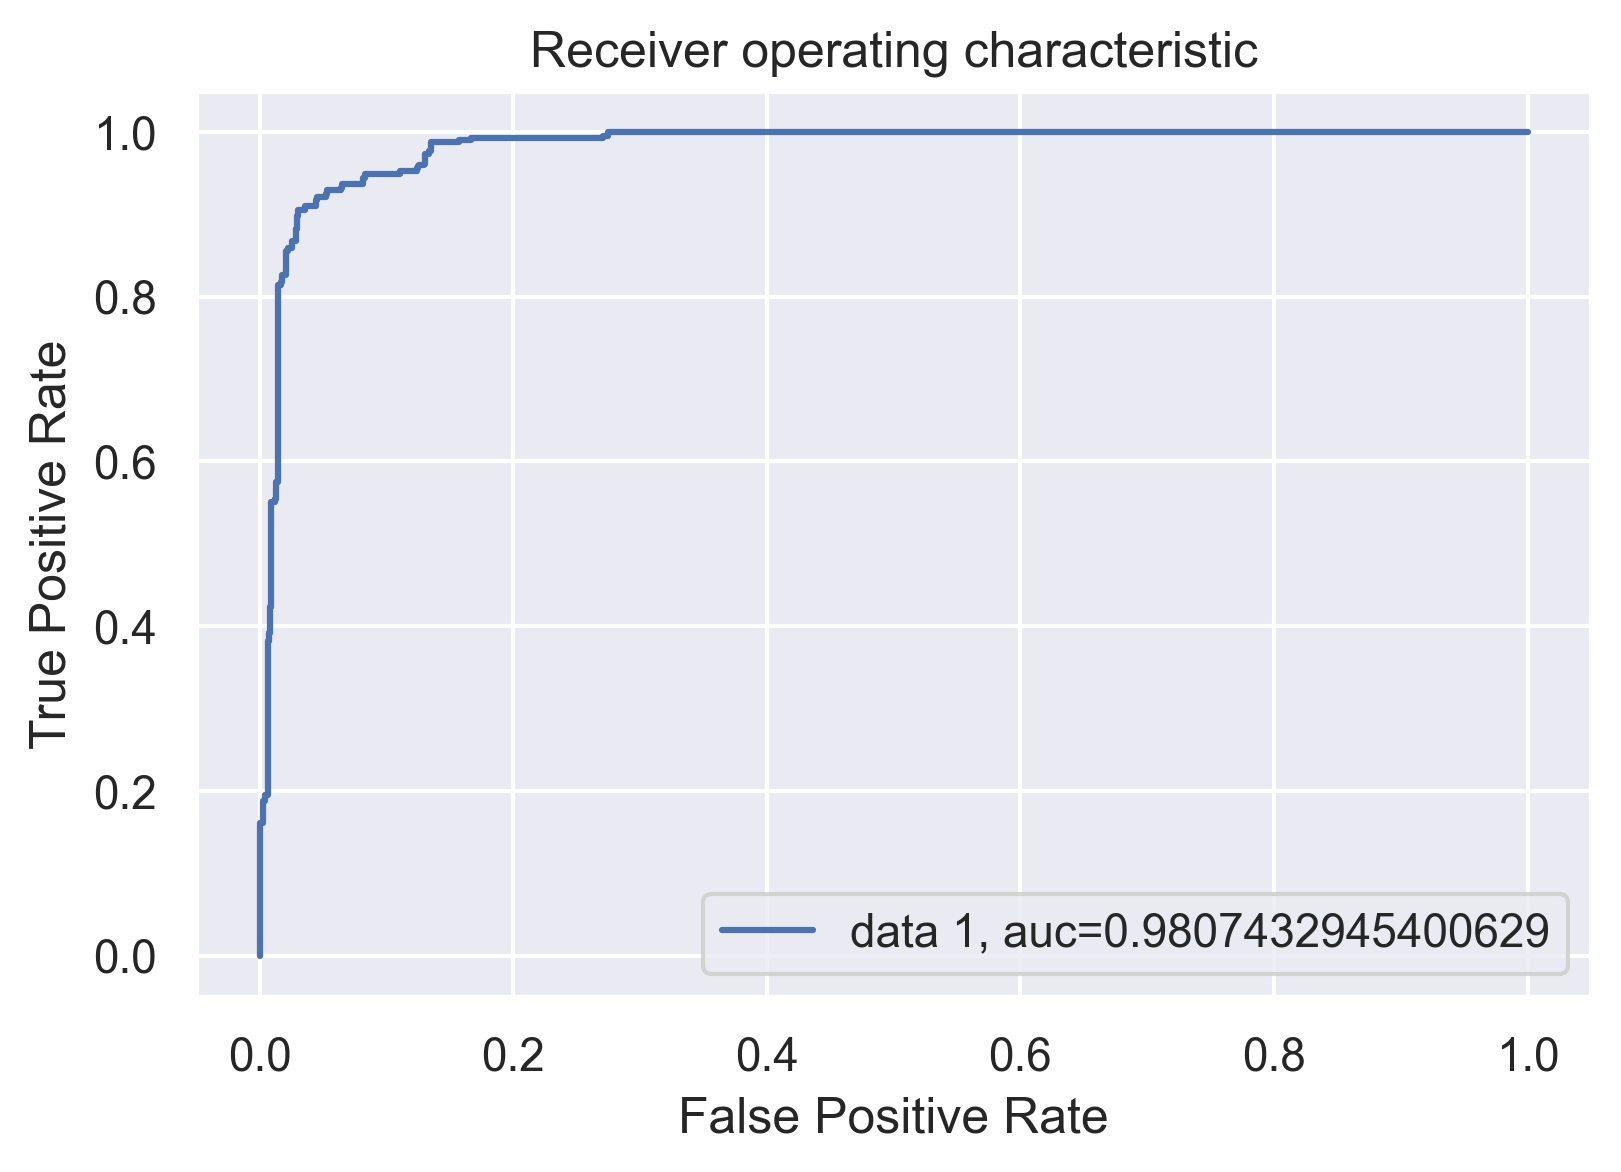

In [156]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [157]:
rf_auc = auc

## Lets compare Decision Tree and Random forest model AUC

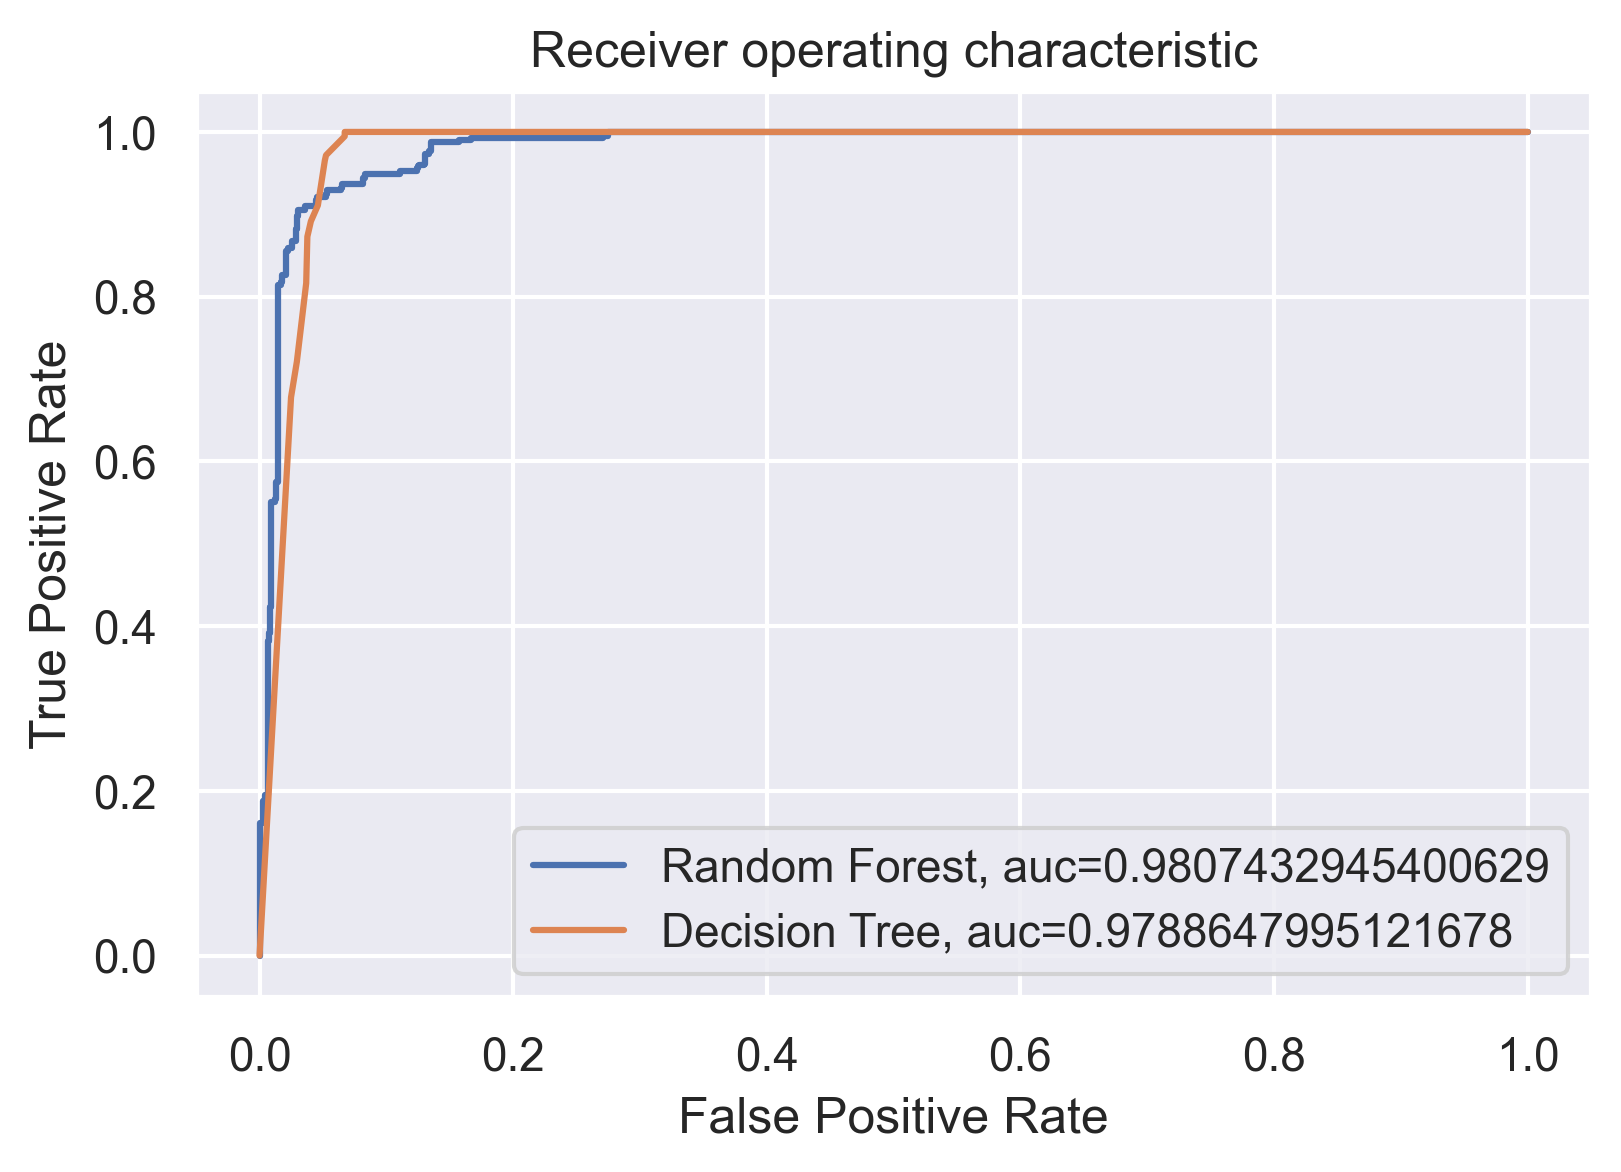

In [136]:
y_pred_proba1 = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

b_y_pred_proba2 = dt.predict_proba(x_test)[::,1]
b_fpr, b_tpr, _ = metrics.roc_curve(y_test, b_y_pred_proba2)

auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc1
auc2 = metrics.roc_auc_score(y_test, b_y_pred_proba2)
auc2

plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc1))
plt.plot(b_fpr,b_tpr,label="Decision Tree, auc="+str(auc2))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## KNN

In [264]:
def knn_grid_search(X, y):
    #create a dictionary of all values we want to test
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    knn = KNeighborsClassifier()
    
    #use gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    #fit model to data
    knn_gscv.fit(X, y)
    
    return knn_gscv.best_params_

In [266]:
knn_grid_search(features, y_res)

{'n_neighbors': 1}

In [269]:
knn_grid_search(x_train, y_train)

{'n_neighbors': 1}

In [137]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

1.0
0.9887387387387387


In [138]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1087
           1       0.98      1.00      0.99      1133

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220



In [139]:
knn_tacc = knn.score(x_test, y_test)

<AxesSubplot:>

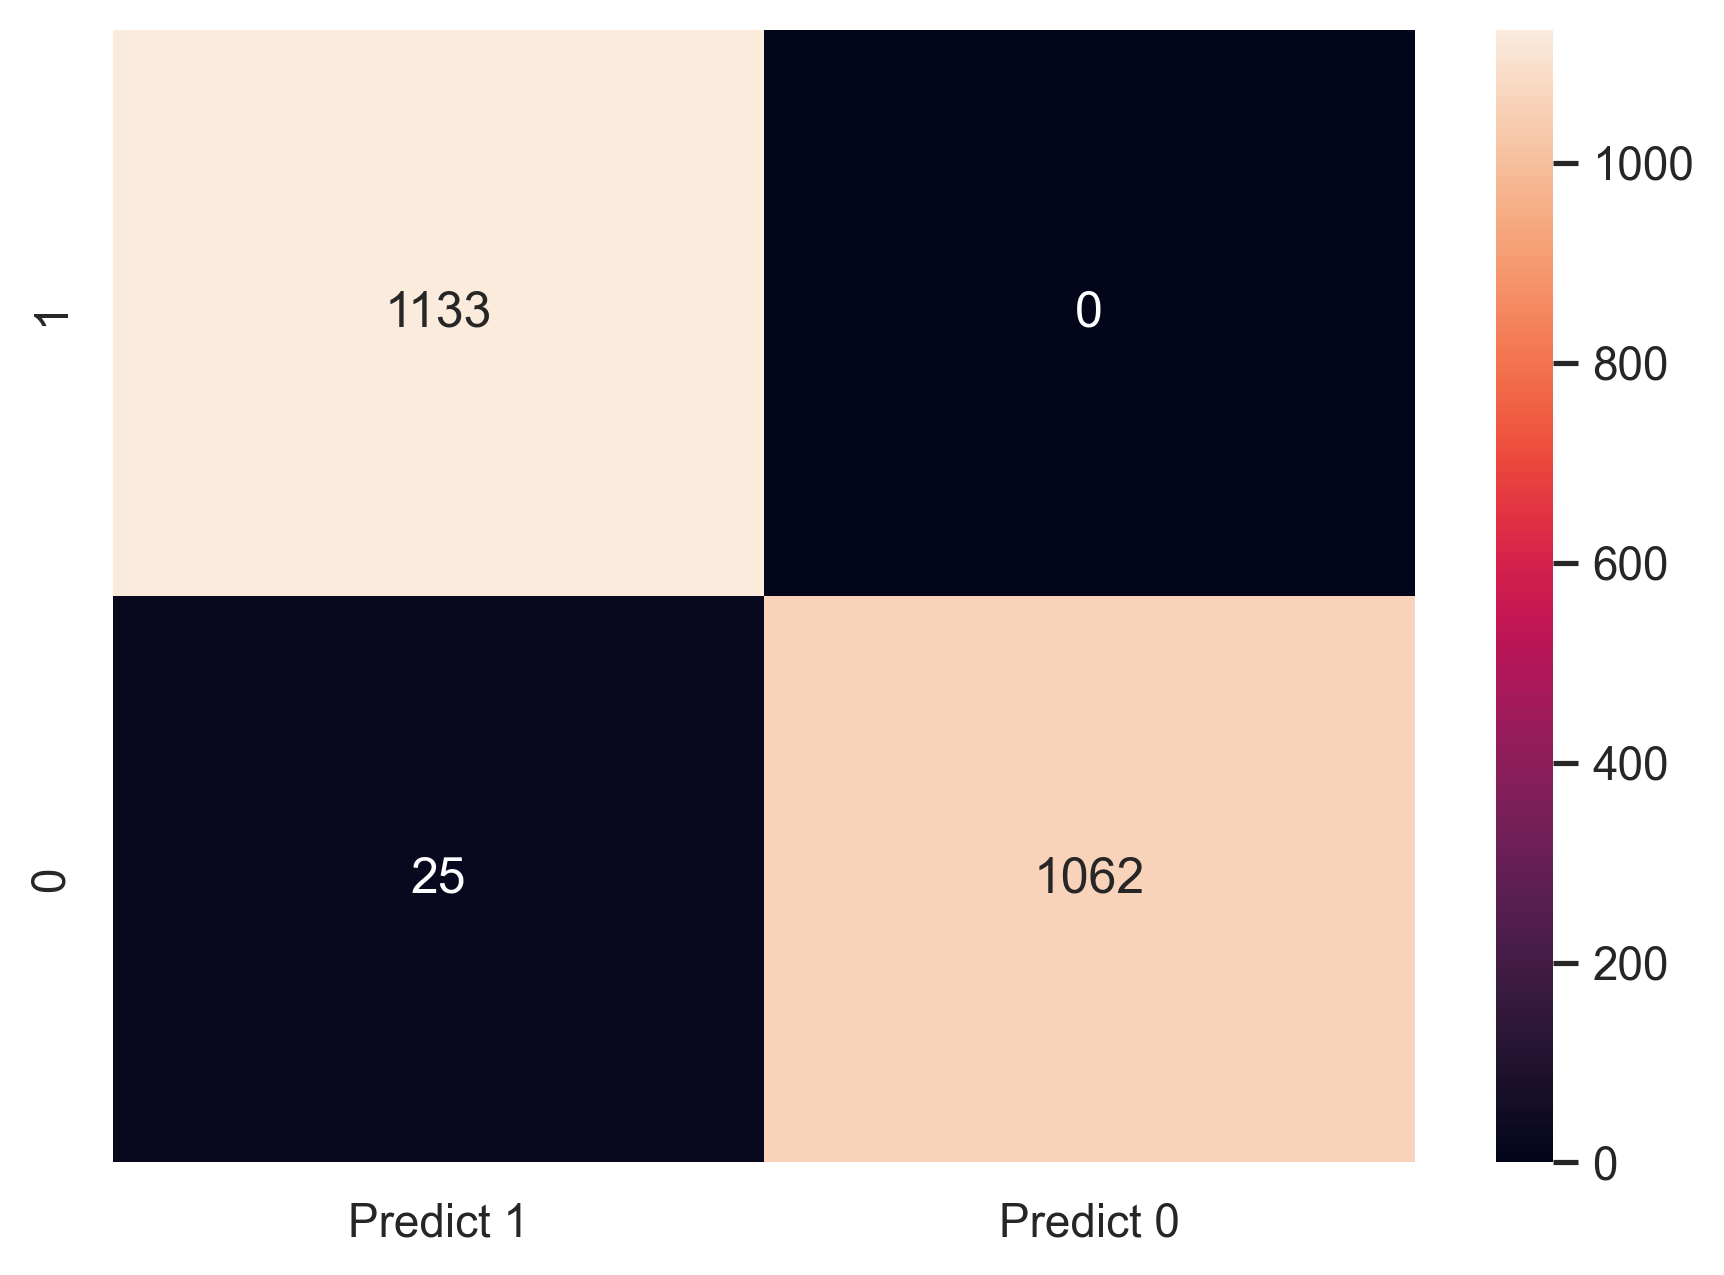

In [140]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

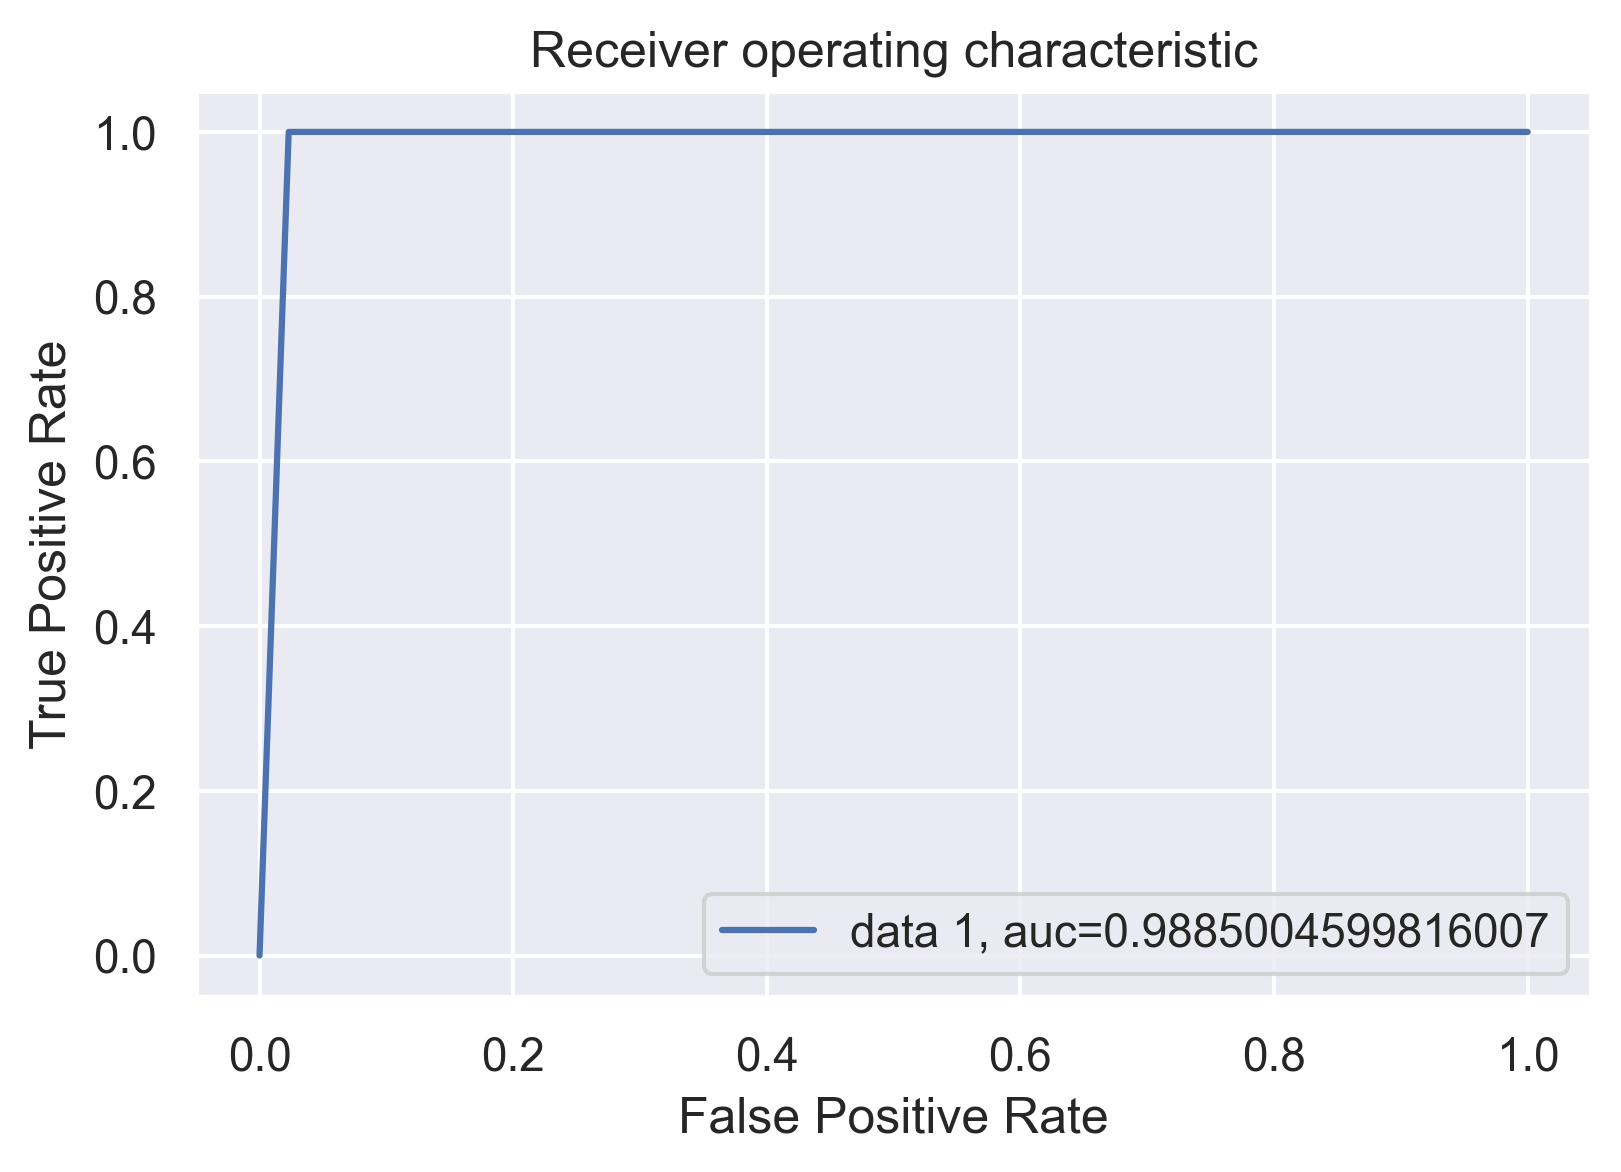

In [158]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [159]:
knn_auc = auc

# SVM

In [275]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = GridSearchCV(estimator = svm,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [277]:
svm_grid_search(x_train, y_train)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [166]:
svm = SVC(gamma=1, C=1, kernel='rbf', probability=True)

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

1.0
0.9990990990990991


In [167]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1087
           1       1.00      1.00      1.00      1133

    accuracy                           1.00      2220
   macro avg       1.00      1.00      1.00      2220
weighted avg       1.00      1.00      1.00      2220



In [168]:
svm_tacc = svm.score(x_test, y_test)

<AxesSubplot:>

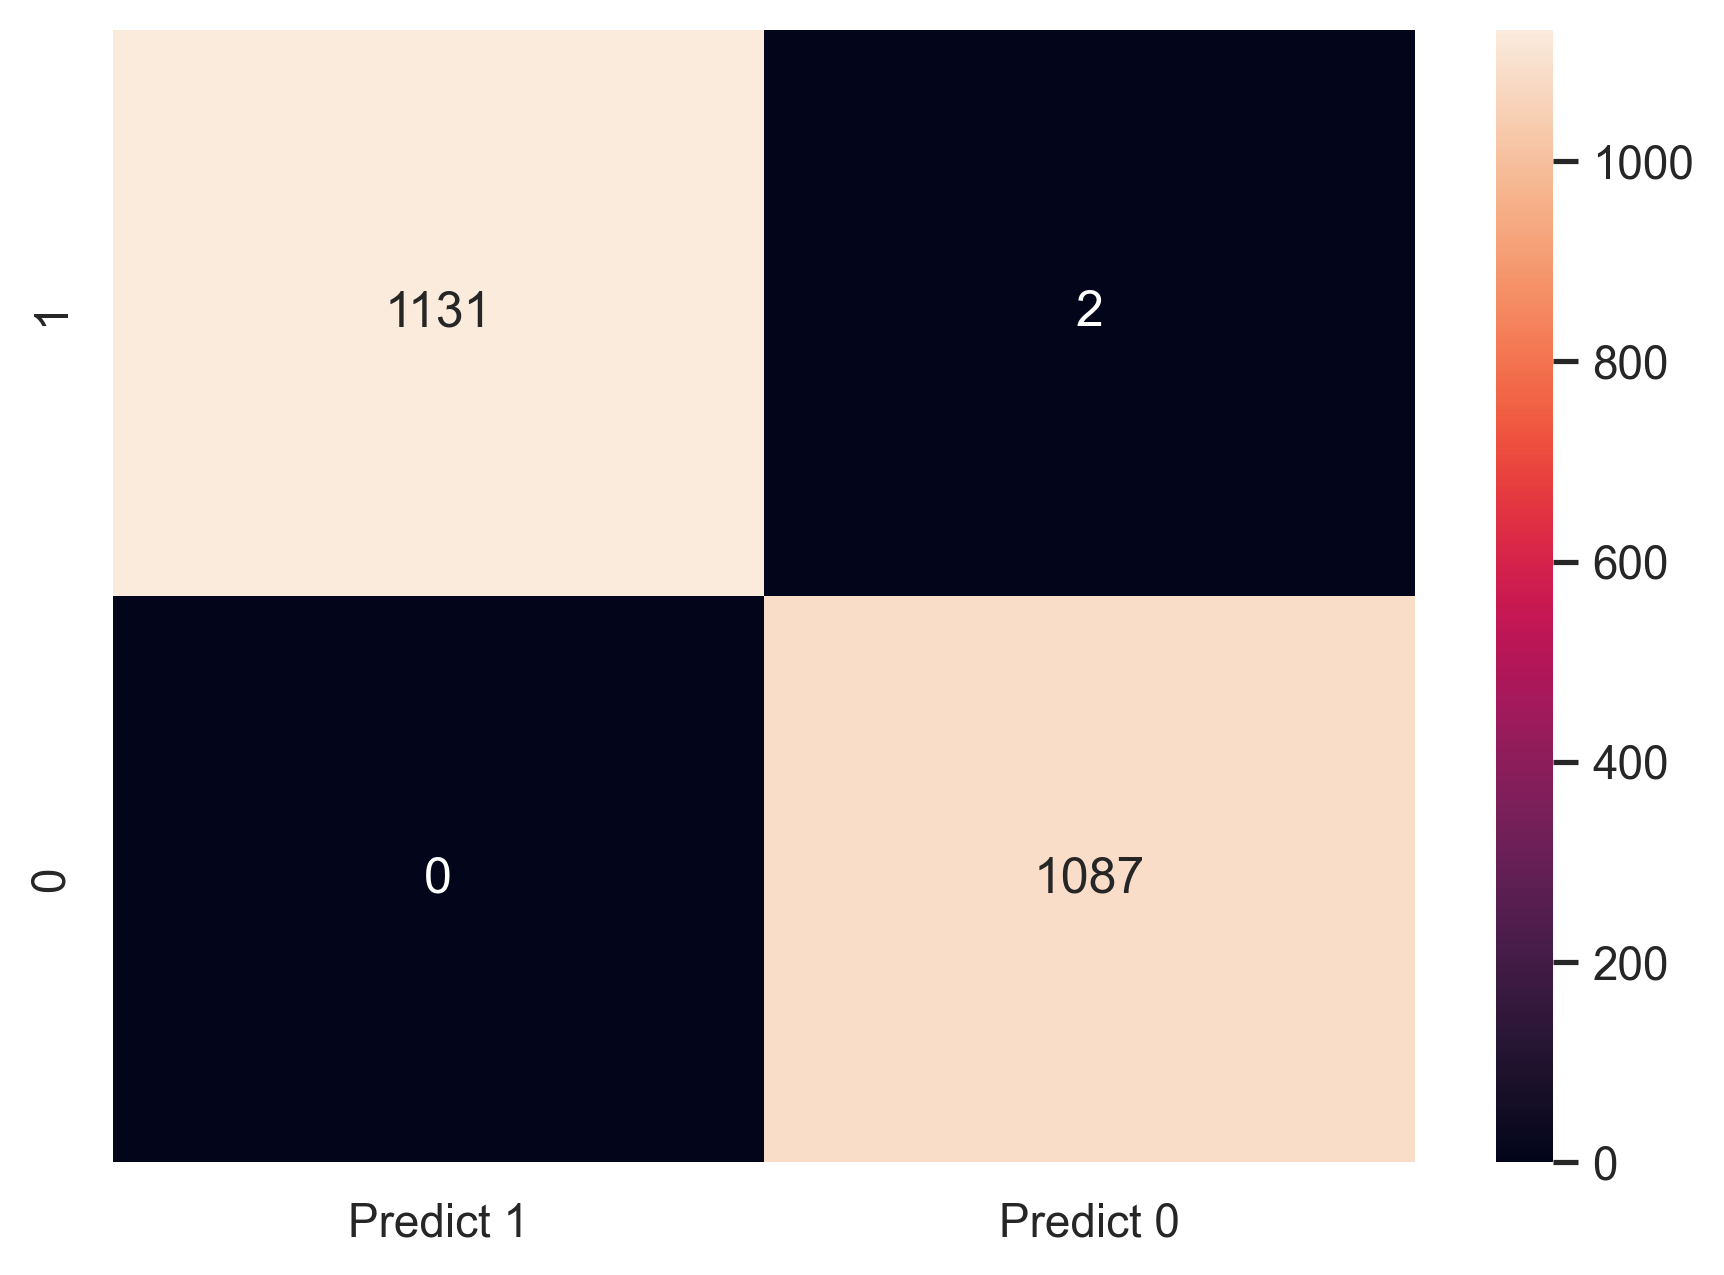

In [169]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

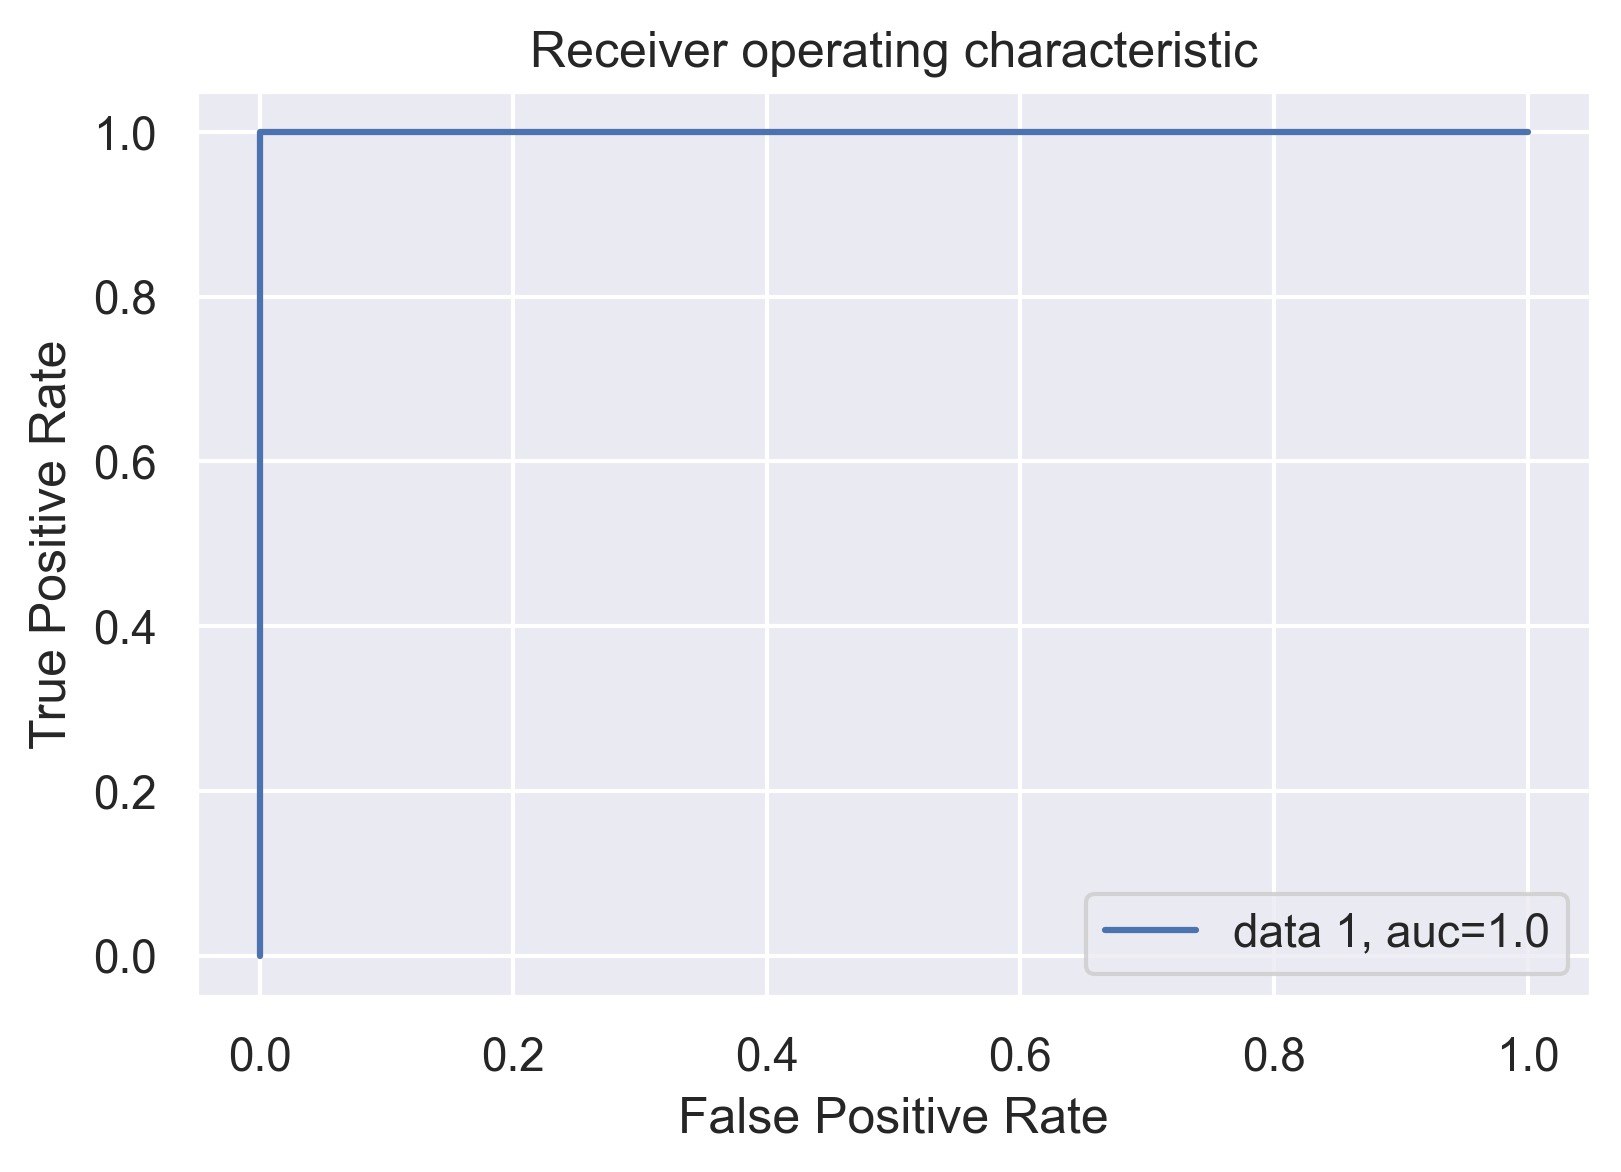

In [170]:
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [171]:
svm_auc = auc

## XGBoost Classifier

In [96]:
def xgb_grid_search(X, y):
    # Create a dictionary of all values we want to test
    param_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    xgb = XGBClassifier()
    
    #use gridsearch to test all values
    xgb_gscv =  RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    xgb_gscv.fit(X, y)
    
    return xgb_gscv.best_params_

In [97]:
xgb_grid_search(features, y_res)

[10:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [93]:
xgb_grid_search(features, y_res)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[10:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [148]:
xgb = XGBClassifier(min_child_weight=3, max_depth=10, learning_rate=0.15, gamma=0.4, colsample_bytree=0.5)
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)

print(classification_report(y_test, y_pred_xgb))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall:",metrics.recall_score(y_test, y_pred_xgb))

print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

[17:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1087
           1       0.98      1.00      0.99      1133

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220

Accuracy: 0.9891891891891892
Precision: 0.9809193408499567
Recall: 0.9982347749338041
0.9996137504828119
0.9891891891891892


In [149]:
xgb_tacc = xgb.score(x_test,y_test)

<AxesSubplot:>

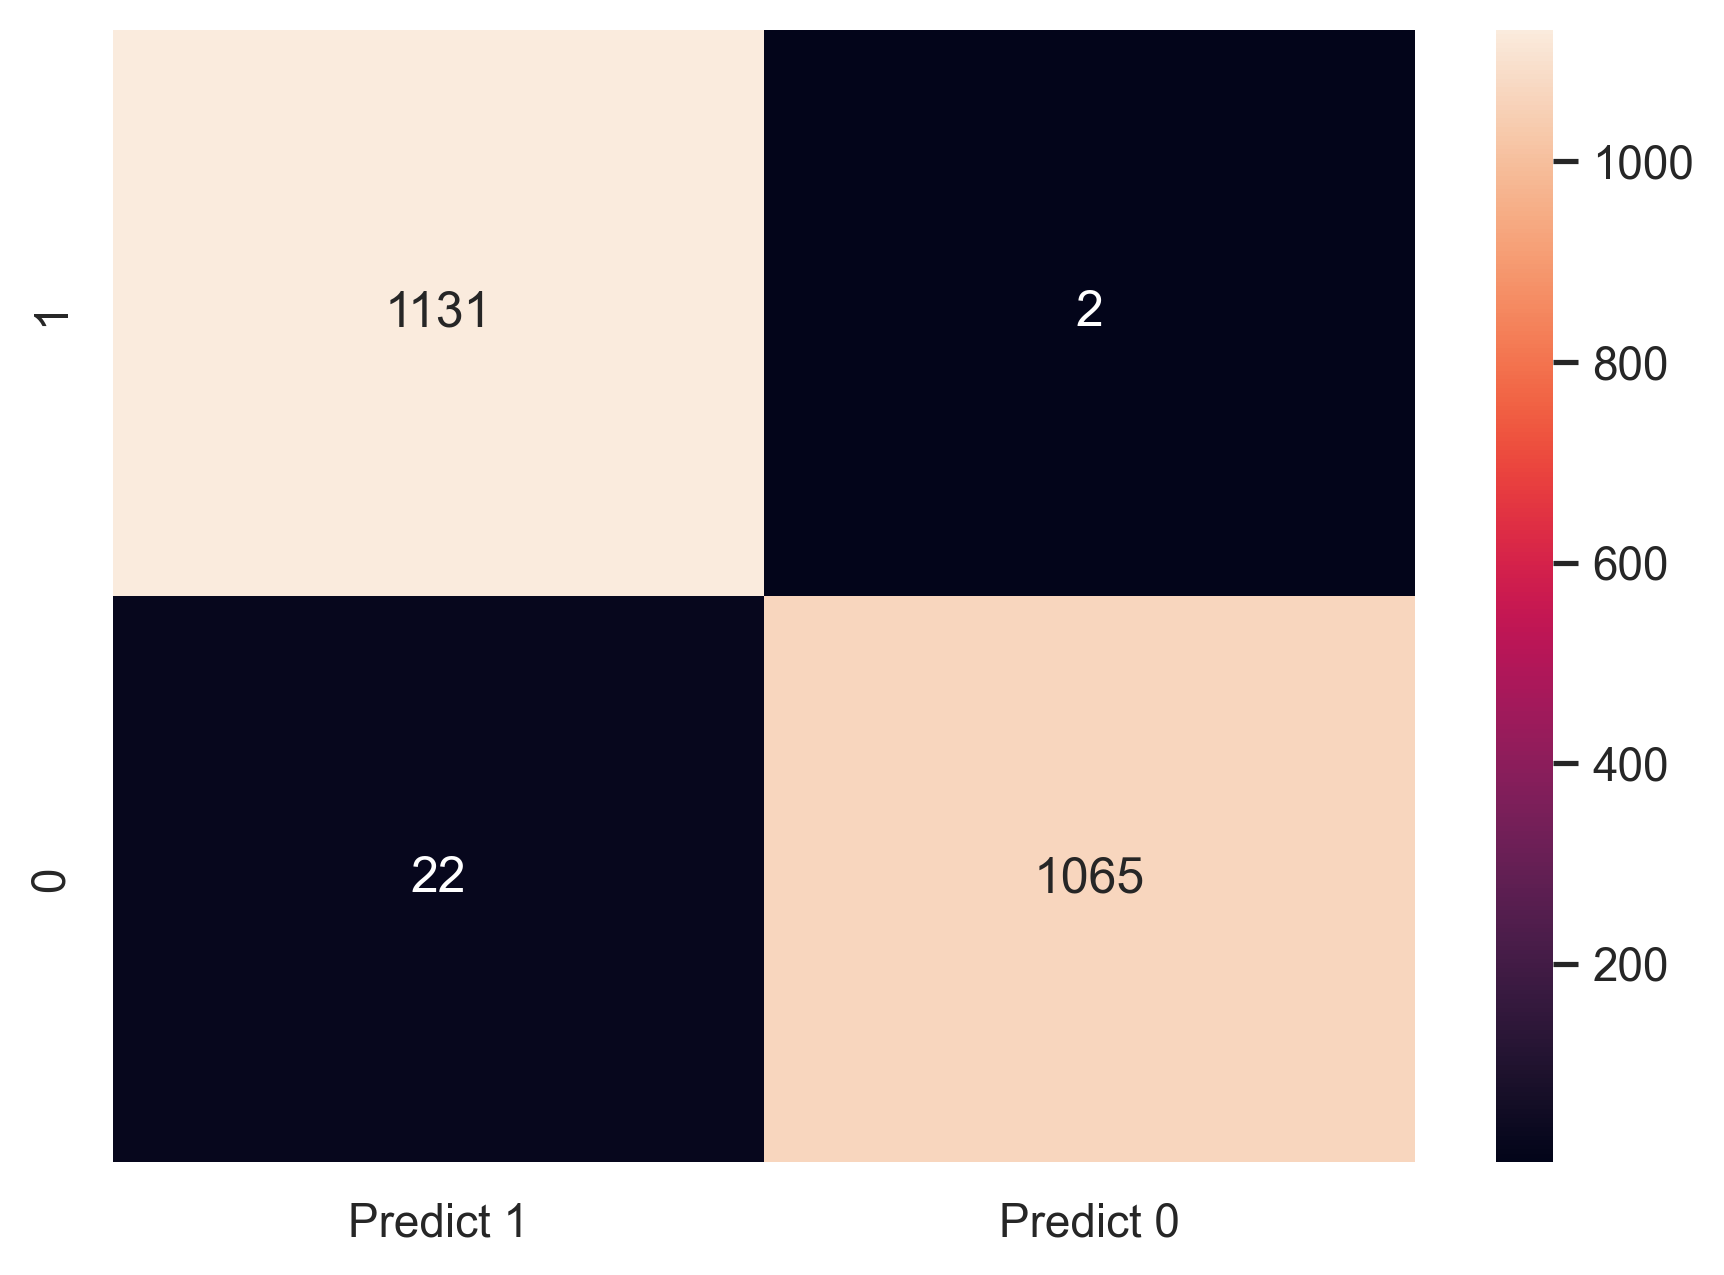

In [150]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

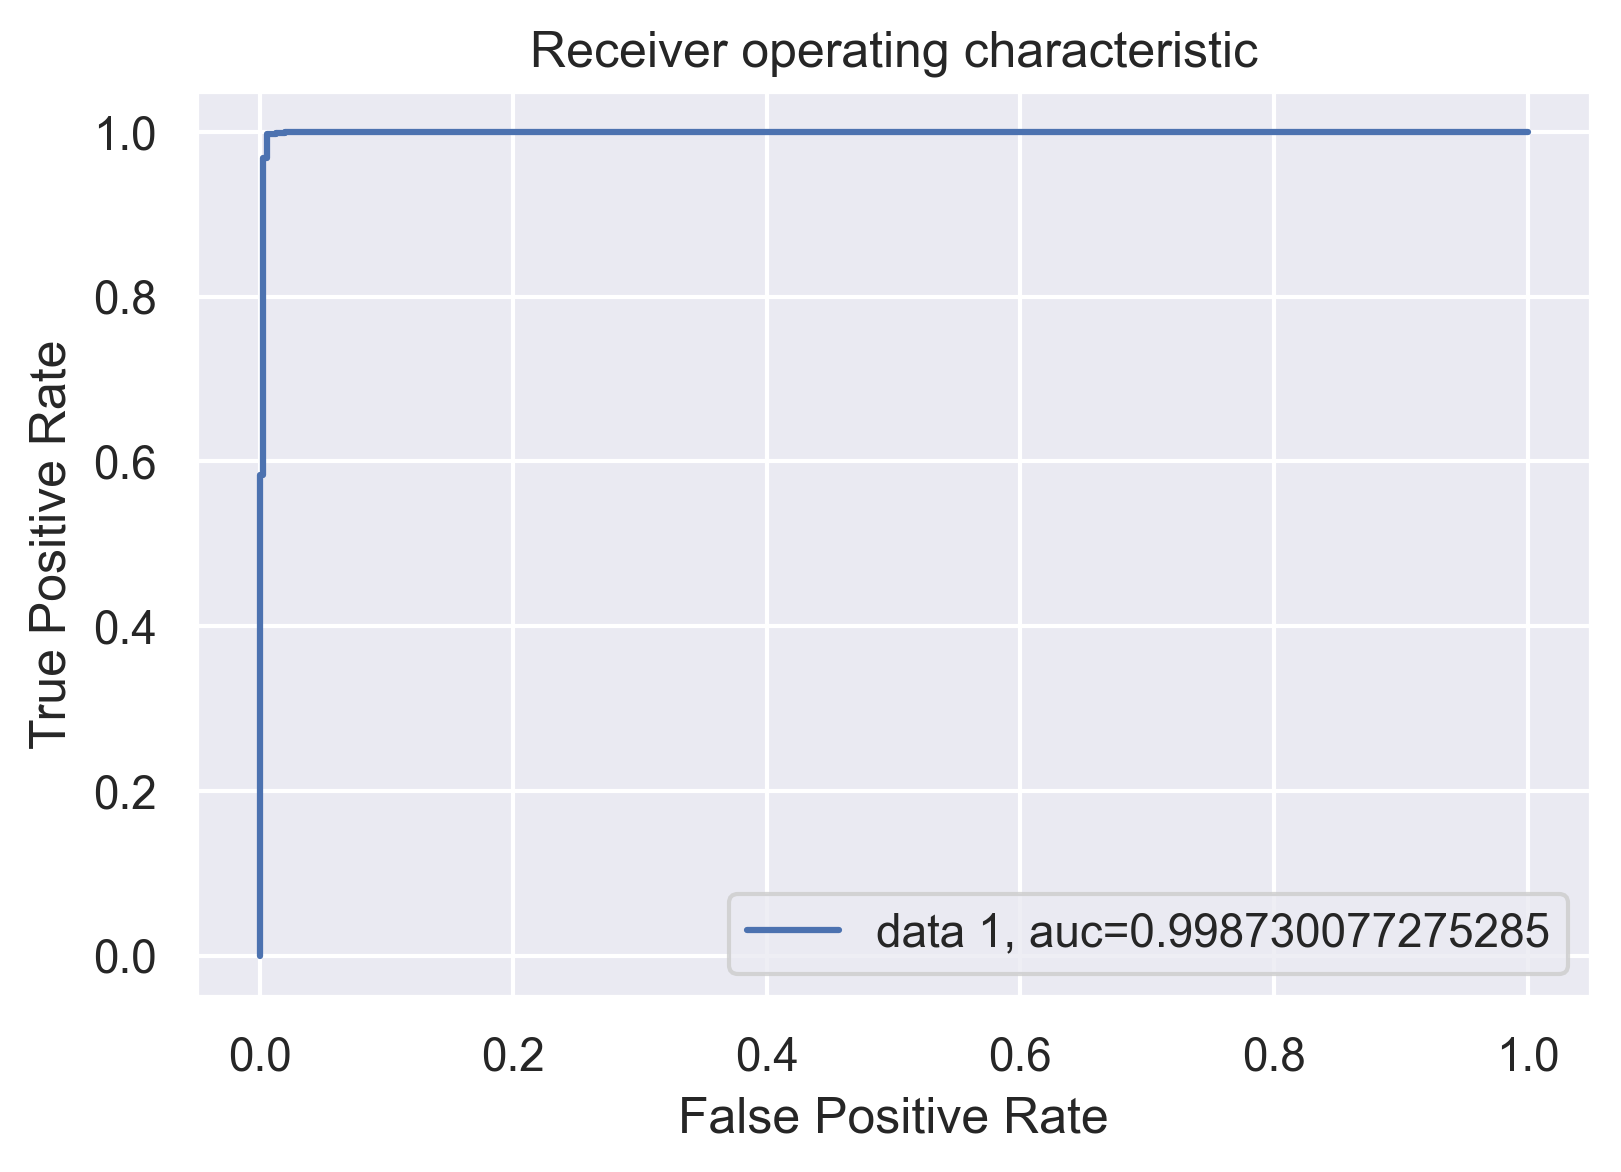

In [162]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [163]:
xgb_auc = auc

# Comparision of each Model

In [164]:
def comp_model(model_list, model_acc_list, model_auc_list):
    data = {"Model Name": model_list, "Accuracy(%)": [i*100 for i in model_acc_list], "AUC Score": model_auc_list}
    Comparision = pd.DataFrame(data)
    return Comparision

In [165]:
model_list = ["Logistic Regression", "Decision Tree Classifier", "AdaBoost", "Random Forest Classifier", "kNN", "SVM", "XGBoost"]
model_acc_list = [lr_tacc, dt_tacc, ada_tacc, rf_tacc, knn_tacc, svm_tacc, xgb_tacc]
model_auc_list = [lr_auc, dt_auc, ada_auc, rf_auc, knn_auc, svm_auc, xgb_auc]
comp_model(model_list, model_acc_list, model_auc_list)

Model Name  Accuracy(%)  AUC Score
0       Logistic Regression    66.801802   0.735522
1  Decision Tree Classifier    96.711712   0.978865
2                  AdaBoost    75.720721   0.853896
3  Random Forest Classifier    93.513514   0.980743
4                       kNN    98.873874   0.988500
5                       SVM    99.909910   1.000000
6                   XGBoost    98.918919   0.998730

**Observations:**
- SVM Model performing well as it is giving 100% accurate result on test data. Also it is giving 1.0 AUC score
- XGBoost Model also performing well as it is giving 98.8% accuracy with 0.999 AUC score
- As SVM don't have feature selection, we will use XGBoost Model for feature selection.

# Features importance in making predictions by XGBoost Model
- Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.
- Feature importance is an approximation of how important features are in the data.

In [172]:
pd.Series(xgb.feature_importances_, index=x.columns).nlargest(20)

MaritalStatus              0.147274
YearsAtCompany             0.073597
YearsWithCurrManager       0.073459
NumCompaniesWorked         0.072874
Age                        0.069749
JobSatisfaction            0.064058
YearsSinceLastPromotion    0.061557
EnvironmentSatisfaction    0.055821
Education                  0.055627
EducationField             0.053937
WorkLifeBalance            0.052791
PercentSalaryHike          0.049688
TrainingTimesLastYear      0.048894
TotalWorkingYears          0.047608
JobRole                    0.038877
DistanceFromHome           0.034189
dtype: float32

<AxesSubplot:>

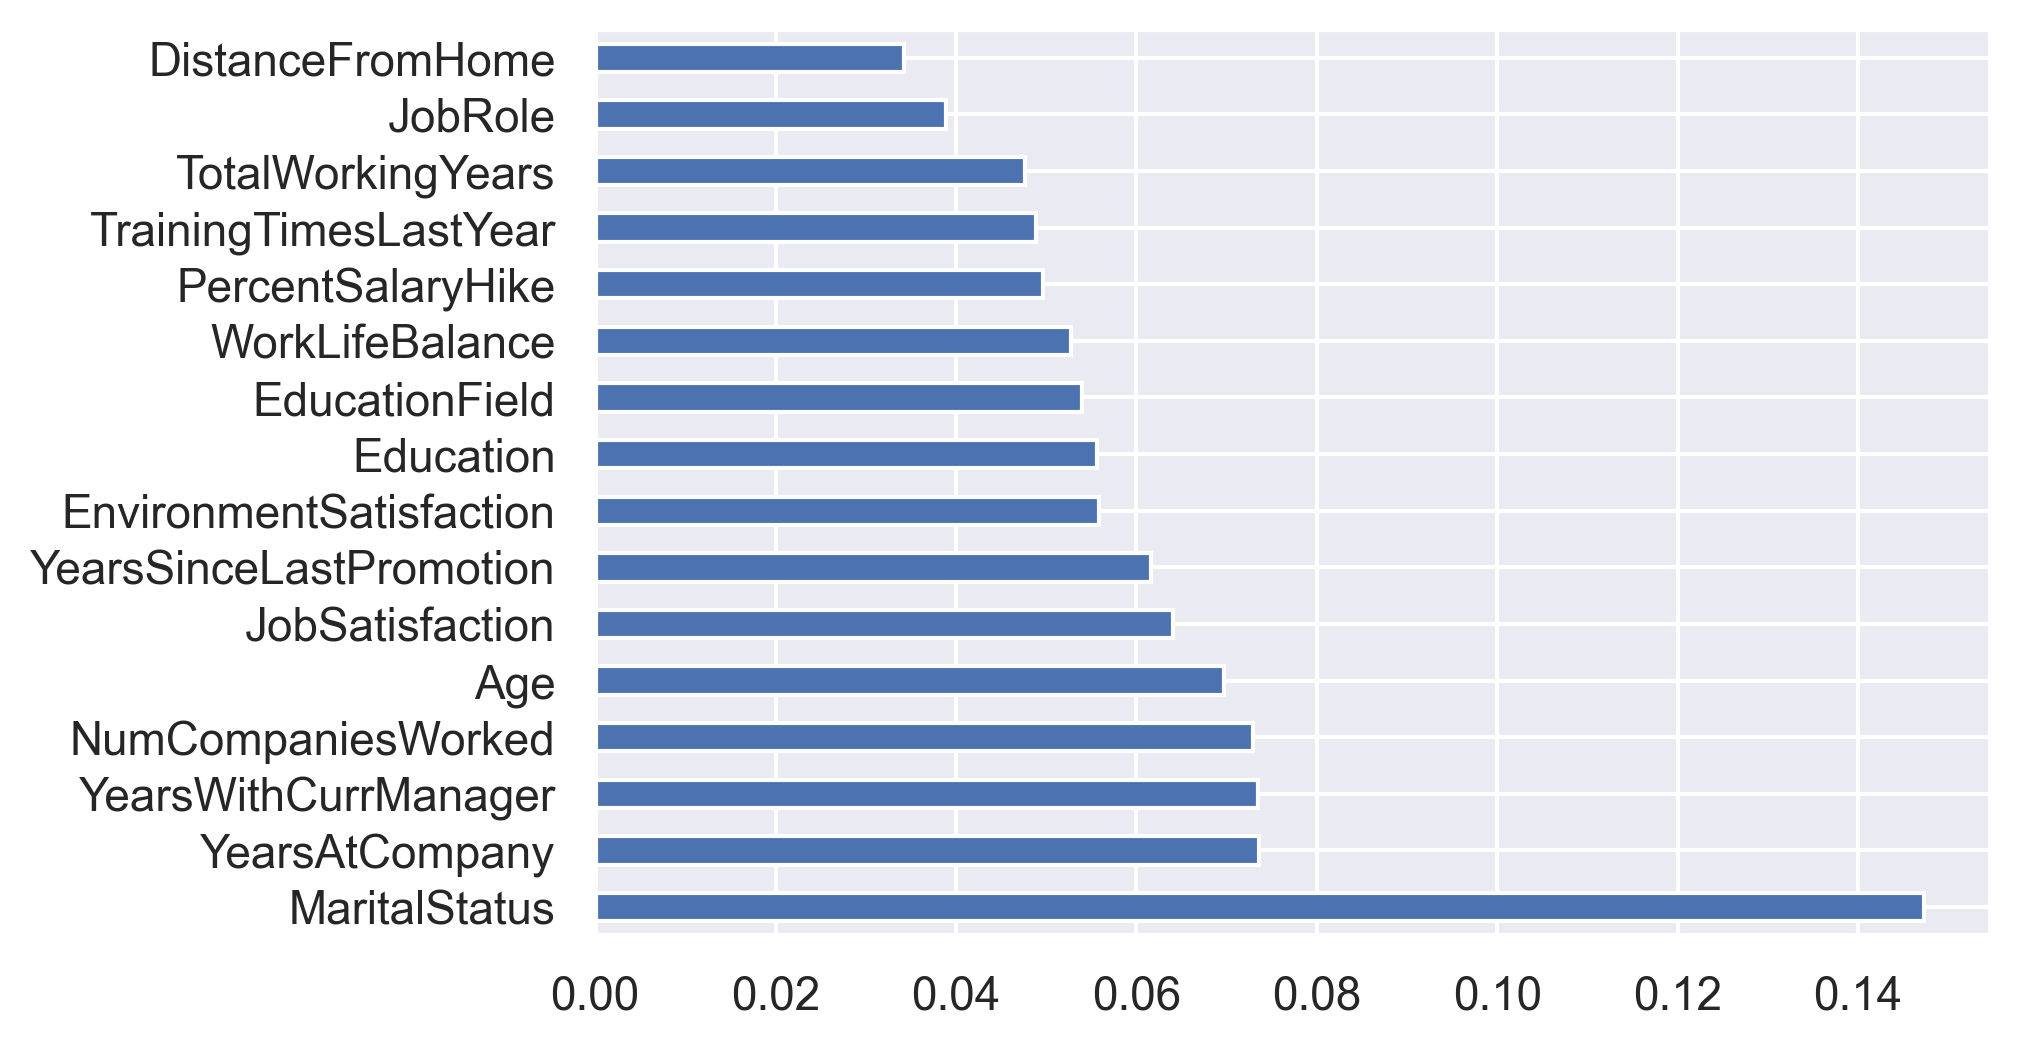

In [173]:
feat_importances = pd.Series(xgb.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [174]:
x.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EducationField', 'JobRole',
       'MaritalStatus', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [186]:
cat2 = ["JobRole", "NumCompaniesWorked", "PercentSalaryHike", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"]

In [187]:
f_p_values = chi2(df[cat2],df["MaritalStatus"])

p_values = pd.Series(f_p_values[1])
p_values.index = cat2
p_values.sort_values(ascending=False)

WorkLifeBalance            8.345883e-01
JobSatisfaction            3.794359e-01
EnvironmentSatisfaction    3.462399e-01
PercentSalaryHike          1.549065e-01
JobRole                    7.756774e-02
NumCompaniesWorked         7.815302e-05
YearsWithCurrManager       1.622574e-07
YearsSinceLastPromotion    9.642280e-17
YearsAtCompany             2.087469e-26
dtype: float64

In [188]:
# Null Hypothesis: The null hypothesis states that there is no relationship between the two variables
cnt = 0
for i in p_values:
    if i > 0.05:
        print("There is no relationship", p_values.index[cnt], i)
    else:
        print("There is relationship", p_values.index[cnt], i)
    
    cnt += 1

There is no relationship JobRole 0.07756773781740703
There is relationship NumCompaniesWorked 7.815302335245752e-05
There is no relationship PercentSalaryHike 0.15490645618861604
There is relationship YearsAtCompany 2.087469391368326e-26
There is relationship YearsSinceLastPromotion 9.642280187710379e-17
There is relationship YearsWithCurrManager 1.6225742912786713e-07
There is no relationship EnvironmentSatisfaction 0.3462398742114897
There is no relationship JobSatisfaction 0.37943594398633473
There is no relationship WorkLifeBalance 0.8345883188029612


- XGBoost Classifier giving more importance or weightage to MartialStatus followed by YearsAtCompany, NumCompaniesWorked, YearsWithCurrManager, and Age.
- So we can conclude that Major Factors affecting the Attrition of a Comapny is MartialStatus, YearsAtCompany, and NumCompaniesWorked.
- To curb Attrition rate, Company can give promotion to their employees.
- Also company should take feedback from employees on how their current manager is or company should take a look at their current manager. If something wrong then company should change current manager.